In [102]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from itertools import combinations


In [103]:
data_khanka=pd.read_csv('Steppe_Khanka_and rasters_add.csv', sep=',')

In [104]:
data_khanka.head()

,gbifID,datasetKey,occurrenceID,family,species,infraspecificEpithet,taxonRank,scientificName,countryCode,decimalLatitude,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
0,2.311266e+09,e7a2f416-fea5-41bb-8f17-5217fcaa74d7,NSK0000027,Amaryllidaceae,Allium anisopodium Ledeb.,argunense,SUBSPECIES,Allium anisopodium subsp. argunense Peschkova,RUS,51.467000,...,3.0,89.0,-225.0,8257.5,8257.5,29.78,45.30,-0.28,38.32,648.15997
1,2.417592e+09,3942a8dc-9f01-420d-a829-01675dc01c73,5464942,Amaryllidaceae,Allium anisopodium Ledeb.,zimmermannianum,VARIETY,Allium anisopodium var. zimmermannianum (Gilg)...,CHN,39.710000,...,7.0,197.0,-6.0,27310.5,36760.5,52.20,30.90,-0.41,70.70,1033.93994
2,2.417447e+09,3942a8dc-9f01-420d-a829-01675dc01c73,6562119,Amaryllidaceae,Allium anisopodium Ledeb.,zimmermannianum,VARIETY,Allium anisopodium var. zimmermannianum (Gilg)...,CHN,34.560000,...,7.0,177.0,34.0,36868.5,41340.0,55.33,24.70,-0.47,52.28,1049.94995
3,2.417662e+09,3942a8dc-9f01-420d-a829-01675dc01c73,6562129,Amaryllidaceae,Allium anisopodium Ledeb.,zimmermannianum,VARIETY,Allium anisopodium var. zimmermannianum (Gilg)...,CHN,38.280000,...,6.0,169.0,-15.0,24759.0,32778.0,32.04,32.05,-0.62,61.60,1067.57996
4,1.303784e+09,f9336171-e9a9-4147-b9f6-2d6c133afffd,6562138,Amaryllidaceae,Allium anisopodium Ledeb.,zimmermannianum,VARIETY,Allium anisopodium var. zimmermannianum (Gilg)...,CHN,36.107933,...,7.0,227.0,22.0,34668.0,49846.5,77.90,26.90,-0.13,37.53,852.62000


In [123]:
hanka_only = data_khanka[(data_khanka.decimalLatitude < 45.236845) & (data_khanka.decimalLatitude > 43.797226) & (data_khanka.decimalLongitude> 131.257678) & (data_khanka.decimalLongitude< 131.981854)&(data_khanka.countryCode=='RUS')].copy()

In [106]:
hanka_only = pd.read_csv('Steppe_Khanka_only_points.csv', sep=',')

In [107]:
hanka_only.shape

(1052, 75)

In [108]:
data_prim=pd.read_csv('Steppe_Prim_and rasters_add.csv', sep=',') 

In [109]:
data_prim.shape

(12721, 75)

In [110]:
data_mes=pd.read_csv('Steppe_mes_and rasters_add.csv', sep=',') 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22300\2179704881.py:1: DtypeWarning: Columns (5,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data_mes=pd.read_csv('Steppe_mes_and rasters_add.csv', sep=',')


In [111]:
data_mes.shape

(51823, 75)

In [112]:
data_steppe=pd.read_csv('Steppe_steppe_and rasters_add.csv') 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22300\391047677.py:1: DtypeWarning: Columns (9,10,14,19,20,22,23,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  data_steppe=pd.read_csv('Steppe_steppe_and rasters_add.csv')


In [113]:
data_steppe.shape

(34725, 77)

In [114]:
data_steppe_checks=pd.read_csv('Steppe_check_rasters.csv') 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22300\348706428.py:1: DtypeWarning: Columns (19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  data_steppe_checks=pd.read_csv('Steppe_check_rasters.csv')


In [115]:
data_steppe_checks.shape

(20714, 78)

### Khanda dataset:

In [116]:
data_khanka.head()

,gbifID,datasetKey,occurrenceID,family,species,infraspecificEpithet,taxonRank,scientificName,countryCode,decimalLatitude,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
0,2.311266e+09,e7a2f416-fea5-41bb-8f17-5217fcaa74d7,NSK0000027,Amaryllidaceae,Allium anisopodium Ledeb.,argunense,SUBSPECIES,Allium anisopodium subsp. argunense Peschkova,RUS,51.467000,...,3.0,89.0,-225.0,8257.5,8257.5,29.78,45.30,-0.28,38.32,648.15997
1,2.417592e+09,3942a8dc-9f01-420d-a829-01675dc01c73,5464942,Amaryllidaceae,Allium anisopodium Ledeb.,zimmermannianum,VARIETY,Allium anisopodium var. zimmermannianum (Gilg)...,CHN,39.710000,...,7.0,197.0,-6.0,27310.5,36760.5,52.20,30.90,-0.41,70.70,1033.93994
2,2.417447e+09,3942a8dc-9f01-420d-a829-01675dc01c73,6562119,Amaryllidaceae,Allium anisopodium Ledeb.,zimmermannianum,VARIETY,Allium anisopodium var. zimmermannianum (Gilg)...,CHN,34.560000,...,7.0,177.0,34.0,36868.5,41340.0,55.33,24.70,-0.47,52.28,1049.94995
3,2.417662e+09,3942a8dc-9f01-420d-a829-01675dc01c73,6562129,Amaryllidaceae,Allium anisopodium Ledeb.,zimmermannianum,VARIETY,Allium anisopodium var. zimmermannianum (Gilg)...,CHN,38.280000,...,6.0,169.0,-15.0,24759.0,32778.0,32.04,32.05,-0.62,61.60,1067.57996
4,1.303784e+09,f9336171-e9a9-4147-b9f6-2d6c133afffd,6562138,Amaryllidaceae,Allium anisopodium Ledeb.,zimmermannianum,VARIETY,Allium anisopodium var. zimmermannianum (Gilg)...,CHN,36.107933,...,7.0,227.0,22.0,34668.0,49846.5,77.90,26.90,-0.13,37.53,852.62000


### Prim dataset

In [117]:
data_prim.head()

,gbifID,datasetKey,occurrenceID,family,species,infraspecificEpithet,taxonRank,scientificName,countryCode,decimalLatitude,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
0,3464835138,4d1b5fed-e12f-48e8-94cb-88cf80115dd1,urn:lsid:biocol.org:col:15550:16:0119:0414,Asteraceae,Crepidiastrum tenuifolium (Willd.) Sennikov,altaica,SUBSPECIES,Youngia tenuifolia subsp. altaica Babc. & Steb...,RUS,51.12980,...,5.0,119.0,-93.0,10957.5,16485.0,51.39,32.75,-0.14,42.63,737.26001
1,3464882136,4d1b5fed-e12f-48e8-94cb-88cf80115dd1,urn:lsid:biocol.org:col:15550:16:0495:0336,Asteraceae,Crepidiastrum tenuifolium (Willd.) Sennikov,altaica,SUBSPECIES,Youngia tenuifolia subsp. altaica Babc. & Steb...,RUS,51.20270,...,5.0,113.0,-99.0,10440.0,15487.5,53.12,32.70,-0.09,39.21,714.76001
2,2382490292,54f946aa-2ca9-4a51-9ee5-011219e0381e,https://brnu.jacq.org/BRNU581205,Asteraceae,Crepidiastrum tenuifolium (Willd.) Sennikov,altaica,SUBSPECIES,Youngia tenuifolia subsp. altaica Babc. & Steb...,RUS,50.40139,...,5.0,118.0,-108.0,10785.0,16243.5,30.70,33.85,-0.48,52.58,725.84998
3,2382490309,54f946aa-2ca9-4a51-9ee5-011219e0381e,https://brnu.jacq.org/BRNU581206,Asteraceae,Crepidiastrum tenuifolium (Willd.) Sennikov,altaica,SUBSPECIES,Youngia tenuifolia subsp. altaica Babc. & Steb...,RUS,50.51586,...,5.0,123.0,-106.0,11152.5,16957.5,30.45,34.15,-0.49,53.33,740.52002
4,2570621591,0eacbbfa-45b9-41dc-b7e3-1f0773ce1477,Flora_of_Siberia_2007_Vol_13_map_196_locality_1,Asteraceae,Crepidiastrum tenuifolium (Willd.) Sennikov,tenuifolia,SUBSPECIES,Youngia tenuifolia subsp. tenuifolia,RUS,53.95200,...,5.0,127.0,-114.0,10792.5,15939.0,40.60,35.00,-0.25,47.11,680.77002


### Steppe dataset

In [118]:
data_steppe.head()

,gbifID,datasetKey,occurrenceID,family,species,infraspecificEpithet,taxonRank,scientificName,countryCode,decimalLatitude,...,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET,Unnamed: 75,Unnamed: 76
0,4045462570,4515e736-fa02-44ee-9808-bf89445104fe,9663470,Amaranthaceae,Bassia prostrata (L.) Beck,canescens,VARIETY,Kochia prostrata var. canescens Moq.,CHN,44.21,...,-63.0,23877.0,27348.0,7.74,36.25,-0.89,89.08,979.66998,NaN,NaN
1,4045444803,4515e736-fa02-44ee-9808-bf89445104fe,9402440,Amaranthaceae,Bassia prostrata (L.) Beck,canescens,VARIETY,Kochia prostrata var. canescens Moq.,CHN,43.8,...,-82.0,25452.0,25452.0,17.14,37.00,-0.75,76.88,934.01001,NaN,NaN
2,4045243421,4515e736-fa02-44ee-9808-bf89445104fe,6529847,Amaranthaceae,Bassia prostrata (L.) Beck,canescens,VARIETY,Kochia prostrata var. canescens Moq.,CHN,40.93,...,-30.0,20989.5,24372.0,16.16,28.25,-0.80,80.31,939.57001,NaN,NaN
3,4044826650,4515e736-fa02-44ee-9808-bf89445104fe,9663462,Amaranthaceae,Bassia prostrata (L.) Beck,canescens,VARIETY,Kochia prostrata var. canescens Moq.,CHN,44.3,...,-74.0,29578.5,38758.5,10.48,38.35,-0.86,86.21,1058.62000,NaN,NaN
4,4044826649,4515e736-fa02-44ee-9808-bf89445104fe,9663451,Amaranthaceae,Bassia prostrata (L.) Beck,canescens,VARIETY,Kochia prostrata var. canescens Moq.,CHN,44.43,...,-103.0,29316.0,34020.0,10.58,40.45,-0.86,86.65,1058.44995,NaN,NaN


### Mesophites dataset (mes)

In [119]:
data_mes.head()

,gbifID,datasetKey,occurrenceID,family,species,infraspecificEpithet,taxonRank,scientificName,countryCode,decimalLatitude,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
0,3881342533,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/12648...,Apiaceae,Bupleurum komarovianum Lincz.,NaN,SPECIES,Bupleurum komarovianum O.A.Lincz.,RUS,44.569003,...,4.0,139.0,-94.0,13320.0,16201.5,70.14,32.05,0.15,20.44,666.88000
1,3881442492,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/12648...,Apiaceae,Bupleurum komarovianum Lincz.,NaN,SPECIES,Bupleurum komarovianum O.A.Lincz.,RUS,44.339847,...,5.0,161.0,-62.0,19278.0,19278.0,67.54,30.80,0.02,21.43,724.78998
2,3881672504,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/12648...,Apiaceae,Bupleurum komarovianum Lincz.,NaN,SPECIES,Bupleurum komarovianum O.A.Lincz.,RUS,44.634446,...,4.0,130.0,-111.0,9637.5,14973.0,71.67,32.85,0.21,14.34,643.08002
3,3923591598,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/13256...,Apiaceae,Bupleurum komarovianum Lincz.,NaN,SPECIES,Bupleurum komarovianum O.A.Lincz.,RUS,42.460158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3915607719,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/13665...,Apiaceae,Bupleurum komarovianum Lincz.,NaN,SPECIES,Bupleurum komarovianum O.A.Lincz.,RUS,43.752005,...,4.0,147.0,-84.0,13887.0,16968.0,80.04,31.15,0.23,15.97,666.79999


In [120]:
feature_columns = ['URB_2000', 'NVG_2000', 'GRS_2000',
       'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2',
       'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr',
       'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17',
       'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14',
       'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11',
       'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8',
       'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5',
       'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2',
       'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri',
       'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex',
       'current_30arcsec_PETWettestQuarter',
       'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality',
       'current_30arcsec_PETDriestQuarter',
       'current_30arcsec_PETColdestQuarter',
       'current_30arcsec_monthCountByTemp10',
       'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest',
       'current_30arcsec_growingDegDays5', 'current_30arcsec_growingDegDays0',
       'current_30arcsec_embergerQ', 'current_30arcsec_continentality',
       'current_30arcsec_climaticMoistureIndex',
       'current_30arcsec_aridityIndexThornthwaite',
       'current_30arcsec_annualPET']

In [121]:
def process_dfs(*dfs):
    allowed_columns = ['species', 'countryCode', 'decimalLatitude', 'decimalLongitude'] + feature_columns
    processed_dfs = []
    for df in dfs:
        df.species = df.species.map(lambda x: ' '.join(map(str.strip, x.split()[:2])))
        processed_dfs.append(df.loc[:, allowed_columns])
    return processed_dfs

In [124]:
data_khanka, data_prim, data_mes, data_steppe,hanka_only,data_steppe_checks = process_dfs(data_khanka, data_prim, data_mes, data_steppe,hanka_only, data_steppe_checks)

In [125]:
data_prim.species.value_counts()

Sabulina verna               6284
Thalictrum foetidum          2340
Braya humilis                1174
Crepidiastrum tenuifolium    1128
Thalictrum petaloideum        742
Clausia aprica                727
Carex macroprophylla          326
Name: species, dtype: int64

In [126]:
data_khanka.species.value_counts()

Carex pediformis                2842
Orostachys spinosa              1995
Polygala sibirica               1676
Carex duriuscula                1493
Nepeta multifida                1288
Helictochloa hookeri            1235
Patrinia rupestris              1021
Pulsatilla turczaninovii         967
Iris humilis                     909
Bupleurum scorzonerifolium       888
Ephedra monosperma               859
Rhaponticum uniflorum            857
Lespedeza juncea                 819
Polygala tenuifolia              812
Artemisia laciniata              763
Allium anisopodium               698
Klasea centauroides              693
Clematis hexapetala              653
Ulmus macrocarpa                 609
Carex korshinskyi                595
Scutellaria baicalensis          592
Stipa baicalensis                488
Leontopodium leontopodioides     434
Filifolium sibiricum             423
Adenophora stenanthina           381
Prunus sibirica                  368
Silene jeniseensis               321
H

In [127]:
data_mes.species.value_counts()

Trifolium lupinaster          3922
Arundinella hirta             3891
Viola mandshurica             3181
Patrinia scabiosifolia        2746
Spodiopogon sibiricus         2477
Artemisia scoparia            2293
Artemisia gmelinii            2248
Flueggea suffruticosa         2151
Hemerocallis minor            2087
Vicia amoena                  2022
Thesium chinense              1798
Kitagawia terebinthacea       1761
Silene repens                 1680
Paeonia lactiflora            1424
Platycodon grandiflorus       1401
Anthoxanthum glabrum          1349
Elymus gmelinii                940
Dictamnus dasycarpus           915
Iris uniflora                  896
Cotoneaster laxiflorus         877
Pulsatilla cernua              877
Vincetoxicum changqinianum     795
Lithospermum erythrorhizon     781
Saussurea pulchella            572
Lilium concolor                571
Veronica linariifolia          565
Potentilla discolor            550
Dontostemon dentatus           518
Viola dissecta      

In [128]:
data_steppe.species.value_counts()

Artemisia frigida            7168
Bassia prostrata             2783
Linum perenne                2654
Eremogone capillaris         1503
Goniolimon speciosum         1480
Delphinium grandiflorum      1310
Potentilla acaulis           1170
Takhtajaniantha austriaca    1167
Achnatherum sibiricum        1143
Stellaria dichotoma           946
Physochlaina physaloides      917
Alyssum lenense               835
Stellera chamaejasme          765
Leymus chinensis              746
Phlojodicarpus sibiricus      740
Caragana pygmaea              722
Stipa krylovii                638
Heteropappus altaicus         563
Allium tenuissimum            563
Oxytropis oxyphylla           490
Androsace incana              476
Oxytropis myriophylla         474
Iris dichotoma                427
Bupleurum bicaule             424
Allium bidentatum             384
Thalictrum squarrosum         332
Astragalus melilotoides       323
Saussurea salicifolia         316
Corispermum declinatum        302
Asparagus daur

In [129]:
data_steppe_checks.species.value_counts()

Lappula squarrosa          14246
Sophora flavescens          2002
Axyris amaranthoides        1230
Orostachys malacophylla      894
Gentiana squarrosa           706
Pulsatilla dahurica          661
Gueldenstaedtia verna        408
Iris oxypetala               312
Astragalus davuricus         187
Pulsatilla davurica           68
Name: species, dtype: int64

# LDA data preparation

In [130]:
def prepare_classification_data(*dfs, features=feature_columns):
    X = []
    y = []
    for ind, df in enumerate(dfs):
        _ = df.loc[:, features].apply(pd.to_numeric, errors='coerce').dropna()
        X.append(_)
        y+=[ind] * len(_)
    return pd.concat(X, axis=0).values, np.array(y)
    
    

In [131]:
X, y = prepare_classification_data(data_khanka, data_prim, data_mes, data_steppe,hanka_only, data_steppe_checks) 

### Фактически `shape` покаывает количество точек, участвующих в анализе (143248, 54) -- это значит 143248 точек(строк) и 54 колонки;

In [132]:
X.shape

(143248, 54)

### y -- переменная, отражающая принадлежность набору данных -- их всего здесь 6;

In [133]:
y.shape

(143248,)

In [134]:
from itertools import cycle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from IPython.core.display import HTML, display_html

In [135]:
def analyze_datasets(datasets, features=feature_columns, n_components=2):
    dataset_names = '_'.join(datasets.keys())
    X, y = prepare_classification_data(*datasets.values(), features=features)
    
    if len(datasets) > 2:
        lda = LinearDiscriminantAnalysis(n_components=n_components)
        transformed_data = lda.fit_transform(X, y)
        for col, marker, cl in zip(cycle('rbyck'), cycle('xodv'), range(len(datasets.keys()))):
            plt.scatter(transformed_data[y==cl, 0], transformed_data[y==cl, 1], marker=marker, color=col, label=list(datasets.keys())[cl], alpha=0.3)

        plt.legend()
        plt.show()
    
        display_html(HTML(f'<h3>Explained coef ratio (LDA) for {dataset_names}: {lda.explained_variance_ratio_} </h3>'))
   
    display_html(HTML('<h3>Feature importances of all considered features: </h3>'))
    klf = RandomForestClassifier()
    klf.fit(X, y)
    for name, val in sorted(list(zip(features, klf.feature_importances_)), key=lambda x: x[1], reverse=True):
        print(f"{name} = {val}")
    
    
    display_html(HTML('<h3>Recursive feature elimination procedure, selection the most informative features from</h3>'))
    print(features)
    selector = RFECV(klf, step=1, cv=5, verbose=0, n_jobs=6, scoring="balanced_accuracy")
    selector.fit(X, y)
    
    for feature_name, rank in zip(features, selector.ranking_):
        print(f"{feature_name}: {rank}")
    
    selected_features = np.array(features)[selector.support_]
    
    for feature_name, imp in sorted(zip(selected_features, selector.estimator_.feature_importances_), key=lambda x: x[1], reverse=True): 
        print(f"{feature_name}: {imp}")
    
    display_html(HTML('<h3>Balanced accuracy estimation for the best feature subset: </h3>'))
    klf.fit(X[:, selector.support_], y)
    print(cross_val_score(klf, X[:, selector.support_], y, scoring='balanced_accuracy'))
        
    
    display_html(HTML('<h3>Balanced accuracy estimation for all features in the experiment: </h3>'))
    print(cross_val_score(klf, X, y, cv=5, scoring='balanced_accuracy'))
    
    for name, df in datasets.items():
        display_html(HTML(f'<h3>Descriptive measures for: {name}</h3>'))
        display_html(df.loc[:, features].describe())

    display_html(HTML('<hr>'))



In [136]:
feature_sets={
    'soil': ['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7'] + ['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000'],
    'WC21': ['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14',
    'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8',
    'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2',
    'wc2.1_30s_bio_1', 'wc2.1_30s_elev'],
    'all_features': feature_columns,
}

datasets = {
    'prim': data_prim,
    'khanka':data_khanka,
    'mes': data_mes,
    'steppe': data_steppe,
    'khanka_only': hanka_only,
    'checks': data_steppe_checks
}


In [139]:
def analyze_all():
    for feature_set_name, features in feature_sets.items():
        
        display_html(HTML(f'<h1>All datasets. Feature set name: {feature_set_name}</h1>'))
        display_html(HTML(f'<h2>datasets: {list(datasets.keys())} </h2>'))
        analyze_datasets(datasets, features=features)
        
        display_html(HTML('<hr>'))
        
        display_html(HTML(f'<h1>Pair analysis.  Feature set name: {feature_set_name}</h1>'))

        all_dataset_combinations = list(combinations(list(datasets.keys()), 2))
        
        for name1, name2 in all_dataset_combinations:
            display_html(HTML(f'<h2>Datasets to compare: {name1}, {name2}</h2>'))
            analyze_datasets({name1: datasets[name1], name2: datasets[name2]}, features=features)
    
        display_html(HTML('<h1>END OF COMPUTATIONS</h1>'))

All datasets. Feature set name: soil

datasets: ['prim', 'khanka', 'mes', 'steppe', 'khanka_only', 'checks']

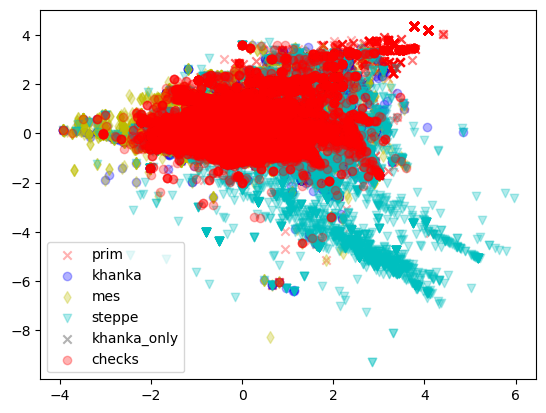

Explained coef ratio (LDA) for prim_khanka_mes_steppe_khanka_only_checks: [0.52052482 0.25524276]

Feature importances of all considered features:

GRS_2000 = 0.15438196798736406
URB_2000 = 0.14377282813552678
FOR_2000 = 0.13684640309239007
CULTRF_2000 = 0.10904780621139015
NVG_2000 = 0.10718777894524761
CULT_2000 = 0.10319940375332526
CULTIR_2000 = 0.07764855266683597
sq7 = 0.04001458784223941
sq3 = 0.03863312741599467
sq1 = 0.028766095074252786
sq2 = 0.021783540627666315
sq4 = 0.018864951366854038
sq5 = 0.012765052771070087
sq6 = 0.007087904109842684


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
sq1: 1
sq2: 1
sq3: 1
sq4: 1
sq5: 1
sq6: 2
sq7: 1
URB_2000: 1
NVG_2000: 1
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 1
CULT_2000: 1
GRS_2000: 0.15491732648471332
URB_2000: 0.14391145546930242
FOR_2000: 0.1352854103257523
NVG_2000: 0.10999399469699364
CULTRF_2000: 0.10907647784099755
CULT_2000: 0.10420799981643417
CULTIR_2000: 0.07685063033876138
sq7: 0.04105064704106458
sq3: 0.03820580064659758
sq1: 0.028227790171024378
sq2: 0.023104068897651268
sq4: 0.02037811146113748
sq5: 0.014790286809569952


Balanced accuracy estimation for the best feature subset:

[0.40012789 0.4534478  0.47321343 0.4597743  0.37098919]


Balanced accuracy estimation for all features in the experiment:

[0.41041173 0.45310053 0.45614109 0.4624857  0.38269006]


Descriptive measures for: prim

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000
mean,2.430627,2.314912,3.445484,2.147944,2.258313,2.108639,3.378115,1.567077,7.243522,38.911515,40.548059,7.692570,0.867463,8.560033
std,1.983601,2.014461,1.894847,2.053712,2.027003,2.058306,1.877064,6.511707,16.896344,25.912663,31.148621,13.926796,4.568112,14.971443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,0.044400,0.000000,17.538580,9.240020,0.000000,0.000000,0.000000
50%,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,3.000000,0.214300,0.000000,34.120770,38.995510,0.244990,0.000000,0.840750
75%,3.000000,3.000000,5.000000,2.000000,3.000000,2.000000,5.000000,0.603500,5.000000,59.362420,68.054400,8.813680,0.042610,10.096510
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,100.000000,100.000000,100.000000,99.949000,83.728430,89.116550,95.891250


Descriptive measures for: khanka

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.00000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000
mean,2.240422,2.119757,2.237490,2.000523,1.898772,1.87958,2.236164,4.079943,4.836963,30.358655,38.933948,12.921179,2.802816,15.723995
std,1.918512,1.939528,2.002159,1.965532,1.969755,1.96660,1.984003,11.778941,12.094958,22.411631,33.395956,17.426220,9.377041,19.867013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.065325,0.000000,11.304080,5.817570,0.000000,0.000000,0.037840
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.350000,0.000000,25.976980,33.204280,4.603560,0.000000,6.284240
75%,3.000000,2.000000,3.000000,2.000000,1.000000,1.00000,3.000000,1.270600,4.000000,43.989210,70.398325,20.081110,0.593440,25.028500
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,100.000000,100.000000,99.985900,100.000000,96.891160,99.466380,99.466380


Descriptive measures for: mes

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000
mean,1.777936,1.583100,1.953071,1.456226,1.327808,1.319318,1.805723,7.036051,1.495504,20.287236,44.847976,10.247348,5.098721,15.346069
std,1.446461,1.429845,1.673910,1.450005,1.397062,1.391974,1.530100,15.906968,7.346110,18.107499,34.217711,14.140200,11.368037,18.300783
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.130300,0.000000,6.437500,9.398915,0.032940,0.000000,0.560870
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.751400,0.000000,15.904510,43.695030,3.921100,0.000000,7.205840
75%,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,3.000000,5.320100,0.000000,28.907310,77.955310,15.277520,3.136265,25.038750
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,100.000000,100.000000,100.000000,99.993600,94.018750,100.000000,100.000000


Descriptive measures for: steppe

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,NVG_2000,CULTRF_2000
count,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000
mean,2.791045,2.054683,2.101310,1.833837,1.786379,1.734888,2.066379,8.250131,16.554474
std,6.184876,3.034219,1.836993,1.795527,1.795399,1.783926,1.830431,17.445077,21.934457
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.761650,5.581600
75%,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,8.007510,26.700920
max,88.932850,84.764870,7.000000,7.000000,7.000000,7.000000,7.000000,100.000000,97.152360


Descriptive measures for: khanka_only

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,650.000000,650.000000,650.000000,650.000000,650.0,650.0,650.000000,650.000000,650.0,650.000000,650.000000,650.000000,650.000000,650.000000
mean,1.575385,1.447692,1.229231,1.221538,1.0,1.0,1.283077,3.152946,0.0,29.056993,53.881483,13.308308,0.153207,13.461515
std,0.696465,0.497639,0.420662,0.568970,0.0,0.0,0.450840,11.247021,0.0,15.923143,28.444444,13.105389,0.840328,13.238955
min,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,0.000000,0.0,4.985480,3.950360,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,0.438600,0.0,15.113800,26.590653,2.671000,0.000000,2.671000
50%,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,0.797600,0.0,27.330500,55.107760,5.553210,0.000000,5.553210
75%,2.000000,2.000000,1.000000,1.000000,1.0,1.0,2.000000,1.058600,0.0,39.176770,81.895030,21.929370,0.000000,21.929370
max,3.000000,2.000000,2.000000,3.000000,1.0,1.0,2.000000,61.584700,0.0,78.041830,95.000000,55.396100,6.109190,55.396100


Descriptive measures for: checks

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000
mean,1.881819,1.713237,2.057304,1.544173,1.444144,1.406826,2.006324,10.312357,1.678588,25.324094,31.392124,20.351402,3.512237,23.863639
std,1.459617,1.443017,1.603341,1.458317,1.419255,1.405012,1.547743,20.128152,7.851337,19.322884,28.452258,21.673218,8.610633,23.060290
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.344750,0.000000,11.072093,5.788310,1.017230,0.000000,2.569098
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.405300,0.000000,22.047760,22.655160,12.751280,0.204350,17.064910
75%,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,3.000000,9.127000,0.000000,33.311883,52.926248,35.086100,2.398060,41.155090
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,100.000000,100.000000,100.000000,99.894200,96.542850,92.251910,97.214840


Pair analysis. Feature set name: soil

Datasets to compare: prim, khanka

Feature importances of all considered features:

GRS_2000 = 0.1402793471555951
FOR_2000 = 0.1300711989075803
URB_2000 = 0.12263116667400571
sq3 = 0.11124286730783049
CULT_2000 = 0.08276006957054238
sq7 = 0.082384462080351
NVG_2000 = 0.07859430616818742
CULTRF_2000 = 0.07749645629323317
CULTIR_2000 = 0.061944263568445235
sq1 = 0.02677105836168284
sq5 = 0.02492660108059886
sq4 = 0.02430626293262243
sq2 = 0.022475464850154475
sq6 = 0.014116475049170733


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
sq1: 1
sq2: 1
sq3: 1
sq4: 1
sq5: 1
sq6: 2
sq7: 1
URB_2000: 1
NVG_2000: 1
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 1
CULT_2000: 1
GRS_2000: 0.13970144936229392
FOR_2000: 0.1343920986113627
URB_2000: 0.12169438037422656
sq3: 0.11130236510121168
CULT_2000: 0.08472152940336279
sq7: 0.08355456265965941
CULTRF_2000: 0.08037988644527573
NVG_2000: 0.07769103593540498
CULTIR_2000: 0.06079862650178774
sq1: 0.0275639655299932
sq4: 0.02691018978423967
sq2: 0.025732738830750168
sq5: 0.025557171460431544


Balanced accuracy estimation for the best feature subset:

[0.58236109 0.82218962 0.9095949  0.71900703 0.63085312]


Balanced accuracy estimation for all features in the experiment:

[0.5903282  0.81856685 0.90843773 0.71887673 0.63019926]


Descriptive measures for: prim

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000
mean,2.430627,2.314912,3.445484,2.147944,2.258313,2.108639,3.378115,1.567077,7.243522,38.911515,40.548059,7.692570,0.867463,8.560033
std,1.983601,2.014461,1.894847,2.053712,2.027003,2.058306,1.877064,6.511707,16.896344,25.912663,31.148621,13.926796,4.568112,14.971443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,0.044400,0.000000,17.538580,9.240020,0.000000,0.000000,0.000000
50%,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,3.000000,0.214300,0.000000,34.120770,38.995510,0.244990,0.000000,0.840750
75%,3.000000,3.000000,5.000000,2.000000,3.000000,2.000000,5.000000,0.603500,5.000000,59.362420,68.054400,8.813680,0.042610,10.096510
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,100.000000,100.000000,100.000000,99.949000,83.728430,89.116550,95.891250


Descriptive measures for: khanka

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.00000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000
mean,2.240422,2.119757,2.237490,2.000523,1.898772,1.87958,2.236164,4.079943,4.836963,30.358655,38.933948,12.921179,2.802816,15.723995
std,1.918512,1.939528,2.002159,1.965532,1.969755,1.96660,1.984003,11.778941,12.094958,22.411631,33.395956,17.426220,9.377041,19.867013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.065325,0.000000,11.304080,5.817570,0.000000,0.000000,0.037840
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.350000,0.000000,25.976980,33.204280,4.603560,0.000000,6.284240
75%,3.000000,2.000000,3.000000,2.000000,1.000000,1.00000,3.000000,1.270600,4.000000,43.989210,70.398325,20.081110,0.593440,25.028500
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,100.000000,100.000000,99.985900,100.000000,96.891160,99.466380,99.466380


Datasets to compare: prim, mes

Feature importances of all considered features:

GRS_2000 = 0.17760764374245583
URB_2000 = 0.12141718462831406
FOR_2000 = 0.11789931044036052
sq7 = 0.1080872333285676
CULT_2000 = 0.0862052425604404
CULTRF_2000 = 0.07788859041383067
NVG_2000 = 0.0762079411296304
sq3 = 0.07529887720857142
CULTIR_2000 = 0.06130769298956498
sq5 = 0.02815401804933533
sq1 = 0.022282397389199685
sq2 = 0.01825675631499042
sq4 = 0.01723048193157497
sq6 = 0.012156629873163769


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
sq1: 1
sq2: 1
sq3: 1
sq4: 2
sq5: 1
sq6: 3
sq7: 1
URB_2000: 1
NVG_2000: 1
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 1
CULT_2000: 1
GRS_2000: 0.17871925075814368
sq7: 0.12325327380344521
URB_2000: 0.1184506602522622
FOR_2000: 0.11774579999218862
CULT_2000: 0.0840472906048664
NVG_2000: 0.07914365890911647
CULTRF_2000: 0.07700752718675541
sq3: 0.07128128471551473
CULTIR_2000: 0.06498376548311652
sq5: 0.03180092101887193
sq1: 0.029123824544170535
sq2: 0.02444274273154818


Balanced accuracy estimation for the best feature subset:

[0.61447153 0.82498055 0.94807578 0.72164686 0.66643925]


Balanced accuracy estimation for all features in the experiment:

[0.61554336 0.82939734 0.94854383 0.71952956 0.66348044]


Descriptive measures for: prim

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000
mean,2.430627,2.314912,3.445484,2.147944,2.258313,2.108639,3.378115,1.567077,7.243522,38.911515,40.548059,7.692570,0.867463,8.560033
std,1.983601,2.014461,1.894847,2.053712,2.027003,2.058306,1.877064,6.511707,16.896344,25.912663,31.148621,13.926796,4.568112,14.971443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,0.044400,0.000000,17.538580,9.240020,0.000000,0.000000,0.000000
50%,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,3.000000,0.214300,0.000000,34.120770,38.995510,0.244990,0.000000,0.840750
75%,3.000000,3.000000,5.000000,2.000000,3.000000,2.000000,5.000000,0.603500,5.000000,59.362420,68.054400,8.813680,0.042610,10.096510
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,100.000000,100.000000,100.000000,99.949000,83.728430,89.116550,95.891250


Descriptive measures for: mes

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000
mean,1.777936,1.583100,1.953071,1.456226,1.327808,1.319318,1.805723,7.036051,1.495504,20.287236,44.847976,10.247348,5.098721,15.346069
std,1.446461,1.429845,1.673910,1.450005,1.397062,1.391974,1.530100,15.906968,7.346110,18.107499,34.217711,14.140200,11.368037,18.300783
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.130300,0.000000,6.437500,9.398915,0.032940,0.000000,0.560870
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.751400,0.000000,15.904510,43.695030,3.921100,0.000000,7.205840
75%,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,3.000000,5.320100,0.000000,28.907310,77.955310,15.277520,3.136265,25.038750
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,100.000000,100.000000,100.000000,99.993600,94.018750,100.000000,100.000000


Datasets to compare: prim, steppe

Feature importances of all considered features:

GRS_2000 = 0.14482727003214196
FOR_2000 = 0.1253279407320382
URB_2000 = 0.12006559075954093
sq7 = 0.116429193778699
NVG_2000 = 0.09497972026166497
CULTRF_2000 = 0.08830403536087944
CULT_2000 = 0.08432870455760438
sq3 = 0.07661432131917621
CULTIR_2000 = 0.0538532951792264
sq5 = 0.022429237445674783
sq1 = 0.021455387260272758
sq2 = 0.019594958829738544
sq4 = 0.019092264059349814
sq6 = 0.012698080423992788


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
sq1: 1
sq2: 1
sq3: 1
sq4: 1
sq5: 1
sq6: 1
sq7: 1
URB_2000: 1
NVG_2000: 1
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 1
CULT_2000: 1
GRS_2000: 0.14466201864103723
FOR_2000: 0.12692911406811547
URB_2000: 0.1185298794325492
sq7: 0.10968087393808207
NVG_2000: 0.09689337502878846
CULTRF_2000: 0.08715419353508519
CULT_2000: 0.08462228334824731
sq3: 0.08029213272582343
CULTIR_2000: 0.054927261808250624
sq5: 0.024363328803844446
sq1: 0.021515867403471146
sq2: 0.020285398220998924
sq4: 0.01648890049429561
sq6: 0.013655372551410973


Balanced accuracy estimation for the best feature subset:

[0.55630227 0.82046887 0.92666635 0.69563992 0.60785813]


Balanced accuracy estimation for all features in the experiment:

[0.55886754 0.81764507 0.92303572 0.69306423 0.60788916]


Descriptive measures for: prim

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000
mean,2.430627,2.314912,3.445484,2.147944,2.258313,2.108639,3.378115,1.567077,7.243522,38.911515,40.548059,7.692570,0.867463,8.560033
std,1.983601,2.014461,1.894847,2.053712,2.027003,2.058306,1.877064,6.511707,16.896344,25.912663,31.148621,13.926796,4.568112,14.971443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,0.044400,0.000000,17.538580,9.240020,0.000000,0.000000,0.000000
50%,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,3.000000,0.214300,0.000000,34.120770,38.995510,0.244990,0.000000,0.840750
75%,3.000000,3.000000,5.000000,2.000000,3.000000,2.000000,5.000000,0.603500,5.000000,59.362420,68.054400,8.813680,0.042610,10.096510
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,100.000000,100.000000,100.000000,99.949000,83.728430,89.116550,95.891250


Descriptive measures for: steppe

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,NVG_2000,CULTRF_2000
count,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000
mean,2.791045,2.054683,2.101310,1.833837,1.786379,1.734888,2.066379,8.250131,16.554474
std,6.184876,3.034219,1.836993,1.795527,1.795399,1.783926,1.830431,17.445077,21.934457
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.761650,5.581600
75%,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,8.007510,26.700920
max,88.932850,84.764870,7.000000,7.000000,7.000000,7.000000,7.000000,100.000000,97.152360


Datasets to compare: prim, khanka_only

Feature importances of all considered features:

URB_2000 = 0.18309861617819553
FOR_2000 = 0.12033273277600802
CULT_2000 = 0.11877666444874467
GRS_2000 = 0.11626849295928982
CULTRF_2000 = 0.11305688505620592
CULTIR_2000 = 0.08367094649009026
sq3 = 0.06976335809669228
sq7 = 0.057441724470379735
sq2 = 0.05159806079522564
sq1 = 0.04016893321220248
NVG_2000 = 0.03081232854595546
sq4 = 0.012045295143192176
sq5 = 0.002324756657768472
sq6 = 0.000641205170049575


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
sq1: 1
sq2: 1
sq3: 1
sq4: 1
sq5: 2
sq6: 3
sq7: 1
URB_2000: 1
NVG_2000: 1
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 1
CULT_2000: 1
URB_2000: 0.1888993940318626
FOR_2000: 0.12679653244705527
CULT_2000: 0.11881055185930373
CULTRF_2000: 0.11759630000837733
GRS_2000: 0.11085557475531878
CULTIR_2000: 0.07795439208514249
sq3: 0.0726352697249914
sq7: 0.05311600674260429
sq2: 0.049714708079420654
NVG_2000: 0.035068155280138034
sq1: 0.034788618246770146
sq4: 0.013764496739015523


Balanced accuracy estimation for the best feature subset:

[0.99556446 0.94595731 0.988265   0.96883769 0.97515421]


Balanced accuracy estimation for all features in the experiment:

[0.99941061 0.94595731 0.988265   0.97633345 0.97170114]


Descriptive measures for: prim

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000
mean,2.430627,2.314912,3.445484,2.147944,2.258313,2.108639,3.378115,1.567077,7.243522,38.911515,40.548059,7.692570,0.867463,8.560033
std,1.983601,2.014461,1.894847,2.053712,2.027003,2.058306,1.877064,6.511707,16.896344,25.912663,31.148621,13.926796,4.568112,14.971443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,0.044400,0.000000,17.538580,9.240020,0.000000,0.000000,0.000000
50%,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,3.000000,0.214300,0.000000,34.120770,38.995510,0.244990,0.000000,0.840750
75%,3.000000,3.000000,5.000000,2.000000,3.000000,2.000000,5.000000,0.603500,5.000000,59.362420,68.054400,8.813680,0.042610,10.096510
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,100.000000,100.000000,100.000000,99.949000,83.728430,89.116550,95.891250


Descriptive measures for: khanka_only

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,650.000000,650.000000,650.000000,650.000000,650.0,650.0,650.000000,650.000000,650.0,650.000000,650.000000,650.000000,650.000000,650.000000
mean,1.575385,1.447692,1.229231,1.221538,1.0,1.0,1.283077,3.152946,0.0,29.056993,53.881483,13.308308,0.153207,13.461515
std,0.696465,0.497639,0.420662,0.568970,0.0,0.0,0.450840,11.247021,0.0,15.923143,28.444444,13.105389,0.840328,13.238955
min,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,0.000000,0.0,4.985480,3.950360,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,0.438600,0.0,15.113800,26.590653,2.671000,0.000000,2.671000
50%,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,0.797600,0.0,27.330500,55.107760,5.553210,0.000000,5.553210
75%,2.000000,2.000000,1.000000,1.000000,1.0,1.0,2.000000,1.058600,0.0,39.176770,81.895030,21.929370,0.000000,21.929370
max,3.000000,2.000000,2.000000,3.000000,1.0,1.0,2.000000,61.584700,0.0,78.041830,95.000000,55.396100,6.109190,55.396100


Datasets to compare: prim, checks

Feature importances of all considered features:

URB_2000 = 0.19970043187632222
GRS_2000 = 0.1414287989373391
CULT_2000 = 0.12046704473673966
FOR_2000 = 0.11624728553602826
CULTIR_2000 = 0.0817231130001419
CULTRF_2000 = 0.08142731205838975
sq7 = 0.06330799284328899
sq3 = 0.06329535175058379
NVG_2000 = 0.054546958717927224
sq1 = 0.023725335945125568
sq2 = 0.019017174600128993
sq5 = 0.014772931630183159
sq4 = 0.0141198234073292
sq6 = 0.006220444960472238


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
sq1: 1
sq2: 1
sq3: 1
sq4: 1
sq5: 1
sq6: 1
sq7: 1
URB_2000: 1
NVG_2000: 1
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 1
CULT_2000: 1
URB_2000: 0.1878839505984369
GRS_2000: 0.1382140453968682
FOR_2000: 0.11862337370343408
CULT_2000: 0.1118917029704178
CULTIR_2000: 0.09017218163738215
CULTRF_2000: 0.08125721276786513
sq7: 0.07343298204532533
NVG_2000: 0.059591019850519594
sq3: 0.058376034410087714
sq1: 0.024590486052384487
sq2: 0.019310909193402503
sq5: 0.01700026863425703
sq4: 0.012360586668185085
sq6: 0.007295246071433996


Balanced accuracy estimation for the best feature subset:

[0.63847415 0.78827879 0.88661185 0.74391563 0.64358542]


Balanced accuracy estimation for all features in the experiment:

[0.63704459 0.7906925  0.88312236 0.7402434  0.64137523]


Descriptive measures for: prim

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000
mean,2.430627,2.314912,3.445484,2.147944,2.258313,2.108639,3.378115,1.567077,7.243522,38.911515,40.548059,7.692570,0.867463,8.560033
std,1.983601,2.014461,1.894847,2.053712,2.027003,2.058306,1.877064,6.511707,16.896344,25.912663,31.148621,13.926796,4.568112,14.971443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,0.044400,0.000000,17.538580,9.240020,0.000000,0.000000,0.000000
50%,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,3.000000,0.214300,0.000000,34.120770,38.995510,0.244990,0.000000,0.840750
75%,3.000000,3.000000,5.000000,2.000000,3.000000,2.000000,5.000000,0.603500,5.000000,59.362420,68.054400,8.813680,0.042610,10.096510
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,100.000000,100.000000,100.000000,99.949000,83.728430,89.116550,95.891250


Descriptive measures for: checks

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000
mean,1.881819,1.713237,2.057304,1.544173,1.444144,1.406826,2.006324,10.312357,1.678588,25.324094,31.392124,20.351402,3.512237,23.863639
std,1.459617,1.443017,1.603341,1.458317,1.419255,1.405012,1.547743,20.128152,7.851337,19.322884,28.452258,21.673218,8.610633,23.060290
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.344750,0.000000,11.072093,5.788310,1.017230,0.000000,2.569098
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.405300,0.000000,22.047760,22.655160,12.751280,0.204350,17.064910
75%,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,3.000000,9.127000,0.000000,33.311883,52.926248,35.086100,2.398060,41.155090
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,100.000000,100.000000,100.000000,99.894200,96.542850,92.251910,97.214840


Datasets to compare: khanka, mes

Feature importances of all considered features:

GRS_2000 = 0.17443217696197266
URB_2000 = 0.1540699505440509
NVG_2000 = 0.13376879255318708
FOR_2000 = 0.12750917579978752
CULT_2000 = 0.09396647330281321
CULTRF_2000 = 0.09212524308718872
CULTIR_2000 = 0.0658184472556713
sq3 = 0.03800022823397793
sq7 = 0.03362271827921578
sq2 = 0.02620503045698177
sq1 = 0.02507596707050541
sq4 = 0.018775025642661015
sq5 = 0.009589377073342356
sq6 = 0.007041393738644413


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
sq1: 1
sq2: 1
sq3: 1
sq4: 1
sq5: 1
sq6: 2
sq7: 1
URB_2000: 1
NVG_2000: 1
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 1
CULT_2000: 1
GRS_2000: 0.17486006099904378
URB_2000: 0.1547766843181049
NVG_2000: 0.1398692259596834
FOR_2000: 0.12701289076927205
CULTRF_2000: 0.09409080677299297
CULT_2000: 0.09278088864615017
CULTIR_2000: 0.062210600192599934
sq3: 0.03829723203944838
sq7: 0.032369400861054054
sq2: 0.028175609209296903
sq1: 0.025887532301701058
sq4: 0.019204953694007907
sq5: 0.01046411423664442


Balanced accuracy estimation for the best feature subset:

[0.65738147 0.69379869 0.59652619 0.71046392 0.65982534]


Balanced accuracy estimation for all features in the experiment:

[0.65833175 0.69452821 0.59429966 0.71345588 0.65962824]


Descriptive measures for: khanka

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.00000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000
mean,2.240422,2.119757,2.237490,2.000523,1.898772,1.87958,2.236164,4.079943,4.836963,30.358655,38.933948,12.921179,2.802816,15.723995
std,1.918512,1.939528,2.002159,1.965532,1.969755,1.96660,1.984003,11.778941,12.094958,22.411631,33.395956,17.426220,9.377041,19.867013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.065325,0.000000,11.304080,5.817570,0.000000,0.000000,0.037840
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.350000,0.000000,25.976980,33.204280,4.603560,0.000000,6.284240
75%,3.000000,2.000000,3.000000,2.000000,1.000000,1.00000,3.000000,1.270600,4.000000,43.989210,70.398325,20.081110,0.593440,25.028500
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,100.000000,100.000000,99.985900,100.000000,96.891160,99.466380,99.466380


Descriptive measures for: mes

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000
mean,1.777936,1.583100,1.953071,1.456226,1.327808,1.319318,1.805723,7.036051,1.495504,20.287236,44.847976,10.247348,5.098721,15.346069
std,1.446461,1.429845,1.673910,1.450005,1.397062,1.391974,1.530100,15.906968,7.346110,18.107499,34.217711,14.140200,11.368037,18.300783
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.130300,0.000000,6.437500,9.398915,0.032940,0.000000,0.560870
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.751400,0.000000,15.904510,43.695030,3.921100,0.000000,7.205840
75%,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,3.000000,5.320100,0.000000,28.907310,77.955310,15.277520,3.136265,25.038750
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,100.000000,100.000000,100.000000,99.993600,94.018750,100.000000,100.000000


Datasets to compare: khanka, steppe

Feature importances of all considered features:

FOR_2000 = 0.16149300366955105
GRS_2000 = 0.15776330665816687
URB_2000 = 0.1492740876550631
CULT_2000 = 0.11056503767773257
NVG_2000 = 0.10961392866561875
CULTRF_2000 = 0.10910819943477856
CULTIR_2000 = 0.07120416707968272
sq1 = 0.03146400363876631
sq3 = 0.02472180555335114
sq7 = 0.024473293077887474
sq4 = 0.019319072402565092
sq2 = 0.016243058923871907
sq5 = 0.009279394631590724
sq6 = 0.0054776409313738224


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
sq1: 1
sq2: 1
sq3: 1
sq4: 1
sq5: 1
sq6: 2
sq7: 1
URB_2000: 1
NVG_2000: 1
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 1
CULT_2000: 1
FOR_2000: 0.16309958922114662
GRS_2000: 0.1586163495478986
URB_2000: 0.14986131934875255
CULTRF_2000: 0.11035569063347864
NVG_2000: 0.10975796856118214
CULT_2000: 0.10963846356452302
CULTIR_2000: 0.07081691596909075
sq1: 0.0303541058723551
sq3: 0.026761267579986654
sq7: 0.024349947291988357
sq4: 0.019670629069839917
sq2: 0.016526404583648176
sq5: 0.010191348756109391


Balanced accuracy estimation for the best feature subset:

[0.6373361  0.64109341 0.62616886 0.59825966 0.56245997]


Balanced accuracy estimation for all features in the experiment:

[0.6377921  0.63649346 0.62380862 0.59832479 0.56568439]


Descriptive measures for: khanka

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.00000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000
mean,2.240422,2.119757,2.237490,2.000523,1.898772,1.87958,2.236164,4.079943,4.836963,30.358655,38.933948,12.921179,2.802816,15.723995
std,1.918512,1.939528,2.002159,1.965532,1.969755,1.96660,1.984003,11.778941,12.094958,22.411631,33.395956,17.426220,9.377041,19.867013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.065325,0.000000,11.304080,5.817570,0.000000,0.000000,0.037840
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.350000,0.000000,25.976980,33.204280,4.603560,0.000000,6.284240
75%,3.000000,2.000000,3.000000,2.000000,1.000000,1.00000,3.000000,1.270600,4.000000,43.989210,70.398325,20.081110,0.593440,25.028500
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,100.000000,100.000000,99.985900,100.000000,96.891160,99.466380,99.466380


Descriptive measures for: steppe

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,NVG_2000,CULTRF_2000
count,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000
mean,2.791045,2.054683,2.101310,1.833837,1.786379,1.734888,2.066379,8.250131,16.554474
std,6.184876,3.034219,1.836993,1.795527,1.795399,1.783926,1.830431,17.445077,21.934457
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.761650,5.581600
75%,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,8.007510,26.700920
max,88.932850,84.764870,7.000000,7.000000,7.000000,7.000000,7.000000,100.000000,97.152360


Datasets to compare: khanka, khanka_only

Feature importances of all considered features:

URB_2000 = 0.1942383695579169
FOR_2000 = 0.1599028538644135
GRS_2000 = 0.14694119543255899
CULTRF_2000 = 0.14187104706031162
CULT_2000 = 0.13347756070272085
CULTIR_2000 = 0.05362630022465828
sq2 = 0.03846803221450779
NVG_2000 = 0.032869934692468815
sq7 = 0.029444391589759485
sq1 = 0.027399322272082242
sq3 = 0.022038275045011747
sq4 = 0.017262754398137257
sq5 = 0.0014310885718898225
sq6 = 0.0010288743735628006


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
sq1: 6
sq2: 3
sq3: 7
sq4: 8
sq5: 9
sq6: 10
sq7: 4
URB_2000: 1
NVG_2000: 5
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 2
CULT_2000: 1
URB_2000: 0.2690167005126092
FOR_2000: 0.21595989004672106
GRS_2000: 0.18845478240903224
CULT_2000: 0.16727564633913566
CULTRF_2000: 0.15929298069250186


Balanced accuracy estimation for the best feature subset:

[0.81461565 0.5150357  0.59624913 0.81689731 0.87746869]


Balanced accuracy estimation for all features in the experiment:

[0.8522049  0.5150357  0.54362419 0.81689731 0.72746131]


Descriptive measures for: khanka

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.00000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000
mean,2.240422,2.119757,2.237490,2.000523,1.898772,1.87958,2.236164,4.079943,4.836963,30.358655,38.933948,12.921179,2.802816,15.723995
std,1.918512,1.939528,2.002159,1.965532,1.969755,1.96660,1.984003,11.778941,12.094958,22.411631,33.395956,17.426220,9.377041,19.867013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.065325,0.000000,11.304080,5.817570,0.000000,0.000000,0.037840
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.350000,0.000000,25.976980,33.204280,4.603560,0.000000,6.284240
75%,3.000000,2.000000,3.000000,2.000000,1.000000,1.00000,3.000000,1.270600,4.000000,43.989210,70.398325,20.081110,0.593440,25.028500
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,100.000000,100.000000,99.985900,100.000000,96.891160,99.466380,99.466380


Descriptive measures for: khanka_only

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,650.000000,650.000000,650.000000,650.000000,650.0,650.0,650.000000,650.000000,650.0,650.000000,650.000000,650.000000,650.000000,650.000000
mean,1.575385,1.447692,1.229231,1.221538,1.0,1.0,1.283077,3.152946,0.0,29.056993,53.881483,13.308308,0.153207,13.461515
std,0.696465,0.497639,0.420662,0.568970,0.0,0.0,0.450840,11.247021,0.0,15.923143,28.444444,13.105389,0.840328,13.238955
min,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,0.000000,0.0,4.985480,3.950360,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,0.438600,0.0,15.113800,26.590653,2.671000,0.000000,2.671000
50%,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,0.797600,0.0,27.330500,55.107760,5.553210,0.000000,5.553210
75%,2.000000,2.000000,1.000000,1.000000,1.0,1.0,2.000000,1.058600,0.0,39.176770,81.895030,21.929370,0.000000,21.929370
max,3.000000,2.000000,2.000000,3.000000,1.0,1.0,2.000000,61.584700,0.0,78.041830,95.000000,55.396100,6.109190,55.396100


Datasets to compare: khanka, checks

Feature importances of all considered features:

URB_2000 = 0.17728877887147312
GRS_2000 = 0.1470306767826834
FOR_2000 = 0.12805610231110295
CULTRF_2000 = 0.10224656294910126
CULT_2000 = 0.1010187605825739
CULTIR_2000 = 0.10058953601055304
NVG_2000 = 0.08436906259456421
sq3 = 0.03886577085695265
sq7 = 0.034821611740508226
sq1 = 0.02676030297904071
sq2 = 0.022576054380928558
sq4 = 0.018335609904061658
sq5 = 0.01173964899144383
sq6 = 0.006301521045012483


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
sq1: 1
sq2: 1
sq3: 1
sq4: 1
sq5: 1
sq6: 1
sq7: 1
URB_2000: 1
NVG_2000: 1
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 1
CULT_2000: 1
URB_2000: 0.1753580896218283
GRS_2000: 0.15012732486178254
FOR_2000: 0.1237872906255938
CULTIR_2000: 0.10279907526050777
CULTRF_2000: 0.10243430427404707
CULT_2000: 0.1016818784274975
NVG_2000: 0.08214448263060513
sq3: 0.03991827757292853
sq7: 0.035971431206420865
sq1: 0.028358377942530343
sq2: 0.022360531045165537
sq4: 0.018102120687551328
sq5: 0.010043171595943949
sq6: 0.006913644247597386


Balanced accuracy estimation for the best feature subset:

[0.82540296 0.7990121  0.77141813 0.72034311 0.52948329]


Balanced accuracy estimation for all features in the experiment:

[0.82106424 0.79714087 0.77323504 0.71844988 0.52818191]


Descriptive measures for: khanka

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.00000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000
mean,2.240422,2.119757,2.237490,2.000523,1.898772,1.87958,2.236164,4.079943,4.836963,30.358655,38.933948,12.921179,2.802816,15.723995
std,1.918512,1.939528,2.002159,1.965532,1.969755,1.96660,1.984003,11.778941,12.094958,22.411631,33.395956,17.426220,9.377041,19.867013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.065325,0.000000,11.304080,5.817570,0.000000,0.000000,0.037840
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.350000,0.000000,25.976980,33.204280,4.603560,0.000000,6.284240
75%,3.000000,2.000000,3.000000,2.000000,1.000000,1.00000,3.000000,1.270600,4.000000,43.989210,70.398325,20.081110,0.593440,25.028500
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,100.000000,100.000000,99.985900,100.000000,96.891160,99.466380,99.466380


Descriptive measures for: checks

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000
mean,1.881819,1.713237,2.057304,1.544173,1.444144,1.406826,2.006324,10.312357,1.678588,25.324094,31.392124,20.351402,3.512237,23.863639
std,1.459617,1.443017,1.603341,1.458317,1.419255,1.405012,1.547743,20.128152,7.851337,19.322884,28.452258,21.673218,8.610633,23.060290
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.344750,0.000000,11.072093,5.788310,1.017230,0.000000,2.569098
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.405300,0.000000,22.047760,22.655160,12.751280,0.204350,17.064910
75%,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,3.000000,9.127000,0.000000,33.311883,52.926248,35.086100,2.398060,41.155090
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,100.000000,100.000000,100.000000,99.894200,96.542850,92.251910,97.214840


Datasets to compare: mes, steppe

Feature importances of all considered features:

NVG_2000 = 0.2061264440146766
GRS_2000 = 0.13544777251015072
FOR_2000 = 0.12961671662777566
URB_2000 = 0.12323067956238029
CULTRF_2000 = 0.10052913494552863
CULT_2000 = 0.08897192297377444
CULTIR_2000 = 0.06115900659796116
sq3 = 0.03305574651129854
sq1 = 0.030550580962272752
sq7 = 0.02970101224485736
sq2 = 0.02122594040206557
sq4 = 0.019186990062655732
sq5 = 0.013051232693190635
sq6 = 0.008146819891411982


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
sq1: 1
sq2: 1
sq3: 1
sq4: 1
sq5: 1
sq6: 2
sq7: 1
URB_2000: 1
NVG_2000: 1
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 1
CULT_2000: 1
NVG_2000: 0.22092394766615972
GRS_2000: 0.13232378909231438
URB_2000: 0.12494003271453893
FOR_2000: 0.12409511021898686
CULTRF_2000: 0.10421716094511944
CULT_2000: 0.0863513669288917
CULTIR_2000: 0.05940520156328826
sq3: 0.03190842159720599
sq7: 0.02998064416403113
sq1: 0.029893754316319916
sq2: 0.022985573824863437
sq4: 0.020472401044061797
sq5: 0.012502595924218285


Balanced accuracy estimation for the best feature subset:

[0.73682975 0.82898094 0.79085504 0.73798155 0.74369968]


Balanced accuracy estimation for all features in the experiment:

[0.7377958  0.83380853 0.78626938 0.73585826 0.74372467]


Descriptive measures for: mes

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000
mean,1.777936,1.583100,1.953071,1.456226,1.327808,1.319318,1.805723,7.036051,1.495504,20.287236,44.847976,10.247348,5.098721,15.346069
std,1.446461,1.429845,1.673910,1.450005,1.397062,1.391974,1.530100,15.906968,7.346110,18.107499,34.217711,14.140200,11.368037,18.300783
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.130300,0.000000,6.437500,9.398915,0.032940,0.000000,0.560870
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.751400,0.000000,15.904510,43.695030,3.921100,0.000000,7.205840
75%,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,3.000000,5.320100,0.000000,28.907310,77.955310,15.277520,3.136265,25.038750
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,100.000000,100.000000,100.000000,99.993600,94.018750,100.000000,100.000000


Descriptive measures for: steppe

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,NVG_2000,CULTRF_2000
count,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000
mean,2.791045,2.054683,2.101310,1.833837,1.786379,1.734888,2.066379,8.250131,16.554474
std,6.184876,3.034219,1.836993,1.795527,1.795399,1.783926,1.830431,17.445077,21.934457
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.761650,5.581600
75%,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,8.007510,26.700920
max,88.932850,84.764870,7.000000,7.000000,7.000000,7.000000,7.000000,100.000000,97.152360


Datasets to compare: mes, khanka_only

Feature importances of all considered features:

URB_2000 = 0.20284791944046784
CULTRF_2000 = 0.1701788800809654
GRS_2000 = 0.16589415349834108
CULT_2000 = 0.16367572469597585
FOR_2000 = 0.15379119092978216
CULTIR_2000 = 0.032009335844035834
sq1 = 0.026414104498258286
sq2 = 0.024754085449846596
sq4 = 0.018415913396642933
sq7 = 0.016351755029992917
sq3 = 0.015306745773036185
NVG_2000 = 0.008564578620907318
sq5 = 0.0009445467887045152
sq6 = 0.000851065953043145


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
sq1: 2
sq2: 1
sq3: 1
sq4: 3
sq5: 7
sq6: 6
sq7: 4
URB_2000: 1
NVG_2000: 5
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 1
CULT_2000: 1
URB_2000: 0.2136025588735492
GRS_2000: 0.17848998816272008
FOR_2000: 0.17676604629433035
CULTRF_2000: 0.17559915179903696
CULT_2000: 0.17556760261522028
sq2: 0.03035868787204622
CULTIR_2000: 0.026290655692331487
sq3: 0.023325308690765434


Balanced accuracy estimation for the best feature subset:

[0.8288879  0.78590486 0.86517867 0.82922543 0.88191373]


Balanced accuracy estimation for all features in the experiment:

[0.83268581 0.77056848 0.85758284 0.82537927 0.84797376]


Descriptive measures for: mes

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000
mean,1.777936,1.583100,1.953071,1.456226,1.327808,1.319318,1.805723,7.036051,1.495504,20.287236,44.847976,10.247348,5.098721,15.346069
std,1.446461,1.429845,1.673910,1.450005,1.397062,1.391974,1.530100,15.906968,7.346110,18.107499,34.217711,14.140200,11.368037,18.300783
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.130300,0.000000,6.437500,9.398915,0.032940,0.000000,0.560870
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.751400,0.000000,15.904510,43.695030,3.921100,0.000000,7.205840
75%,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,3.000000,5.320100,0.000000,28.907310,77.955310,15.277520,3.136265,25.038750
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,100.000000,100.000000,100.000000,99.993600,94.018750,100.000000,100.000000


Descriptive measures for: khanka_only

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,650.000000,650.000000,650.000000,650.000000,650.0,650.0,650.000000,650.000000,650.0,650.000000,650.000000,650.000000,650.000000,650.000000
mean,1.575385,1.447692,1.229231,1.221538,1.0,1.0,1.283077,3.152946,0.0,29.056993,53.881483,13.308308,0.153207,13.461515
std,0.696465,0.497639,0.420662,0.568970,0.0,0.0,0.450840,11.247021,0.0,15.923143,28.444444,13.105389,0.840328,13.238955
min,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,0.000000,0.0,4.985480,3.950360,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,0.438600,0.0,15.113800,26.590653,2.671000,0.000000,2.671000
50%,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,0.797600,0.0,27.330500,55.107760,5.553210,0.000000,5.553210
75%,2.000000,2.000000,1.000000,1.000000,1.0,1.0,2.000000,1.058600,0.0,39.176770,81.895030,21.929370,0.000000,21.929370
max,3.000000,2.000000,2.000000,3.000000,1.0,1.0,2.000000,61.584700,0.0,78.041830,95.000000,55.396100,6.109190,55.396100


Datasets to compare: mes, checks

Feature importances of all considered features:

CULTRF_2000 = 0.15192159484548629
FOR_2000 = 0.14422812090614506
GRS_2000 = 0.14191235005757133
URB_2000 = 0.1349957344256312
CULT_2000 = 0.12756869064474666
CULTIR_2000 = 0.10437786867014265
sq7 = 0.038893488369973576
NVG_2000 = 0.0369302160867833
sq3 = 0.030414065985377214
sq2 = 0.026571088338527348
sq1 = 0.025148183446649746
sq4 = 0.019946490645003097
sq5 = 0.010417407892822134
sq6 = 0.006674699685140387


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
sq1: 1
sq2: 1
sq3: 1
sq4: 1
sq5: 1
sq6: 1
sq7: 1
URB_2000: 1
NVG_2000: 1
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 1
CULT_2000: 1
CULTRF_2000: 0.15422288736343284
FOR_2000: 0.14507297276184833
GRS_2000: 0.1435897745641178
URB_2000: 0.13452119207277935
CULT_2000: 0.1231875958411236
CULTIR_2000: 0.10612388330115279
sq7: 0.040067188230039505
NVG_2000: 0.03659398959036592
sq3: 0.029389594209691464
sq2: 0.025989902385071047
sq1: 0.02568693113736438
sq4: 0.019347358436996413
sq5: 0.009647387479020534
sq6: 0.006559342626996182


Balanced accuracy estimation for the best feature subset:

[0.75232057 0.76318575 0.75347343 0.66793161 0.49414449]


Balanced accuracy estimation for all features in the experiment:

[0.75265807 0.75770684 0.75513803 0.66414226 0.49349282]


Descriptive measures for: mes

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000
mean,1.777936,1.583100,1.953071,1.456226,1.327808,1.319318,1.805723,7.036051,1.495504,20.287236,44.847976,10.247348,5.098721,15.346069
std,1.446461,1.429845,1.673910,1.450005,1.397062,1.391974,1.530100,15.906968,7.346110,18.107499,34.217711,14.140200,11.368037,18.300783
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.130300,0.000000,6.437500,9.398915,0.032940,0.000000,0.560870
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.751400,0.000000,15.904510,43.695030,3.921100,0.000000,7.205840
75%,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,3.000000,5.320100,0.000000,28.907310,77.955310,15.277520,3.136265,25.038750
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,100.000000,100.000000,100.000000,99.993600,94.018750,100.000000,100.000000


Descriptive measures for: checks

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000
mean,1.881819,1.713237,2.057304,1.544173,1.444144,1.406826,2.006324,10.312357,1.678588,25.324094,31.392124,20.351402,3.512237,23.863639
std,1.459617,1.443017,1.603341,1.458317,1.419255,1.405012,1.547743,20.128152,7.851337,19.322884,28.452258,21.673218,8.610633,23.060290
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.344750,0.000000,11.072093,5.788310,1.017230,0.000000,2.569098
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.405300,0.000000,22.047760,22.655160,12.751280,0.204350,17.064910
75%,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,3.000000,9.127000,0.000000,33.311883,52.926248,35.086100,2.398060,41.155090
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,100.000000,100.000000,100.000000,99.894200,96.542850,92.251910,97.214840


Datasets to compare: steppe, khanka_only

Feature importances of all considered features:

URB_2000 = 0.192008100262488
GRS_2000 = 0.15003903972265878
FOR_2000 = 0.14736332118808246
CULT_2000 = 0.1341277489267714
CULTRF_2000 = 0.1282227785556237
CULTIR_2000 = 0.04721270290678875
NVG_2000 = 0.04280081603971836
sq2 = 0.04113561387541934
sq1 = 0.03431085111896039
sq7 = 0.03059558505366383
sq3 = 0.028221775945946947
sq4 = 0.020479300202138197
sq6 = 0.00236499969267375
sq5 = 0.0011173665090661786


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
sq1: 1
sq2: 1
sq3: 1
sq4: 1
sq5: 2
sq6: 1
sq7: 1
URB_2000: 1
NVG_2000: 1
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 1
CULT_2000: 1
URB_2000: 0.19663542348543014
GRS_2000: 0.15078963916182803
FOR_2000: 0.14527618482112253
CULT_2000: 0.13249090135782843
CULTRF_2000: 0.12940832589435383
CULTIR_2000: 0.049760874593130736
sq2: 0.041666473046059846
NVG_2000: 0.03863921722164759
sq1: 0.033592847416494244
sq3: 0.030656738110728558
sq7: 0.028957271965362418
sq4: 0.01908893675114039
sq6: 0.0030371661748734213


Balanced accuracy estimation for the best feature subset:

[0.99557464 0.94230769 0.98846154 0.95646132 0.96516738]


Balanced accuracy estimation for all features in the experiment:

[0.99550224 0.94230769 0.98838913 0.95667855 0.96523979]


Descriptive measures for: steppe

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,NVG_2000,CULTRF_2000
count,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000
mean,2.791045,2.054683,2.101310,1.833837,1.786379,1.734888,2.066379,8.250131,16.554474
std,6.184876,3.034219,1.836993,1.795527,1.795399,1.783926,1.830431,17.445077,21.934457
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.761650,5.581600
75%,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,8.007510,26.700920
max,88.932850,84.764870,7.000000,7.000000,7.000000,7.000000,7.000000,100.000000,97.152360


Descriptive measures for: khanka_only

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,650.000000,650.000000,650.000000,650.000000,650.0,650.0,650.000000,650.000000,650.0,650.000000,650.000000,650.000000,650.000000,650.000000
mean,1.575385,1.447692,1.229231,1.221538,1.0,1.0,1.283077,3.152946,0.0,29.056993,53.881483,13.308308,0.153207,13.461515
std,0.696465,0.497639,0.420662,0.568970,0.0,0.0,0.450840,11.247021,0.0,15.923143,28.444444,13.105389,0.840328,13.238955
min,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,0.000000,0.0,4.985480,3.950360,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,0.438600,0.0,15.113800,26.590653,2.671000,0.000000,2.671000
50%,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,0.797600,0.0,27.330500,55.107760,5.553210,0.000000,5.553210
75%,2.000000,2.000000,1.000000,1.000000,1.0,1.0,2.000000,1.058600,0.0,39.176770,81.895030,21.929370,0.000000,21.929370
max,3.000000,2.000000,2.000000,3.000000,1.0,1.0,2.000000,61.584700,0.0,78.041830,95.000000,55.396100,6.109190,55.396100


Datasets to compare: steppe, checks

Feature importances of all considered features:

NVG_2000 = 0.1686981459351483
URB_2000 = 0.1553514492949803
GRS_2000 = 0.13146247436756214
FOR_2000 = 0.12387891439691273
CULT_2000 = 0.09987713824511806
CULTRF_2000 = 0.08960426037339576
CULTIR_2000 = 0.0738739787819752
sq1 = 0.03219728348701914
sq7 = 0.031121487240364076
sq3 = 0.03063462343283818
sq2 = 0.02454034401688968
sq4 = 0.018505170889531346
sq5 = 0.012842340897973968
sq6 = 0.007412388640291246


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
sq1: 1
sq2: 1
sq3: 1
sq4: 1
sq5: 1
sq6: 2
sq7: 1
URB_2000: 1
NVG_2000: 1
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 1
CULT_2000: 1
NVG_2000: 0.16838719351787787
URB_2000: 0.1594278210884519
GRS_2000: 0.13277156970500012
FOR_2000: 0.12205185639406821
CULT_2000: 0.10077665948523712
CULTRF_2000: 0.08848976215572564
CULTIR_2000: 0.07363237947001994
sq1: 0.033232845741486994
sq3: 0.03256577649149038
sq7: 0.03180252737913348
sq2: 0.02486170100694678
sq4: 0.020196716105076843
sq5: 0.011803191459484646


Balanced accuracy estimation for the best feature subset:

[0.74399619 0.80864207 0.6828868  0.6750181  0.66910451]


Balanced accuracy estimation for all features in the experiment:

[0.74155904 0.80395745 0.68317644 0.67431813 0.66869418]


Descriptive measures for: steppe

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,NVG_2000,CULTRF_2000
count,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000
mean,2.791045,2.054683,2.101310,1.833837,1.786379,1.734888,2.066379,8.250131,16.554474
std,6.184876,3.034219,1.836993,1.795527,1.795399,1.783926,1.830431,17.445077,21.934457
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.761650,5.581600
75%,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,8.007510,26.700920
max,88.932850,84.764870,7.000000,7.000000,7.000000,7.000000,7.000000,100.000000,97.152360


Descriptive measures for: checks

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000
mean,1.881819,1.713237,2.057304,1.544173,1.444144,1.406826,2.006324,10.312357,1.678588,25.324094,31.392124,20.351402,3.512237,23.863639
std,1.459617,1.443017,1.603341,1.458317,1.419255,1.405012,1.547743,20.128152,7.851337,19.322884,28.452258,21.673218,8.610633,23.060290
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.344750,0.000000,11.072093,5.788310,1.017230,0.000000,2.569098
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.405300,0.000000,22.047760,22.655160,12.751280,0.204350,17.064910
75%,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,3.000000,9.127000,0.000000,33.311883,52.926248,35.086100,2.398060,41.155090
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,100.000000,100.000000,100.000000,99.894200,96.542850,92.251910,97.214840


Datasets to compare: khanka_only, checks

Feature importances of all considered features:

URB_2000 = 0.16652933383296672
FOR_2000 = 0.16568182575479456
GRS_2000 = 0.15965347148039116
CULTRF_2000 = 0.1382484303523313
CULT_2000 = 0.12973436544373632
CULTIR_2000 = 0.05998296258693021
sq2 = 0.038280832377355516
sq1 = 0.037992279967664876
sq3 = 0.03601191372425003
sq7 = 0.03153050235188299
sq4 = 0.016753732437700498
NVG_2000 = 0.01629890805790603
sq5 = 0.00228857124904778
sq6 = 0.001012870383042236


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
sq1: 1
sq2: 1
sq3: 1
sq4: 1
sq5: 1
sq6: 1
sq7: 1
URB_2000: 1
NVG_2000: 1
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 1
CULT_2000: 1
URB_2000: 0.185972924598335
FOR_2000: 0.15793404456061713
GRS_2000: 0.15539334647028713
CULTRF_2000: 0.13252521383351787
CULT_2000: 0.13160222676151645
CULTIR_2000: 0.061482180158734655
sq1: 0.03593625188911628
sq3: 0.03505472411275099
sq2: 0.03474831993561557
sq7: 0.03026792901984326
sq4: 0.01834956831543255
NVG_2000: 0.017166302167193954
sq5: 0.0021987057615113167
sq6: 0.0013682624155278162


Balanced accuracy estimation for the best feature subset:

[0.98822017 0.92307692 0.96923077 0.95539928 0.95802102]


Balanced accuracy estimation for all features in the experiment:

[0.98822017 0.92692308 0.96923077 0.95539928 0.96150503]


Descriptive measures for: khanka_only

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,650.000000,650.000000,650.000000,650.000000,650.0,650.0,650.000000,650.000000,650.0,650.000000,650.000000,650.000000,650.000000,650.000000
mean,1.575385,1.447692,1.229231,1.221538,1.0,1.0,1.283077,3.152946,0.0,29.056993,53.881483,13.308308,0.153207,13.461515
std,0.696465,0.497639,0.420662,0.568970,0.0,0.0,0.450840,11.247021,0.0,15.923143,28.444444,13.105389,0.840328,13.238955
min,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,0.000000,0.0,4.985480,3.950360,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,0.438600,0.0,15.113800,26.590653,2.671000,0.000000,2.671000
50%,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,0.797600,0.0,27.330500,55.107760,5.553210,0.000000,5.553210
75%,2.000000,2.000000,1.000000,1.000000,1.0,1.0,2.000000,1.058600,0.0,39.176770,81.895030,21.929370,0.000000,21.929370
max,3.000000,2.000000,2.000000,3.000000,1.0,1.0,2.000000,61.584700,0.0,78.041830,95.000000,55.396100,6.109190,55.396100


Descriptive measures for: checks

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000
mean,1.881819,1.713237,2.057304,1.544173,1.444144,1.406826,2.006324,10.312357,1.678588,25.324094,31.392124,20.351402,3.512237,23.863639
std,1.459617,1.443017,1.603341,1.458317,1.419255,1.405012,1.547743,20.128152,7.851337,19.322884,28.452258,21.673218,8.610633,23.060290
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.344750,0.000000,11.072093,5.788310,1.017230,0.000000,2.569098
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.405300,0.000000,22.047760,22.655160,12.751280,0.204350,17.064910
75%,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,3.000000,9.127000,0.000000,33.311883,52.926248,35.086100,2.398060,41.155090
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,100.000000,100.000000,100.000000,99.894200,96.542850,92.251910,97.214840


END OF COMPUTATIONS

All datasets. Feature set name: WC21

datasets: ['prim', 'khanka', 'mes', 'steppe', 'khanka_only', 'checks']

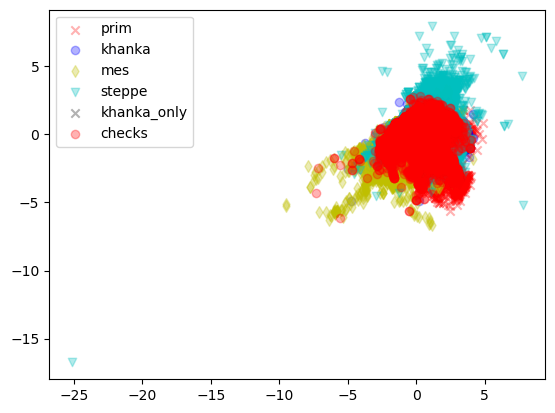

Explained coef ratio (LDA) for prim_khanka_mes_steppe_khanka_only_checks: [0.49012949 0.29259303]

Feature importances of all considered features:

wc2.1_30s_bio_18 = 0.08239562080592383
wc2.1_30s_bio_12 = 0.07134485142901062
wc2.1_30s_bio_4 = 0.06618920138497325
wc2.1_30s_bio_16 = 0.06531898541996632
wc2.1_30s_bio_15 = 0.06401040093349518
wc2.1_30s_bio_13 = 0.05555491111576613
wc2.1_30s_elev = 0.05355005186665614
wc2.1_30s_bio_8 = 0.052653668990773
wc2.1_30s_bio_3 = 0.049928238584574236
wc2.1_30s_bio_2 = 0.048776297130064164
wc2.1_30s_bio_10 = 0.04714388121239424
wc2.1_30s_bio_1 = 0.044903047761022864
wc2.1_30s_bio_7 = 0.043251378257500604
wc2.1_30s_bio_9 = 0.042487337774021194
wc2.1_30s_bio_11 = 0.04191607279397735
wc2.1_30s_bio_19 = 0.036985466439889376
wc2.1_30s_bio_6 = 0.03651830555886934
wc2.1_30s_bio_5 = 0.03633937218081485
wc2.1_30s_bio_17 = 0.03307814593144743
wc2.1_30s_bio_14 = 0.027654764428859852


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 7
wc2.1_30s_bio_18: 1
wc2.1_30s_bio_17: 6
wc2.1_30s_bio_16: 1
wc2.1_30s_bio_15: 1
wc2.1_30s_bio_14: 10
wc2.1_30s_bio_13: 1
wc2.1_30s_bio_12: 1
wc2.1_30s_bio_11: 1
wc2.1_30s_bio_10: 1
wc2.1_30s_bio_9: 5
wc2.1_30s_bio_8: 2
wc2.1_30s_bio_7: 3
wc2.1_30s_bio_6: 8
wc2.1_30s_bio_5: 9
wc2.1_30s_bio_4: 1
wc2.1_30s_bio_3: 1
wc2.1_30s_bio_2: 1
wc2.1_30s_bio_1: 4
wc2.1_30s_elev: 1
wc2.1_30s_bio_4: 0.11362455867838743
wc2.1_30s_bio_18: 0.11045023545559564
wc2.1_30s_bio_15: 0.10191573827279884
wc2.1_30s_bio_12: 0.09917826116492548
wc2.1_30s_bio_16: 0.08528381249112853
wc2.1_30s_bio_10: 0.08467767415

Balanced accuracy estimation for the best feature subset:

[0.37093319 0.47322592 0.47446869 0.44562204 0.33045183]


Balanced accuracy estimation for all features in the experiment:

[0.38014364 0.47619995 0.47029467 0.44350082 0.33107775]


Descriptive measures for: prim

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000
mean,189.634839,237.299660,135.801519,304.916067,47.261626,38.895736,111.786805,849.249268,-10.435776,12.891612,-3.026228,7.679796,35.468847,-15.751444,19.717404,959.159796,28.671383,9.689662,1.129747,1393.671782
std,162.791107,83.656279,110.777296,125.248259,33.040779,32.520873,43.266987,488.725555,9.981820,3.912934,13.782424,7.763394,12.873506,11.331407,4.610199,418.746280,5.691237,2.629211,5.483864,996.711260
min,0.000000,2.000000,0.000000,15.000000,4.243470,0.000000,6.000000,28.000000,-44.083340,-3.266670,-39.833340,-12.800000,1.000000,-49.300000,0.500000,0.000000,12.006580,1.000000,-21.645830,0.000000
25%,32.000000,190.000000,26.000000,205.000000,20.377660,7.000000,77.000000,407.000000,-17.550000,9.983330,-14.866670,1.150000,24.000000,-24.800000,16.500000,610.042660,24.524350,7.441670,-1.537500,504.000000
50%,126.000000,240.000000,100.000000,290.000000,31.305180,30.000000,109.000000,717.000000,-7.300000,13.100000,-3.433330,8.483330,29.800000,-11.300000,19.800000,723.254820,28.975380,9.450000,1.266670,1314.000000
75%,349.000000,275.000000,250.000000,417.000000,70.742520,69.000000,150.000000,1342.000000,-2.650000,15.750000,9.950000,14.666670,46.000000,-6.600000,23.500000,1295.980590,32.428940,11.758330,4.854170,2140.000000
max,1139.000000,904.000000,466.000000,1242.000000,144.378720,143.000000,424.000000,2757.000000,14.533330,31.516670,30.200000,28.266670,72.000000,9.400000,40.200000,2373.020510,100.000000,18.116670,22.433330,6113.000000


Descriptive measures for: khanka

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000
mean,37.219835,262.054704,32.045071,266.237519,83.833425,8.855013,105.071896,488.299220,-15.519899,16.824554,-13.290332,16.454236,47.170746,-22.982485,24.188261,1314.392744,25.598653,11.907524,1.295339,688.124982
std,36.346644,103.447003,29.645741,108.031896,26.817814,8.676208,44.518874,219.735302,8.061791,3.487777,7.512963,3.631747,8.219605,8.662659,3.247053,278.700474,4.338725,2.002580,5.121019,664.917882
min,0.000000,9.000000,0.000000,9.000000,9.782320,0.000000,4.000000,17.000000,-43.516670,0.333330,-40.050000,-13.133330,9.000000,-48.700000,5.500000,33.538180,13.567190,4.708330,-17.091670,-96.000000
25%,13.000000,200.000000,11.000000,202.000000,64.780443,3.000000,77.000000,353.000000,-20.983330,14.800000,-18.050000,14.550000,42.100000,-29.300000,22.600000,1150.053590,22.994130,10.591670,-1.591670,222.000000
50%,27.000000,246.000000,23.000000,247.000000,88.197750,6.000000,98.000000,443.000000,-16.416670,16.666670,-14.533330,16.600000,47.300000,-23.900000,24.500000,1320.150025,24.584770,11.900000,0.041670,518.000000
75%,51.000000,301.000000,43.000000,310.000000,105.483975,12.000000,121.000000,567.000000,-11.283330,18.633330,-9.483330,18.416670,53.100000,-18.400000,25.900000,1496.987457,27.439923,13.266670,4.041670,895.000000
max,924.000000,1445.000000,403.000000,1615.000000,152.057310,131.000000,669.000000,3726.000000,24.533330,32.116660,27.250000,32.116660,72.100000,19.200000,41.300000,2352.675050,87.314820,20.375000,27.141670,5717.000000


Descriptive measures for: mes

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000
mean,85.160506,432.715358,78.573937,447.181948,73.156115,22.143242,175.931458,910.793146,-7.977805,19.603347,-6.523144,18.874319,40.640543,-14.657936,25.982607,1121.597499,26.194027,10.470154,6.291203,441.407809
std,79.277942,213.009386,69.508047,223.656142,25.814448,20.798361,90.526854,494.403225,10.076837,3.917764,9.564792,4.097377,9.536667,11.077272,3.281410,301.606217,3.784172,2.115783,6.503843,491.428184
min,1.000000,0.000000,0.000000,9.000000,6.184340,0.000000,4.000000,17.000000,-43.300000,-1.150000,-39.866670,-13.633330,1.000000,-48.200000,0.500000,0.000000,13.160650,1.000000,-15.995830,-96.000000
25%,28.000000,256.000000,25.000000,258.000000,53.261330,7.000000,103.000000,497.000000,-15.916670,16.750000,-14.150000,16.583330,33.400000,-23.500000,24.100000,899.345700,23.561150,8.958330,0.704170,116.000000
50%,68.000000,369.000000,61.000000,374.000000,76.155860,17.000000,147.000000,719.000000,-5.616670,19.600000,-5.033330,19.083330,37.900000,-12.400000,26.100000,1033.041500,26.314620,10.358330,7.037500,291.000000
75%,111.000000,625.000000,107.000000,652.000000,91.374020,30.000000,254.000000,1296.000000,-0.166670,22.700000,0.533330,22.066670,47.500000,-5.900000,28.300000,1331.616460,28.638150,11.841670,11.416670,591.000000
max,806.000000,2565.000000,739.000000,2565.000000,152.057310,196.000000,1011.000000,4568.000000,25.900000,35.816670,35.816670,32.116660,72.000000,22.200000,44.400000,2340.031980,100.000000,17.875000,26.437500,5407.000000


Descriptive measures for: steppe

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,34545.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000
mean,470.504212,241.324996,54.592728,214.114759,83.393980,15.943571,82.727052,427.461380,26.690272,19.696862,-7.398500,13.993623,42.006826,-16.062192,22.417914,1113.695132,83.739025,16.911055,3.201332,862.509007
std,1852.248324,624.190583,64.553807,108.862268,58.552176,27.682427,42.269578,257.188589,177.216979,63.436816,12.123158,7.330101,12.246427,16.815376,10.120073,427.708614,246.082121,51.717121,6.017297,770.447171
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.483330,-38.333330,-38.783330,-29.350000,-27.533330,-48.700000,-44.200000,-7.700000,13.370790,1.000000,-18.962500,-96.000000
25%,13.000000,148.000000,11.000000,162.000000,42.654130,3.000000,61.000000,303.000000,-19.516670,14.183330,-16.783330,13.033330,36.100000,-27.400000,22.000000,844.816393,23.914248,10.708330,-1.050000,315.250000
50%,35.000000,197.000000,31.000000,204.000000,77.618385,9.000000,77.000000,386.000000,-13.400000,16.616670,-11.100000,15.800000,44.200000,-20.300000,24.500000,1199.631285,27.044005,12.458330,2.091670,660.000000
75%,90.000000,243.000000,71.000000,248.000000,109.367910,18.000000,98.000000,487.000000,-2.816670,18.650000,-0.237498,17.600000,50.600000,-9.800000,26.600000,1418.695680,33.175207,14.141670,8.141670,1200.750000
max,25043.000000,21850.000000,614.000000,1418.000000,749.000000,811.000000,514.000000,3157.000000,2261.000000,2200.000000,31.300000,32.116660,72.100000,69.900000,41.300000,2366.514890,2244.012700,803.505000,37.927930,5785.000000


Descriptive measures for: khanka_only

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,27.378462,299.578462,27.376923,310.447692,80.132530,6.375385,116.143077,591.510769,-13.423359,19.676179,-13.339333,19.163847,47.991692,-22.117692,25.874000,1340.407029,24.285833,11.651794,4.396141,113.287692
std,2.978841,7.637239,2.975155,7.777008,2.282573,0.791330,2.214149,19.405511,0.613025,0.329514,0.720229,0.415732,1.123687,0.946347,0.351511,27.167626,0.577038,0.268841,0.394718,71.039424
min,22.000000,285.000000,22.000000,294.000000,73.042260,5.000000,112.000000,555.000000,-14.866670,18.083330,-14.866670,18.083330,45.800000,-24.800000,24.800000,1279.418330,22.993200,11.050000,2.866670,17.000000
25%,25.000000,294.000000,25.000000,305.000000,78.794240,6.000000,115.000000,577.000000,-13.916670,19.533330,-13.816670,18.950000,47.000000,-22.900000,25.700000,1318.746830,23.838800,11.441670,4.047915,64.000000
50%,27.000000,299.000000,27.000000,311.000000,80.185460,6.000000,116.000000,589.000000,-13.466670,19.750000,-13.283330,19.133330,47.900000,-22.200000,25.800000,1340.153990,24.270470,11.575000,4.533330,93.500000
75%,29.000000,302.000000,29.000000,317.000000,81.574232,7.000000,117.000000,605.000000,-12.866670,19.900000,-12.850000,19.400000,48.900000,-21.200000,26.100000,1356.233890,24.627063,11.833330,4.711457,141.000000
max,38.000000,339.000000,38.000000,339.000000,87.148160,9.000000,123.000000,657.000000,-12.233330,20.416670,-10.100000,20.150000,50.800000,-19.900000,26.800000,1417.089110,26.057350,12.341670,5.262500,505.000000


Descriptive measures for: checks

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000
mean,125.302908,261.139034,104.281272,283.986299,43.748599,30.388418,107.248300,723.426910,-4.971970,17.493156,-1.008586,14.694119,34.248852,-10.139709,24.109142,916.883723,29.029599,9.597640,6.350953,471.008871
std,88.190036,155.720222,64.518458,161.203450,30.324685,19.461203,65.375089,343.177312,8.833981,3.407094,10.235539,5.853233,10.352335,10.106757,3.427871,333.798070,5.424795,2.168316,5.128580,615.362688
min,1.000000,4.000000,1.000000,9.000000,5.893040,0.000000,4.000000,17.000000,-43.733330,1.383330,-38.933330,-12.100000,10.000000,-49.100000,6.200000,49.518520,11.234570,3.033330,-18.104170,-96.000000
25%,67.000000,178.000000,57.000000,188.000000,20.898350,16.000000,69.000000,506.000000,-9.495833,15.733330,-6.879165,11.933330,26.000000,-15.700000,22.100000,656.694400,24.503105,8.075000,3.480210,87.000000
50%,111.000000,212.000000,96.000000,228.000000,31.024785,28.000000,85.000000,622.000000,-2.116670,17.266670,0.400000,16.083330,30.800000,-7.000000,24.100000,804.939330,28.667255,9.091670,7.287500,225.000000
75%,171.000000,272.750000,146.000000,318.000000,61.035905,43.000000,118.000000,854.000000,1.016670,19.033330,4.866670,18.133330,40.800000,-2.600000,26.100000,1135.123050,32.903440,10.758330,9.812500,590.000000
max,1084.000000,2071.000000,466.000000,2071.000000,142.109010,143.000000,792.000000,3810.000000,20.266670,32.116660,27.183330,32.116660,72.000000,17.800000,41.300000,2348.884770,79.083340,19.608330,24.687500,5407.000000


Pair analysis. Feature set name: WC21

Datasets to compare: prim, khanka

Feature importances of all considered features:

wc2.1_30s_bio_19 = 0.1367730923314803
wc2.1_30s_bio_8 = 0.12214315723581519
wc2.1_30s_bio_14 = 0.07749738538131075
wc2.1_30s_bio_7 = 0.07632819020928483
wc2.1_30s_bio_4 = 0.07370683396062952
wc2.1_30s_bio_15 = 0.0560390436096758
wc2.1_30s_bio_10 = 0.04799389024991054
wc2.1_30s_bio_17 = 0.04273395088636317
wc2.1_30s_bio_9 = 0.04144328016707769
wc2.1_30s_bio_1 = 0.03613711012344398
wc2.1_30s_bio_3 = 0.034559500246039654
wc2.1_30s_bio_5 = 0.033567167188898024
wc2.1_30s_elev = 0.03128400026449592
wc2.1_30s_bio_12 = 0.030334861358428746
wc2.1_30s_bio_2 = 0.030165228832368485
wc2.1_30s_bio_6 = 0.027730525250092883
wc2.1_30s_bio_18 = 0.02670493551243246
wc2.1_30s_bio_16 = 0.025762774092273438
wc2.1_30s_bio_11 = 0.0255144250762
wc2.1_30s_bio_13 = 0.02358064802377862


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 1
wc2.1_30s_bio_18: 1
wc2.1_30s_bio_17: 1
wc2.1_30s_bio_16: 1
wc2.1_30s_bio_15: 1
wc2.1_30s_bio_14: 1
wc2.1_30s_bio_13: 1
wc2.1_30s_bio_12: 1
wc2.1_30s_bio_11: 1
wc2.1_30s_bio_10: 1
wc2.1_30s_bio_9: 1
wc2.1_30s_bio_8: 1
wc2.1_30s_bio_7: 1
wc2.1_30s_bio_6: 1
wc2.1_30s_bio_5: 1
wc2.1_30s_bio_4: 1
wc2.1_30s_bio_3: 1
wc2.1_30s_bio_2: 1
wc2.1_30s_bio_1: 1
wc2.1_30s_elev: 1
wc2.1_30s_bio_8: 0.13262917922281237
wc2.1_30s_bio_4: 0.08837929324523365
wc2.1_30s_bio_7: 0.08459312858731927
wc2.1_30s_bio_19: 0.07886207748483814
wc2.1_30s_bio_17: 0.07409306669782645
wc2.1_30s_bio_14: 0.06654429989161

Balanced accuracy estimation for the best feature subset:

[0.59038883 0.85586848 0.87888908 0.76716897 0.63985962]


Balanced accuracy estimation for all features in the experiment:

[0.59049832 0.85630807 0.87968008 0.76813588 0.64010128]


Descriptive measures for: prim

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000
mean,189.634839,237.299660,135.801519,304.916067,47.261626,38.895736,111.786805,849.249268,-10.435776,12.891612,-3.026228,7.679796,35.468847,-15.751444,19.717404,959.159796,28.671383,9.689662,1.129747,1393.671782
std,162.791107,83.656279,110.777296,125.248259,33.040779,32.520873,43.266987,488.725555,9.981820,3.912934,13.782424,7.763394,12.873506,11.331407,4.610199,418.746280,5.691237,2.629211,5.483864,996.711260
min,0.000000,2.000000,0.000000,15.000000,4.243470,0.000000,6.000000,28.000000,-44.083340,-3.266670,-39.833340,-12.800000,1.000000,-49.300000,0.500000,0.000000,12.006580,1.000000,-21.645830,0.000000
25%,32.000000,190.000000,26.000000,205.000000,20.377660,7.000000,77.000000,407.000000,-17.550000,9.983330,-14.866670,1.150000,24.000000,-24.800000,16.500000,610.042660,24.524350,7.441670,-1.537500,504.000000
50%,126.000000,240.000000,100.000000,290.000000,31.305180,30.000000,109.000000,717.000000,-7.300000,13.100000,-3.433330,8.483330,29.800000,-11.300000,19.800000,723.254820,28.975380,9.450000,1.266670,1314.000000
75%,349.000000,275.000000,250.000000,417.000000,70.742520,69.000000,150.000000,1342.000000,-2.650000,15.750000,9.950000,14.666670,46.000000,-6.600000,23.500000,1295.980590,32.428940,11.758330,4.854170,2140.000000
max,1139.000000,904.000000,466.000000,1242.000000,144.378720,143.000000,424.000000,2757.000000,14.533330,31.516670,30.200000,28.266670,72.000000,9.400000,40.200000,2373.020510,100.000000,18.116670,22.433330,6113.000000


Descriptive measures for: khanka

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000
mean,37.219835,262.054704,32.045071,266.237519,83.833425,8.855013,105.071896,488.299220,-15.519899,16.824554,-13.290332,16.454236,47.170746,-22.982485,24.188261,1314.392744,25.598653,11.907524,1.295339,688.124982
std,36.346644,103.447003,29.645741,108.031896,26.817814,8.676208,44.518874,219.735302,8.061791,3.487777,7.512963,3.631747,8.219605,8.662659,3.247053,278.700474,4.338725,2.002580,5.121019,664.917882
min,0.000000,9.000000,0.000000,9.000000,9.782320,0.000000,4.000000,17.000000,-43.516670,0.333330,-40.050000,-13.133330,9.000000,-48.700000,5.500000,33.538180,13.567190,4.708330,-17.091670,-96.000000
25%,13.000000,200.000000,11.000000,202.000000,64.780443,3.000000,77.000000,353.000000,-20.983330,14.800000,-18.050000,14.550000,42.100000,-29.300000,22.600000,1150.053590,22.994130,10.591670,-1.591670,222.000000
50%,27.000000,246.000000,23.000000,247.000000,88.197750,6.000000,98.000000,443.000000,-16.416670,16.666670,-14.533330,16.600000,47.300000,-23.900000,24.500000,1320.150025,24.584770,11.900000,0.041670,518.000000
75%,51.000000,301.000000,43.000000,310.000000,105.483975,12.000000,121.000000,567.000000,-11.283330,18.633330,-9.483330,18.416670,53.100000,-18.400000,25.900000,1496.987457,27.439923,13.266670,4.041670,895.000000
max,924.000000,1445.000000,403.000000,1615.000000,152.057310,131.000000,669.000000,3726.000000,24.533330,32.116660,27.250000,32.116660,72.100000,19.200000,41.300000,2352.675050,87.314820,20.375000,27.141670,5717.000000


Datasets to compare: prim, mes

Feature importances of all considered features:

wc2.1_30s_bio_10 = 0.12085247618932198
wc2.1_30s_bio_8 = 0.10557328328307797
wc2.1_30s_bio_4 = 0.10484025257484778
wc2.1_30s_bio_5 = 0.07376757979022797
wc2.1_30s_elev = 0.06499368346566171
wc2.1_30s_bio_7 = 0.06051351420663217
wc2.1_30s_bio_18 = 0.05596180873940668
wc2.1_30s_bio_15 = 0.0464502327409989
wc2.1_30s_bio_3 = 0.0408052726405275
wc2.1_30s_bio_13 = 0.03895086602600981
wc2.1_30s_bio_9 = 0.03510102007042612
wc2.1_30s_bio_16 = 0.03500302377884387
wc2.1_30s_bio_19 = 0.03459131397995203
wc2.1_30s_bio_1 = 0.03267658593963745
wc2.1_30s_bio_12 = 0.029497455389555803
wc2.1_30s_bio_11 = 0.026820369535098566
wc2.1_30s_bio_6 = 0.02538997872462585
wc2.1_30s_bio_17 = 0.024082495688095236
wc2.1_30s_bio_2 = 0.023989053317771635
wc2.1_30s_bio_14 = 0.02013973391928108


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 1
wc2.1_30s_bio_18: 1
wc2.1_30s_bio_17: 6
wc2.1_30s_bio_16: 1
wc2.1_30s_bio_15: 1
wc2.1_30s_bio_14: 7
wc2.1_30s_bio_13: 1
wc2.1_30s_bio_12: 1
wc2.1_30s_bio_11: 3
wc2.1_30s_bio_10: 1
wc2.1_30s_bio_9: 2
wc2.1_30s_bio_8: 1
wc2.1_30s_bio_7: 1
wc2.1_30s_bio_6: 5
wc2.1_30s_bio_5: 1
wc2.1_30s_bio_4: 1
wc2.1_30s_bio_3: 1
wc2.1_30s_bio_2: 4
wc2.1_30s_bio_1: 1
wc2.1_30s_elev: 1
wc2.1_30s_bio_8: 0.1701939449413431
wc2.1_30s_bio_10: 0.1338866633157253
wc2.1_30s_bio_4: 0.11161600357537035
wc2.1_30s_elev: 0.06887632570498549
wc2.1_30s_bio_5: 0.06850966756680692
wc2.1_30s_bio_7: 0.06721814280887427
w

Balanced accuracy estimation for the best feature subset:

[0.6053236  0.87827251 0.96134546 0.76556493 0.67472692]


Balanced accuracy estimation for all features in the experiment:

[0.60818726 0.87629408 0.96263195 0.76259816 0.67611181]


Descriptive measures for: prim

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000
mean,189.634839,237.299660,135.801519,304.916067,47.261626,38.895736,111.786805,849.249268,-10.435776,12.891612,-3.026228,7.679796,35.468847,-15.751444,19.717404,959.159796,28.671383,9.689662,1.129747,1393.671782
std,162.791107,83.656279,110.777296,125.248259,33.040779,32.520873,43.266987,488.725555,9.981820,3.912934,13.782424,7.763394,12.873506,11.331407,4.610199,418.746280,5.691237,2.629211,5.483864,996.711260
min,0.000000,2.000000,0.000000,15.000000,4.243470,0.000000,6.000000,28.000000,-44.083340,-3.266670,-39.833340,-12.800000,1.000000,-49.300000,0.500000,0.000000,12.006580,1.000000,-21.645830,0.000000
25%,32.000000,190.000000,26.000000,205.000000,20.377660,7.000000,77.000000,407.000000,-17.550000,9.983330,-14.866670,1.150000,24.000000,-24.800000,16.500000,610.042660,24.524350,7.441670,-1.537500,504.000000
50%,126.000000,240.000000,100.000000,290.000000,31.305180,30.000000,109.000000,717.000000,-7.300000,13.100000,-3.433330,8.483330,29.800000,-11.300000,19.800000,723.254820,28.975380,9.450000,1.266670,1314.000000
75%,349.000000,275.000000,250.000000,417.000000,70.742520,69.000000,150.000000,1342.000000,-2.650000,15.750000,9.950000,14.666670,46.000000,-6.600000,23.500000,1295.980590,32.428940,11.758330,4.854170,2140.000000
max,1139.000000,904.000000,466.000000,1242.000000,144.378720,143.000000,424.000000,2757.000000,14.533330,31.516670,30.200000,28.266670,72.000000,9.400000,40.200000,2373.020510,100.000000,18.116670,22.433330,6113.000000


Descriptive measures for: mes

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000
mean,85.160506,432.715358,78.573937,447.181948,73.156115,22.143242,175.931458,910.793146,-7.977805,19.603347,-6.523144,18.874319,40.640543,-14.657936,25.982607,1121.597499,26.194027,10.470154,6.291203,441.407809
std,79.277942,213.009386,69.508047,223.656142,25.814448,20.798361,90.526854,494.403225,10.076837,3.917764,9.564792,4.097377,9.536667,11.077272,3.281410,301.606217,3.784172,2.115783,6.503843,491.428184
min,1.000000,0.000000,0.000000,9.000000,6.184340,0.000000,4.000000,17.000000,-43.300000,-1.150000,-39.866670,-13.633330,1.000000,-48.200000,0.500000,0.000000,13.160650,1.000000,-15.995830,-96.000000
25%,28.000000,256.000000,25.000000,258.000000,53.261330,7.000000,103.000000,497.000000,-15.916670,16.750000,-14.150000,16.583330,33.400000,-23.500000,24.100000,899.345700,23.561150,8.958330,0.704170,116.000000
50%,68.000000,369.000000,61.000000,374.000000,76.155860,17.000000,147.000000,719.000000,-5.616670,19.600000,-5.033330,19.083330,37.900000,-12.400000,26.100000,1033.041500,26.314620,10.358330,7.037500,291.000000
75%,111.000000,625.000000,107.000000,652.000000,91.374020,30.000000,254.000000,1296.000000,-0.166670,22.700000,0.533330,22.066670,47.500000,-5.900000,28.300000,1331.616460,28.638150,11.841670,11.416670,591.000000
max,806.000000,2565.000000,739.000000,2565.000000,152.057310,196.000000,1011.000000,4568.000000,25.900000,35.816670,35.816670,32.116660,72.000000,22.200000,44.400000,2340.031980,100.000000,17.875000,26.437500,5407.000000


Datasets to compare: prim, steppe

Feature importances of all considered features:

wc2.1_30s_bio_12 = 0.12151711331723648
wc2.1_30s_bio_15 = 0.06373990180743477
wc2.1_30s_bio_8 = 0.06122545286063384
wc2.1_30s_bio_14 = 0.059265679159073964
wc2.1_30s_bio_2 = 0.05728596748788686
wc2.1_30s_bio_1 = 0.053621890397214135
wc2.1_30s_bio_17 = 0.05261904377566473
wc2.1_30s_elev = 0.0504666578716092
wc2.1_30s_bio_10 = 0.049769882595441
wc2.1_30s_bio_19 = 0.04884461714674778
wc2.1_30s_bio_16 = 0.04738268339159767
wc2.1_30s_bio_4 = 0.04692998504098326
wc2.1_30s_bio_5 = 0.045343425191113756
wc2.1_30s_bio_11 = 0.04123791103340799
wc2.1_30s_bio_3 = 0.037398446995391924
wc2.1_30s_bio_6 = 0.03597650359779357
wc2.1_30s_bio_9 = 0.03550275009501206
wc2.1_30s_bio_7 = 0.033031438315834445
wc2.1_30s_bio_18 = 0.02948746026217799
wc2.1_30s_bio_13 = 0.029353189657744666


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 1
wc2.1_30s_bio_18: 7
wc2.1_30s_bio_17: 1
wc2.1_30s_bio_16: 1
wc2.1_30s_bio_15: 1
wc2.1_30s_bio_14: 2
wc2.1_30s_bio_13: 4
wc2.1_30s_bio_12: 1
wc2.1_30s_bio_11: 1
wc2.1_30s_bio_10: 1
wc2.1_30s_bio_9: 3
wc2.1_30s_bio_8: 1
wc2.1_30s_bio_7: 5
wc2.1_30s_bio_6: 6
wc2.1_30s_bio_5: 1
wc2.1_30s_bio_4: 1
wc2.1_30s_bio_3: 1
wc2.1_30s_bio_2: 1
wc2.1_30s_bio_1: 1
wc2.1_30s_elev: 1
wc2.1_30s_bio_12: 0.12292396726169516
wc2.1_30s_bio_17: 0.08843545919518997
wc2.1_30s_bio_16: 0.08767540913372156
wc2.1_30s_bio_15: 0.07834805926422664
wc2.1_30s_bio_2: 0.07537680272838576
wc2.1_30s_bio_19: 0.071298324685

Balanced accuracy estimation for the best feature subset:

[0.55563323 0.85274739 0.90823675 0.69633332 0.61477337]


Balanced accuracy estimation for all features in the experiment:

[0.55645757 0.85402579 0.91149337 0.69996159 0.61737824]


Descriptive measures for: prim

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000
mean,189.634839,237.299660,135.801519,304.916067,47.261626,38.895736,111.786805,849.249268,-10.435776,12.891612,-3.026228,7.679796,35.468847,-15.751444,19.717404,959.159796,28.671383,9.689662,1.129747,1393.671782
std,162.791107,83.656279,110.777296,125.248259,33.040779,32.520873,43.266987,488.725555,9.981820,3.912934,13.782424,7.763394,12.873506,11.331407,4.610199,418.746280,5.691237,2.629211,5.483864,996.711260
min,0.000000,2.000000,0.000000,15.000000,4.243470,0.000000,6.000000,28.000000,-44.083340,-3.266670,-39.833340,-12.800000,1.000000,-49.300000,0.500000,0.000000,12.006580,1.000000,-21.645830,0.000000
25%,32.000000,190.000000,26.000000,205.000000,20.377660,7.000000,77.000000,407.000000,-17.550000,9.983330,-14.866670,1.150000,24.000000,-24.800000,16.500000,610.042660,24.524350,7.441670,-1.537500,504.000000
50%,126.000000,240.000000,100.000000,290.000000,31.305180,30.000000,109.000000,717.000000,-7.300000,13.100000,-3.433330,8.483330,29.800000,-11.300000,19.800000,723.254820,28.975380,9.450000,1.266670,1314.000000
75%,349.000000,275.000000,250.000000,417.000000,70.742520,69.000000,150.000000,1342.000000,-2.650000,15.750000,9.950000,14.666670,46.000000,-6.600000,23.500000,1295.980590,32.428940,11.758330,4.854170,2140.000000
max,1139.000000,904.000000,466.000000,1242.000000,144.378720,143.000000,424.000000,2757.000000,14.533330,31.516670,30.200000,28.266670,72.000000,9.400000,40.200000,2373.020510,100.000000,18.116670,22.433330,6113.000000


Descriptive measures for: steppe

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,34545.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000
mean,470.504212,241.324996,54.592728,214.114759,83.393980,15.943571,82.727052,427.461380,26.690272,19.696862,-7.398500,13.993623,42.006826,-16.062192,22.417914,1113.695132,83.739025,16.911055,3.201332,862.509007
std,1852.248324,624.190583,64.553807,108.862268,58.552176,27.682427,42.269578,257.188589,177.216979,63.436816,12.123158,7.330101,12.246427,16.815376,10.120073,427.708614,246.082121,51.717121,6.017297,770.447171
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.483330,-38.333330,-38.783330,-29.350000,-27.533330,-48.700000,-44.200000,-7.700000,13.370790,1.000000,-18.962500,-96.000000
25%,13.000000,148.000000,11.000000,162.000000,42.654130,3.000000,61.000000,303.000000,-19.516670,14.183330,-16.783330,13.033330,36.100000,-27.400000,22.000000,844.816393,23.914248,10.708330,-1.050000,315.250000
50%,35.000000,197.000000,31.000000,204.000000,77.618385,9.000000,77.000000,386.000000,-13.400000,16.616670,-11.100000,15.800000,44.200000,-20.300000,24.500000,1199.631285,27.044005,12.458330,2.091670,660.000000
75%,90.000000,243.000000,71.000000,248.000000,109.367910,18.000000,98.000000,487.000000,-2.816670,18.650000,-0.237498,17.600000,50.600000,-9.800000,26.600000,1418.695680,33.175207,14.141670,8.141670,1200.750000
max,25043.000000,21850.000000,614.000000,1418.000000,749.000000,811.000000,514.000000,3157.000000,2261.000000,2200.000000,31.300000,32.116660,72.100000,69.900000,41.300000,2366.514890,2244.012700,803.505000,37.927930,5785.000000


Datasets to compare: prim, khanka_only

Feature importances of all considered features:

wc2.1_30s_bio_8 = 0.1556886446641436
wc2.1_30s_bio_10 = 0.11552027659478747
wc2.1_30s_bio_5 = 0.08370411348498501
wc2.1_30s_bio_12 = 0.07148316774952186
wc2.1_30s_elev = 0.0704353101294547
wc2.1_30s_bio_11 = 0.06595589446040849
wc2.1_30s_bio_18 = 0.06192461983397824
wc2.1_30s_bio_7 = 0.04146061762539098
wc2.1_30s_bio_16 = 0.037930908849778705
wc2.1_30s_bio_6 = 0.037630852467181876
wc2.1_30s_bio_9 = 0.037252731116468825
wc2.1_30s_bio_13 = 0.03515030566396674
wc2.1_30s_bio_15 = 0.03315036168517696
wc2.1_30s_bio_1 = 0.031359309355749994
wc2.1_30s_bio_3 = 0.031129113567737173
wc2.1_30s_bio_19 = 0.025930609712205104
wc2.1_30s_bio_4 = 0.0237986286644946
wc2.1_30s_bio_17 = 0.023074325983439465
wc2.1_30s_bio_14 = 0.010522538326515075
wc2.1_30s_bio_2 = 0.006897670064615013


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 2
wc2.1_30s_bio_18: 1
wc2.1_30s_bio_17: 3
wc2.1_30s_bio_16: 1
wc2.1_30s_bio_15: 1
wc2.1_30s_bio_14: 6
wc2.1_30s_bio_13: 1
wc2.1_30s_bio_12: 1
wc2.1_30s_bio_11: 1
wc2.1_30s_bio_10: 1
wc2.1_30s_bio_9: 1
wc2.1_30s_bio_8: 1
wc2.1_30s_bio_7: 1
wc2.1_30s_bio_6: 1
wc2.1_30s_bio_5: 1
wc2.1_30s_bio_4: 1
wc2.1_30s_bio_3: 4
wc2.1_30s_bio_2: 5
wc2.1_30s_bio_1: 1
wc2.1_30s_elev: 1
wc2.1_30s_bio_8: 0.15970792098832523
wc2.1_30s_bio_10: 0.14381679622065446
wc2.1_30s_bio_11: 0.08436454449432204
wc2.1_30s_bio_1: 0.07471077521281827
wc2.1_30s_bio_6: 0.07385362356591034
wc2.1_30s_bio_18: 0.06440865940081

Balanced accuracy estimation for the best feature subset:

[1.         1.         1.         1.         0.99131877]


Balanced accuracy estimation for all features in the experiment:

[1.         1.         1.         1.         0.99191212]


Descriptive measures for: prim

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000
mean,189.634839,237.299660,135.801519,304.916067,47.261626,38.895736,111.786805,849.249268,-10.435776,12.891612,-3.026228,7.679796,35.468847,-15.751444,19.717404,959.159796,28.671383,9.689662,1.129747,1393.671782
std,162.791107,83.656279,110.777296,125.248259,33.040779,32.520873,43.266987,488.725555,9.981820,3.912934,13.782424,7.763394,12.873506,11.331407,4.610199,418.746280,5.691237,2.629211,5.483864,996.711260
min,0.000000,2.000000,0.000000,15.000000,4.243470,0.000000,6.000000,28.000000,-44.083340,-3.266670,-39.833340,-12.800000,1.000000,-49.300000,0.500000,0.000000,12.006580,1.000000,-21.645830,0.000000
25%,32.000000,190.000000,26.000000,205.000000,20.377660,7.000000,77.000000,407.000000,-17.550000,9.983330,-14.866670,1.150000,24.000000,-24.800000,16.500000,610.042660,24.524350,7.441670,-1.537500,504.000000
50%,126.000000,240.000000,100.000000,290.000000,31.305180,30.000000,109.000000,717.000000,-7.300000,13.100000,-3.433330,8.483330,29.800000,-11.300000,19.800000,723.254820,28.975380,9.450000,1.266670,1314.000000
75%,349.000000,275.000000,250.000000,417.000000,70.742520,69.000000,150.000000,1342.000000,-2.650000,15.750000,9.950000,14.666670,46.000000,-6.600000,23.500000,1295.980590,32.428940,11.758330,4.854170,2140.000000
max,1139.000000,904.000000,466.000000,1242.000000,144.378720,143.000000,424.000000,2757.000000,14.533330,31.516670,30.200000,28.266670,72.000000,9.400000,40.200000,2373.020510,100.000000,18.116670,22.433330,6113.000000


Descriptive measures for: khanka_only

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,27.378462,299.578462,27.376923,310.447692,80.132530,6.375385,116.143077,591.510769,-13.423359,19.676179,-13.339333,19.163847,47.991692,-22.117692,25.874000,1340.407029,24.285833,11.651794,4.396141,113.287692
std,2.978841,7.637239,2.975155,7.777008,2.282573,0.791330,2.214149,19.405511,0.613025,0.329514,0.720229,0.415732,1.123687,0.946347,0.351511,27.167626,0.577038,0.268841,0.394718,71.039424
min,22.000000,285.000000,22.000000,294.000000,73.042260,5.000000,112.000000,555.000000,-14.866670,18.083330,-14.866670,18.083330,45.800000,-24.800000,24.800000,1279.418330,22.993200,11.050000,2.866670,17.000000
25%,25.000000,294.000000,25.000000,305.000000,78.794240,6.000000,115.000000,577.000000,-13.916670,19.533330,-13.816670,18.950000,47.000000,-22.900000,25.700000,1318.746830,23.838800,11.441670,4.047915,64.000000
50%,27.000000,299.000000,27.000000,311.000000,80.185460,6.000000,116.000000,589.000000,-13.466670,19.750000,-13.283330,19.133330,47.900000,-22.200000,25.800000,1340.153990,24.270470,11.575000,4.533330,93.500000
75%,29.000000,302.000000,29.000000,317.000000,81.574232,7.000000,117.000000,605.000000,-12.866670,19.900000,-12.850000,19.400000,48.900000,-21.200000,26.100000,1356.233890,24.627063,11.833330,4.711457,141.000000
max,38.000000,339.000000,38.000000,339.000000,87.148160,9.000000,123.000000,657.000000,-12.233330,20.416670,-10.100000,20.150000,50.800000,-19.900000,26.800000,1417.089110,26.057350,12.341670,5.262500,505.000000


Datasets to compare: prim, checks

Feature importances of all considered features:

wc2.1_30s_bio_10 = 0.11847524636142465
wc2.1_30s_elev = 0.09713673546425396
wc2.1_30s_bio_1 = 0.08091700029253848
wc2.1_30s_bio_5 = 0.06871983480139436
wc2.1_30s_bio_8 = 0.05974349595157732
wc2.1_30s_bio_19 = 0.054098535514826955
wc2.1_30s_bio_4 = 0.04678225506206547
wc2.1_30s_bio_9 = 0.04593247880903823
wc2.1_30s_bio_17 = 0.04490443824853457
wc2.1_30s_bio_11 = 0.04258850610126288
wc2.1_30s_bio_6 = 0.04211449701382507
wc2.1_30s_bio_12 = 0.038015980893571076
wc2.1_30s_bio_7 = 0.0364527937083467
wc2.1_30s_bio_14 = 0.035740182314043224
wc2.1_30s_bio_15 = 0.034085245097837676
wc2.1_30s_bio_3 = 0.0329294777591695
wc2.1_30s_bio_13 = 0.032357742429903844
wc2.1_30s_bio_2 = 0.03183939452167872
wc2.1_30s_bio_16 = 0.03058192700388166
wc2.1_30s_bio_18 = 0.02658423265082576


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 1
wc2.1_30s_bio_18: 5
wc2.1_30s_bio_17: 1
wc2.1_30s_bio_16: 3
wc2.1_30s_bio_15: 1
wc2.1_30s_bio_14: 4
wc2.1_30s_bio_13: 1
wc2.1_30s_bio_12: 1
wc2.1_30s_bio_11: 1
wc2.1_30s_bio_10: 1
wc2.1_30s_bio_9: 1
wc2.1_30s_bio_8: 1
wc2.1_30s_bio_7: 1
wc2.1_30s_bio_6: 1
wc2.1_30s_bio_5: 1
wc2.1_30s_bio_4: 1
wc2.1_30s_bio_3: 1
wc2.1_30s_bio_2: 2
wc2.1_30s_bio_1: 1
wc2.1_30s_elev: 1
wc2.1_30s_bio_10: 0.1354607089201708
wc2.1_30s_elev: 0.10725451760658944
wc2.1_30s_bio_5: 0.08812550651452883
wc2.1_30s_bio_1: 0.07446562469648273
wc2.1_30s_bio_19: 0.05802908748961743
wc2.1_30s_bio_8: 0.05558450325141909

Balanced accuracy estimation for the best feature subset:

[0.6194161  0.82151778 0.87763359 0.76627694 0.67879094]


Balanced accuracy estimation for all features in the experiment:

[0.62302072 0.82195877 0.87692024 0.7620521  0.67338583]


Descriptive measures for: prim

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000
mean,189.634839,237.299660,135.801519,304.916067,47.261626,38.895736,111.786805,849.249268,-10.435776,12.891612,-3.026228,7.679796,35.468847,-15.751444,19.717404,959.159796,28.671383,9.689662,1.129747,1393.671782
std,162.791107,83.656279,110.777296,125.248259,33.040779,32.520873,43.266987,488.725555,9.981820,3.912934,13.782424,7.763394,12.873506,11.331407,4.610199,418.746280,5.691237,2.629211,5.483864,996.711260
min,0.000000,2.000000,0.000000,15.000000,4.243470,0.000000,6.000000,28.000000,-44.083340,-3.266670,-39.833340,-12.800000,1.000000,-49.300000,0.500000,0.000000,12.006580,1.000000,-21.645830,0.000000
25%,32.000000,190.000000,26.000000,205.000000,20.377660,7.000000,77.000000,407.000000,-17.550000,9.983330,-14.866670,1.150000,24.000000,-24.800000,16.500000,610.042660,24.524350,7.441670,-1.537500,504.000000
50%,126.000000,240.000000,100.000000,290.000000,31.305180,30.000000,109.000000,717.000000,-7.300000,13.100000,-3.433330,8.483330,29.800000,-11.300000,19.800000,723.254820,28.975380,9.450000,1.266670,1314.000000
75%,349.000000,275.000000,250.000000,417.000000,70.742520,69.000000,150.000000,1342.000000,-2.650000,15.750000,9.950000,14.666670,46.000000,-6.600000,23.500000,1295.980590,32.428940,11.758330,4.854170,2140.000000
max,1139.000000,904.000000,466.000000,1242.000000,144.378720,143.000000,424.000000,2757.000000,14.533330,31.516670,30.200000,28.266670,72.000000,9.400000,40.200000,2373.020510,100.000000,18.116670,22.433330,6113.000000


Descriptive measures for: checks

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000
mean,125.302908,261.139034,104.281272,283.986299,43.748599,30.388418,107.248300,723.426910,-4.971970,17.493156,-1.008586,14.694119,34.248852,-10.139709,24.109142,916.883723,29.029599,9.597640,6.350953,471.008871
std,88.190036,155.720222,64.518458,161.203450,30.324685,19.461203,65.375089,343.177312,8.833981,3.407094,10.235539,5.853233,10.352335,10.106757,3.427871,333.798070,5.424795,2.168316,5.128580,615.362688
min,1.000000,4.000000,1.000000,9.000000,5.893040,0.000000,4.000000,17.000000,-43.733330,1.383330,-38.933330,-12.100000,10.000000,-49.100000,6.200000,49.518520,11.234570,3.033330,-18.104170,-96.000000
25%,67.000000,178.000000,57.000000,188.000000,20.898350,16.000000,69.000000,506.000000,-9.495833,15.733330,-6.879165,11.933330,26.000000,-15.700000,22.100000,656.694400,24.503105,8.075000,3.480210,87.000000
50%,111.000000,212.000000,96.000000,228.000000,31.024785,28.000000,85.000000,622.000000,-2.116670,17.266670,0.400000,16.083330,30.800000,-7.000000,24.100000,804.939330,28.667255,9.091670,7.287500,225.000000
75%,171.000000,272.750000,146.000000,318.000000,61.035905,43.000000,118.000000,854.000000,1.016670,19.033330,4.866670,18.133330,40.800000,-2.600000,26.100000,1135.123050,32.903440,10.758330,9.812500,590.000000
max,1084.000000,2071.000000,466.000000,2071.000000,142.109010,143.000000,792.000000,3810.000000,20.266670,32.116660,27.183330,32.116660,72.000000,17.800000,41.300000,2348.884770,79.083340,19.608330,24.687500,5407.000000


Datasets to compare: khanka, mes

Feature importances of all considered features:

wc2.1_30s_bio_12 = 0.10771812663550795
wc2.1_30s_bio_18 = 0.0838436077006573
wc2.1_30s_bio_16 = 0.07367690732906923
wc2.1_30s_bio_13 = 0.062286915247421415
wc2.1_30s_bio_1 = 0.05862231608332582
wc2.1_30s_elev = 0.054790636055772654
wc2.1_30s_bio_11 = 0.05201514270955123
wc2.1_30s_bio_6 = 0.0460693926388997
wc2.1_30s_bio_15 = 0.04545436963221934
wc2.1_30s_bio_3 = 0.045180717101937266
wc2.1_30s_bio_2 = 0.04449606553867477
wc2.1_30s_bio_4 = 0.04353154290573633
wc2.1_30s_bio_9 = 0.0433948775766902
wc2.1_30s_bio_10 = 0.041629860874098486
wc2.1_30s_bio_17 = 0.04134110751417071
wc2.1_30s_bio_7 = 0.03816076914534712
wc2.1_30s_bio_8 = 0.03594568005638585
wc2.1_30s_bio_19 = 0.028616180801699
wc2.1_30s_bio_5 = 0.028309464887509073
wc2.1_30s_bio_14 = 0.024916319565326587


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 3
wc2.1_30s_bio_18: 1
wc2.1_30s_bio_17: 1
wc2.1_30s_bio_16: 1
wc2.1_30s_bio_15: 1
wc2.1_30s_bio_14: 6
wc2.1_30s_bio_13: 1
wc2.1_30s_bio_12: 1
wc2.1_30s_bio_11: 1
wc2.1_30s_bio_10: 1
wc2.1_30s_bio_9: 1
wc2.1_30s_bio_8: 4
wc2.1_30s_bio_7: 1
wc2.1_30s_bio_6: 2
wc2.1_30s_bio_5: 5
wc2.1_30s_bio_4: 1
wc2.1_30s_bio_3: 1
wc2.1_30s_bio_2: 1
wc2.1_30s_bio_1: 1
wc2.1_30s_elev: 1
wc2.1_30s_bio_12: 0.10163139388364903
wc2.1_30s_bio_16: 0.09269016362352278
wc2.1_30s_bio_18: 0.08651127918381865
wc2.1_30s_bio_1: 0.07374392178241647
wc2.1_30s_bio_13: 0.06959371895869754
wc2.1_30s_bio_4: 0.0652922825394

Balanced accuracy estimation for the best feature subset:

[0.65712745 0.71198894 0.60903038 0.71709655 0.65944873]


Balanced accuracy estimation for all features in the experiment:

[0.659852   0.70905947 0.6102044  0.71386688 0.66006843]


Descriptive measures for: khanka

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000
mean,37.219835,262.054704,32.045071,266.237519,83.833425,8.855013,105.071896,488.299220,-15.519899,16.824554,-13.290332,16.454236,47.170746,-22.982485,24.188261,1314.392744,25.598653,11.907524,1.295339,688.124982
std,36.346644,103.447003,29.645741,108.031896,26.817814,8.676208,44.518874,219.735302,8.061791,3.487777,7.512963,3.631747,8.219605,8.662659,3.247053,278.700474,4.338725,2.002580,5.121019,664.917882
min,0.000000,9.000000,0.000000,9.000000,9.782320,0.000000,4.000000,17.000000,-43.516670,0.333330,-40.050000,-13.133330,9.000000,-48.700000,5.500000,33.538180,13.567190,4.708330,-17.091670,-96.000000
25%,13.000000,200.000000,11.000000,202.000000,64.780443,3.000000,77.000000,353.000000,-20.983330,14.800000,-18.050000,14.550000,42.100000,-29.300000,22.600000,1150.053590,22.994130,10.591670,-1.591670,222.000000
50%,27.000000,246.000000,23.000000,247.000000,88.197750,6.000000,98.000000,443.000000,-16.416670,16.666670,-14.533330,16.600000,47.300000,-23.900000,24.500000,1320.150025,24.584770,11.900000,0.041670,518.000000
75%,51.000000,301.000000,43.000000,310.000000,105.483975,12.000000,121.000000,567.000000,-11.283330,18.633330,-9.483330,18.416670,53.100000,-18.400000,25.900000,1496.987457,27.439923,13.266670,4.041670,895.000000
max,924.000000,1445.000000,403.000000,1615.000000,152.057310,131.000000,669.000000,3726.000000,24.533330,32.116660,27.250000,32.116660,72.100000,19.200000,41.300000,2352.675050,87.314820,20.375000,27.141670,5717.000000


Descriptive measures for: mes

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000
mean,85.160506,432.715358,78.573937,447.181948,73.156115,22.143242,175.931458,910.793146,-7.977805,19.603347,-6.523144,18.874319,40.640543,-14.657936,25.982607,1121.597499,26.194027,10.470154,6.291203,441.407809
std,79.277942,213.009386,69.508047,223.656142,25.814448,20.798361,90.526854,494.403225,10.076837,3.917764,9.564792,4.097377,9.536667,11.077272,3.281410,301.606217,3.784172,2.115783,6.503843,491.428184
min,1.000000,0.000000,0.000000,9.000000,6.184340,0.000000,4.000000,17.000000,-43.300000,-1.150000,-39.866670,-13.633330,1.000000,-48.200000,0.500000,0.000000,13.160650,1.000000,-15.995830,-96.000000
25%,28.000000,256.000000,25.000000,258.000000,53.261330,7.000000,103.000000,497.000000,-15.916670,16.750000,-14.150000,16.583330,33.400000,-23.500000,24.100000,899.345700,23.561150,8.958330,0.704170,116.000000
50%,68.000000,369.000000,61.000000,374.000000,76.155860,17.000000,147.000000,719.000000,-5.616670,19.600000,-5.033330,19.083330,37.900000,-12.400000,26.100000,1033.041500,26.314620,10.358330,7.037500,291.000000
75%,111.000000,625.000000,107.000000,652.000000,91.374020,30.000000,254.000000,1296.000000,-0.166670,22.700000,0.533330,22.066670,47.500000,-5.900000,28.300000,1331.616460,28.638150,11.841670,11.416670,591.000000
max,806.000000,2565.000000,739.000000,2565.000000,152.057310,196.000000,1011.000000,4568.000000,25.900000,35.816670,35.816670,32.116660,72.000000,22.200000,44.400000,2340.031980,100.000000,17.875000,26.437500,5407.000000


Datasets to compare: khanka, steppe

Feature importances of all considered features:

wc2.1_30s_bio_18 = 0.08474841051351285
wc2.1_30s_bio_3 = 0.07967249128605976
wc2.1_30s_bio_4 = 0.07444867288346863
wc2.1_30s_bio_9 = 0.056989697582165315
wc2.1_30s_elev = 0.056769250352790214
wc2.1_30s_bio_15 = 0.05439900435289517
wc2.1_30s_bio_13 = 0.05378524638268603
wc2.1_30s_bio_12 = 0.053728009078078204
wc2.1_30s_bio_16 = 0.05219028232596511
wc2.1_30s_bio_1 = 0.04939667413476771
wc2.1_30s_bio_11 = 0.045523037419795125
wc2.1_30s_bio_2 = 0.04428167418806113
wc2.1_30s_bio_7 = 0.043776327018705555
wc2.1_30s_bio_10 = 0.043520845647632714
wc2.1_30s_bio_8 = 0.04222762566357795
wc2.1_30s_bio_6 = 0.03898652856670662
wc2.1_30s_bio_19 = 0.03625261023247261
wc2.1_30s_bio_5 = 0.03623896075642838
wc2.1_30s_bio_17 = 0.03451178099630586
wc2.1_30s_bio_14 = 0.018552870617924946


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 9
wc2.1_30s_bio_18: 1
wc2.1_30s_bio_17: 12
wc2.1_30s_bio_16: 4
wc2.1_30s_bio_15: 1
wc2.1_30s_bio_14: 14
wc2.1_30s_bio_13: 6
wc2.1_30s_bio_12: 1
wc2.1_30s_bio_11: 2
wc2.1_30s_bio_10: 5
wc2.1_30s_bio_9: 3
wc2.1_30s_bio_8: 8
wc2.1_30s_bio_7: 10
wc2.1_30s_bio_6: 11
wc2.1_30s_bio_5: 13
wc2.1_30s_bio_4: 1
wc2.1_30s_bio_3: 1
wc2.1_30s_bio_2: 7
wc2.1_30s_bio_1: 1
wc2.1_30s_elev: 1
wc2.1_30s_bio_3: 0.17145807188365822
wc2.1_30s_bio_18: 0.16503042252692304
wc2.1_30s_bio_4: 0.1511732363289891
wc2.1_30s_bio_15: 0.14357209292561052
wc2.1_30s_bio_1: 0.12898215024217188
wc2.1_30s_bio_12: 0.1210368397

Balanced accuracy estimation for the best feature subset:

[0.66059662 0.67107224 0.63651048 0.64324162 0.57680734]


Balanced accuracy estimation for all features in the experiment:

[0.66030158 0.66833215 0.63442699 0.6466486  0.5803955 ]


Descriptive measures for: khanka

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000
mean,37.219835,262.054704,32.045071,266.237519,83.833425,8.855013,105.071896,488.299220,-15.519899,16.824554,-13.290332,16.454236,47.170746,-22.982485,24.188261,1314.392744,25.598653,11.907524,1.295339,688.124982
std,36.346644,103.447003,29.645741,108.031896,26.817814,8.676208,44.518874,219.735302,8.061791,3.487777,7.512963,3.631747,8.219605,8.662659,3.247053,278.700474,4.338725,2.002580,5.121019,664.917882
min,0.000000,9.000000,0.000000,9.000000,9.782320,0.000000,4.000000,17.000000,-43.516670,0.333330,-40.050000,-13.133330,9.000000,-48.700000,5.500000,33.538180,13.567190,4.708330,-17.091670,-96.000000
25%,13.000000,200.000000,11.000000,202.000000,64.780443,3.000000,77.000000,353.000000,-20.983330,14.800000,-18.050000,14.550000,42.100000,-29.300000,22.600000,1150.053590,22.994130,10.591670,-1.591670,222.000000
50%,27.000000,246.000000,23.000000,247.000000,88.197750,6.000000,98.000000,443.000000,-16.416670,16.666670,-14.533330,16.600000,47.300000,-23.900000,24.500000,1320.150025,24.584770,11.900000,0.041670,518.000000
75%,51.000000,301.000000,43.000000,310.000000,105.483975,12.000000,121.000000,567.000000,-11.283330,18.633330,-9.483330,18.416670,53.100000,-18.400000,25.900000,1496.987457,27.439923,13.266670,4.041670,895.000000
max,924.000000,1445.000000,403.000000,1615.000000,152.057310,131.000000,669.000000,3726.000000,24.533330,32.116660,27.250000,32.116660,72.100000,19.200000,41.300000,2352.675050,87.314820,20.375000,27.141670,5717.000000


Descriptive measures for: steppe

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,34545.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000
mean,470.504212,241.324996,54.592728,214.114759,83.393980,15.943571,82.727052,427.461380,26.690272,19.696862,-7.398500,13.993623,42.006826,-16.062192,22.417914,1113.695132,83.739025,16.911055,3.201332,862.509007
std,1852.248324,624.190583,64.553807,108.862268,58.552176,27.682427,42.269578,257.188589,177.216979,63.436816,12.123158,7.330101,12.246427,16.815376,10.120073,427.708614,246.082121,51.717121,6.017297,770.447171
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.483330,-38.333330,-38.783330,-29.350000,-27.533330,-48.700000,-44.200000,-7.700000,13.370790,1.000000,-18.962500,-96.000000
25%,13.000000,148.000000,11.000000,162.000000,42.654130,3.000000,61.000000,303.000000,-19.516670,14.183330,-16.783330,13.033330,36.100000,-27.400000,22.000000,844.816393,23.914248,10.708330,-1.050000,315.250000
50%,35.000000,197.000000,31.000000,204.000000,77.618385,9.000000,77.000000,386.000000,-13.400000,16.616670,-11.100000,15.800000,44.200000,-20.300000,24.500000,1199.631285,27.044005,12.458330,2.091670,660.000000
75%,90.000000,243.000000,71.000000,248.000000,109.367910,18.000000,98.000000,487.000000,-2.816670,18.650000,-0.237498,17.600000,50.600000,-9.800000,26.600000,1418.695680,33.175207,14.141670,8.141670,1200.750000
max,25043.000000,21850.000000,614.000000,1418.000000,749.000000,811.000000,514.000000,3157.000000,2261.000000,2200.000000,31.300000,32.116660,72.100000,69.900000,41.300000,2366.514890,2244.012700,803.505000,37.927930,5785.000000


Datasets to compare: khanka, khanka_only

Feature importances of all considered features:

wc2.1_30s_bio_4 = 0.081510880385955
wc2.1_30s_bio_11 = 0.07449368040959146
wc2.1_30s_bio_7 = 0.06951022274365158
wc2.1_30s_bio_6 = 0.06924879555686062
wc2.1_30s_bio_15 = 0.06626211296138027
wc2.1_30s_bio_10 = 0.06480851211961262
wc2.1_30s_bio_13 = 0.06013817548554425
wc2.1_30s_bio_12 = 0.05730834254403222
wc2.1_30s_bio_1 = 0.05203686560409165
wc2.1_30s_bio_3 = 0.05047246768135852
wc2.1_30s_bio_9 = 0.04743624760643215
wc2.1_30s_bio_16 = 0.04543829060639408
wc2.1_30s_bio_18 = 0.041919466855763005
wc2.1_30s_bio_8 = 0.03985365138102035
wc2.1_30s_elev = 0.039417376762180115
wc2.1_30s_bio_19 = 0.0379204994735303
wc2.1_30s_bio_2 = 0.031539445221694
wc2.1_30s_bio_5 = 0.027757588491833563
wc2.1_30s_bio_17 = 0.025038451970653793
wc2.1_30s_bio_14 = 0.01788892613842044


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 9
wc2.1_30s_bio_18: 7
wc2.1_30s_bio_17: 11
wc2.1_30s_bio_16: 1
wc2.1_30s_bio_15: 1
wc2.1_30s_bio_14: 10
wc2.1_30s_bio_13: 1
wc2.1_30s_bio_12: 2
wc2.1_30s_bio_11: 1
wc2.1_30s_bio_10: 1
wc2.1_30s_bio_9: 1
wc2.1_30s_bio_8: 5
wc2.1_30s_bio_7: 3
wc2.1_30s_bio_6: 1
wc2.1_30s_bio_5: 4
wc2.1_30s_bio_4: 1
wc2.1_30s_bio_3: 1
wc2.1_30s_bio_2: 8
wc2.1_30s_bio_1: 1
wc2.1_30s_elev: 6
wc2.1_30s_bio_4: 0.13251226723946227
wc2.1_30s_bio_15: 0.1167602853660979
wc2.1_30s_bio_13: 0.10138164260061508
wc2.1_30s_bio_10: 0.10062773338835097
wc2.1_30s_bio_11: 0.09963352060263393
wc2.1_30s_bio_9: 0.099591711832

Balanced accuracy estimation for the best feature subset:

[0.75441946 0.52254959 0.58606758 0.76303663 0.76437439]


Balanced accuracy estimation for all features in the experiment:

[0.76945252 0.51127479 0.60101275 0.76670701 0.75309964]


Descriptive measures for: khanka

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000
mean,37.219835,262.054704,32.045071,266.237519,83.833425,8.855013,105.071896,488.299220,-15.519899,16.824554,-13.290332,16.454236,47.170746,-22.982485,24.188261,1314.392744,25.598653,11.907524,1.295339,688.124982
std,36.346644,103.447003,29.645741,108.031896,26.817814,8.676208,44.518874,219.735302,8.061791,3.487777,7.512963,3.631747,8.219605,8.662659,3.247053,278.700474,4.338725,2.002580,5.121019,664.917882
min,0.000000,9.000000,0.000000,9.000000,9.782320,0.000000,4.000000,17.000000,-43.516670,0.333330,-40.050000,-13.133330,9.000000,-48.700000,5.500000,33.538180,13.567190,4.708330,-17.091670,-96.000000
25%,13.000000,200.000000,11.000000,202.000000,64.780443,3.000000,77.000000,353.000000,-20.983330,14.800000,-18.050000,14.550000,42.100000,-29.300000,22.600000,1150.053590,22.994130,10.591670,-1.591670,222.000000
50%,27.000000,246.000000,23.000000,247.000000,88.197750,6.000000,98.000000,443.000000,-16.416670,16.666670,-14.533330,16.600000,47.300000,-23.900000,24.500000,1320.150025,24.584770,11.900000,0.041670,518.000000
75%,51.000000,301.000000,43.000000,310.000000,105.483975,12.000000,121.000000,567.000000,-11.283330,18.633330,-9.483330,18.416670,53.100000,-18.400000,25.900000,1496.987457,27.439923,13.266670,4.041670,895.000000
max,924.000000,1445.000000,403.000000,1615.000000,152.057310,131.000000,669.000000,3726.000000,24.533330,32.116660,27.250000,32.116660,72.100000,19.200000,41.300000,2352.675050,87.314820,20.375000,27.141670,5717.000000


Descriptive measures for: khanka_only

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,27.378462,299.578462,27.376923,310.447692,80.132530,6.375385,116.143077,591.510769,-13.423359,19.676179,-13.339333,19.163847,47.991692,-22.117692,25.874000,1340.407029,24.285833,11.651794,4.396141,113.287692
std,2.978841,7.637239,2.975155,7.777008,2.282573,0.791330,2.214149,19.405511,0.613025,0.329514,0.720229,0.415732,1.123687,0.946347,0.351511,27.167626,0.577038,0.268841,0.394718,71.039424
min,22.000000,285.000000,22.000000,294.000000,73.042260,5.000000,112.000000,555.000000,-14.866670,18.083330,-14.866670,18.083330,45.800000,-24.800000,24.800000,1279.418330,22.993200,11.050000,2.866670,17.000000
25%,25.000000,294.000000,25.000000,305.000000,78.794240,6.000000,115.000000,577.000000,-13.916670,19.533330,-13.816670,18.950000,47.000000,-22.900000,25.700000,1318.746830,23.838800,11.441670,4.047915,64.000000
50%,27.000000,299.000000,27.000000,311.000000,80.185460,6.000000,116.000000,589.000000,-13.466670,19.750000,-13.283330,19.133330,47.900000,-22.200000,25.800000,1340.153990,24.270470,11.575000,4.533330,93.500000
75%,29.000000,302.000000,29.000000,317.000000,81.574232,7.000000,117.000000,605.000000,-12.866670,19.900000,-12.850000,19.400000,48.900000,-21.200000,26.100000,1356.233890,24.627063,11.833330,4.711457,141.000000
max,38.000000,339.000000,38.000000,339.000000,87.148160,9.000000,123.000000,657.000000,-12.233330,20.416670,-10.100000,20.150000,50.800000,-19.900000,26.800000,1417.089110,26.057350,12.341670,5.262500,505.000000


Datasets to compare: khanka, checks

Feature importances of all considered features:

wc2.1_30s_bio_17 = 0.13038012735707608
wc2.1_30s_bio_19 = 0.10102339086116592
wc2.1_30s_bio_15 = 0.09569500900438295
wc2.1_30s_bio_9 = 0.06592419700619682
wc2.1_30s_bio_14 = 0.06578945432438997
wc2.1_30s_bio_7 = 0.05595856285398813
wc2.1_30s_bio_4 = 0.053671821014148864
wc2.1_30s_bio_6 = 0.053150777783946196
wc2.1_30s_bio_1 = 0.05173209687660891
wc2.1_30s_bio_11 = 0.042264738832757526
wc2.1_30s_bio_2 = 0.04199868913207773
wc2.1_30s_bio_3 = 0.0323122673218148
wc2.1_30s_elev = 0.03121574541178931
wc2.1_30s_bio_12 = 0.02905533512803553
wc2.1_30s_bio_10 = 0.02799378617112796
wc2.1_30s_bio_18 = 0.02789434248347294
wc2.1_30s_bio_8 = 0.026015563832810694
wc2.1_30s_bio_16 = 0.02564633999799756
wc2.1_30s_bio_13 = 0.0212993532649315
wc2.1_30s_bio_5 = 0.020978401341280758


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 1
wc2.1_30s_bio_18: 3
wc2.1_30s_bio_17: 1
wc2.1_30s_bio_16: 9
wc2.1_30s_bio_15: 1
wc2.1_30s_bio_14: 1
wc2.1_30s_bio_13: 12
wc2.1_30s_bio_12: 10
wc2.1_30s_bio_11: 4
wc2.1_30s_bio_10: 8
wc2.1_30s_bio_9: 1
wc2.1_30s_bio_8: 11
wc2.1_30s_bio_7: 1
wc2.1_30s_bio_6: 2
wc2.1_30s_bio_5: 13
wc2.1_30s_bio_4: 1
wc2.1_30s_bio_3: 6
wc2.1_30s_bio_2: 5
wc2.1_30s_bio_1: 1
wc2.1_30s_elev: 7
wc2.1_30s_bio_15: 0.15931368978966415
wc2.1_30s_bio_17: 0.15736417230341174
wc2.1_30s_bio_19: 0.1571352251845581
wc2.1_30s_bio_9: 0.13274814856843675
wc2.1_30s_bio_7: 0.10720195196971603
wc2.1_30s_bio_4: 0.10712226248

Balanced accuracy estimation for the best feature subset:

[0.8950977  0.80833331 0.8213207  0.75883754 0.5011318 ]


Balanced accuracy estimation for all features in the experiment:

[0.89432563 0.81430011 0.8161525  0.76152846 0.49221004]


Descriptive measures for: khanka

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000
mean,37.219835,262.054704,32.045071,266.237519,83.833425,8.855013,105.071896,488.299220,-15.519899,16.824554,-13.290332,16.454236,47.170746,-22.982485,24.188261,1314.392744,25.598653,11.907524,1.295339,688.124982
std,36.346644,103.447003,29.645741,108.031896,26.817814,8.676208,44.518874,219.735302,8.061791,3.487777,7.512963,3.631747,8.219605,8.662659,3.247053,278.700474,4.338725,2.002580,5.121019,664.917882
min,0.000000,9.000000,0.000000,9.000000,9.782320,0.000000,4.000000,17.000000,-43.516670,0.333330,-40.050000,-13.133330,9.000000,-48.700000,5.500000,33.538180,13.567190,4.708330,-17.091670,-96.000000
25%,13.000000,200.000000,11.000000,202.000000,64.780443,3.000000,77.000000,353.000000,-20.983330,14.800000,-18.050000,14.550000,42.100000,-29.300000,22.600000,1150.053590,22.994130,10.591670,-1.591670,222.000000
50%,27.000000,246.000000,23.000000,247.000000,88.197750,6.000000,98.000000,443.000000,-16.416670,16.666670,-14.533330,16.600000,47.300000,-23.900000,24.500000,1320.150025,24.584770,11.900000,0.041670,518.000000
75%,51.000000,301.000000,43.000000,310.000000,105.483975,12.000000,121.000000,567.000000,-11.283330,18.633330,-9.483330,18.416670,53.100000,-18.400000,25.900000,1496.987457,27.439923,13.266670,4.041670,895.000000
max,924.000000,1445.000000,403.000000,1615.000000,152.057310,131.000000,669.000000,3726.000000,24.533330,32.116660,27.250000,32.116660,72.100000,19.200000,41.300000,2352.675050,87.314820,20.375000,27.141670,5717.000000


Descriptive measures for: checks

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000
mean,125.302908,261.139034,104.281272,283.986299,43.748599,30.388418,107.248300,723.426910,-4.971970,17.493156,-1.008586,14.694119,34.248852,-10.139709,24.109142,916.883723,29.029599,9.597640,6.350953,471.008871
std,88.190036,155.720222,64.518458,161.203450,30.324685,19.461203,65.375089,343.177312,8.833981,3.407094,10.235539,5.853233,10.352335,10.106757,3.427871,333.798070,5.424795,2.168316,5.128580,615.362688
min,1.000000,4.000000,1.000000,9.000000,5.893040,0.000000,4.000000,17.000000,-43.733330,1.383330,-38.933330,-12.100000,10.000000,-49.100000,6.200000,49.518520,11.234570,3.033330,-18.104170,-96.000000
25%,67.000000,178.000000,57.000000,188.000000,20.898350,16.000000,69.000000,506.000000,-9.495833,15.733330,-6.879165,11.933330,26.000000,-15.700000,22.100000,656.694400,24.503105,8.075000,3.480210,87.000000
50%,111.000000,212.000000,96.000000,228.000000,31.024785,28.000000,85.000000,622.000000,-2.116670,17.266670,0.400000,16.083330,30.800000,-7.000000,24.100000,804.939330,28.667255,9.091670,7.287500,225.000000
75%,171.000000,272.750000,146.000000,318.000000,61.035905,43.000000,118.000000,854.000000,1.016670,19.033330,4.866670,18.133330,40.800000,-2.600000,26.100000,1135.123050,32.903440,10.758330,9.812500,590.000000
max,1084.000000,2071.000000,466.000000,2071.000000,142.109010,143.000000,792.000000,3810.000000,20.266670,32.116660,27.183330,32.116660,72.000000,17.800000,41.300000,2348.884770,79.083340,19.608330,24.687500,5407.000000


Datasets to compare: mes, steppe

Feature importances of all considered features:

wc2.1_30s_bio_18 = 0.16515975653804035
wc2.1_30s_bio_16 = 0.12212649811657643
wc2.1_30s_bio_13 = 0.08754676315459738
wc2.1_30s_bio_12 = 0.08181753504268335
wc2.1_30s_bio_3 = 0.07038171633475133
wc2.1_30s_elev = 0.046258213610560206
wc2.1_30s_bio_8 = 0.04226157603998464
wc2.1_30s_bio_4 = 0.038329462375962166
wc2.1_30s_bio_2 = 0.03794503860979362
wc2.1_30s_bio_15 = 0.03593075307549904
wc2.1_30s_bio_1 = 0.03429220783200161
wc2.1_30s_bio_10 = 0.03408862044744112
wc2.1_30s_bio_11 = 0.03230277139692805
wc2.1_30s_bio_9 = 0.030865142182386614
wc2.1_30s_bio_6 = 0.02532882976935638
wc2.1_30s_bio_17 = 0.024013188615867362
wc2.1_30s_bio_5 = 0.023962087114444787
wc2.1_30s_bio_19 = 0.023308757026956863
wc2.1_30s_bio_7 = 0.02324327169449193
wc2.1_30s_bio_14 = 0.020837811021676887


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 1
wc2.1_30s_bio_18: 1
wc2.1_30s_bio_17: 1
wc2.1_30s_bio_16: 1
wc2.1_30s_bio_15: 1
wc2.1_30s_bio_14: 1
wc2.1_30s_bio_13: 1
wc2.1_30s_bio_12: 1
wc2.1_30s_bio_11: 1
wc2.1_30s_bio_10: 1
wc2.1_30s_bio_9: 1
wc2.1_30s_bio_8: 1
wc2.1_30s_bio_7: 1
wc2.1_30s_bio_6: 1
wc2.1_30s_bio_5: 1
wc2.1_30s_bio_4: 1
wc2.1_30s_bio_3: 1
wc2.1_30s_bio_2: 1
wc2.1_30s_bio_1: 1
wc2.1_30s_elev: 1
wc2.1_30s_bio_18: 0.14292020481479525
wc2.1_30s_bio_16: 0.12292287941148083
wc2.1_30s_bio_13: 0.09490954399415592
wc2.1_30s_bio_12: 0.08251640441928193
wc2.1_30s_bio_3: 0.06163376524094567
wc2.1_30s_elev: 0.05034700645336

Balanced accuracy estimation for the best feature subset:

[0.77581639 0.86005762 0.81398625 0.7302535  0.77098915]


Balanced accuracy estimation for all features in the experiment:

[0.7778311  0.85989477 0.81275579 0.73143074 0.76834218]


Descriptive measures for: mes

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000
mean,85.160506,432.715358,78.573937,447.181948,73.156115,22.143242,175.931458,910.793146,-7.977805,19.603347,-6.523144,18.874319,40.640543,-14.657936,25.982607,1121.597499,26.194027,10.470154,6.291203,441.407809
std,79.277942,213.009386,69.508047,223.656142,25.814448,20.798361,90.526854,494.403225,10.076837,3.917764,9.564792,4.097377,9.536667,11.077272,3.281410,301.606217,3.784172,2.115783,6.503843,491.428184
min,1.000000,0.000000,0.000000,9.000000,6.184340,0.000000,4.000000,17.000000,-43.300000,-1.150000,-39.866670,-13.633330,1.000000,-48.200000,0.500000,0.000000,13.160650,1.000000,-15.995830,-96.000000
25%,28.000000,256.000000,25.000000,258.000000,53.261330,7.000000,103.000000,497.000000,-15.916670,16.750000,-14.150000,16.583330,33.400000,-23.500000,24.100000,899.345700,23.561150,8.958330,0.704170,116.000000
50%,68.000000,369.000000,61.000000,374.000000,76.155860,17.000000,147.000000,719.000000,-5.616670,19.600000,-5.033330,19.083330,37.900000,-12.400000,26.100000,1033.041500,26.314620,10.358330,7.037500,291.000000
75%,111.000000,625.000000,107.000000,652.000000,91.374020,30.000000,254.000000,1296.000000,-0.166670,22.700000,0.533330,22.066670,47.500000,-5.900000,28.300000,1331.616460,28.638150,11.841670,11.416670,591.000000
max,806.000000,2565.000000,739.000000,2565.000000,152.057310,196.000000,1011.000000,4568.000000,25.900000,35.816670,35.816670,32.116660,72.000000,22.200000,44.400000,2340.031980,100.000000,17.875000,26.437500,5407.000000


Descriptive measures for: steppe

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,34545.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000
mean,470.504212,241.324996,54.592728,214.114759,83.393980,15.943571,82.727052,427.461380,26.690272,19.696862,-7.398500,13.993623,42.006826,-16.062192,22.417914,1113.695132,83.739025,16.911055,3.201332,862.509007
std,1852.248324,624.190583,64.553807,108.862268,58.552176,27.682427,42.269578,257.188589,177.216979,63.436816,12.123158,7.330101,12.246427,16.815376,10.120073,427.708614,246.082121,51.717121,6.017297,770.447171
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.483330,-38.333330,-38.783330,-29.350000,-27.533330,-48.700000,-44.200000,-7.700000,13.370790,1.000000,-18.962500,-96.000000
25%,13.000000,148.000000,11.000000,162.000000,42.654130,3.000000,61.000000,303.000000,-19.516670,14.183330,-16.783330,13.033330,36.100000,-27.400000,22.000000,844.816393,23.914248,10.708330,-1.050000,315.250000
50%,35.000000,197.000000,31.000000,204.000000,77.618385,9.000000,77.000000,386.000000,-13.400000,16.616670,-11.100000,15.800000,44.200000,-20.300000,24.500000,1199.631285,27.044005,12.458330,2.091670,660.000000
75%,90.000000,243.000000,71.000000,248.000000,109.367910,18.000000,98.000000,487.000000,-2.816670,18.650000,-0.237498,17.600000,50.600000,-9.800000,26.600000,1418.695680,33.175207,14.141670,8.141670,1200.750000
max,25043.000000,21850.000000,614.000000,1418.000000,749.000000,811.000000,514.000000,3157.000000,2261.000000,2200.000000,31.300000,32.116660,72.100000,69.900000,41.300000,2366.514890,2244.012700,803.505000,37.927930,5785.000000


Datasets to compare: mes, khanka_only

Feature importances of all considered features:

wc2.1_30s_bio_11 = 0.09403334295367818
wc2.1_30s_bio_15 = 0.07696251572025062
wc2.1_30s_bio_4 = 0.07067089453801173
wc2.1_30s_bio_1 = 0.06711528876040937
wc2.1_30s_bio_10 = 0.059136610178148696
wc2.1_30s_bio_16 = 0.05419636545577448
wc2.1_30s_elev = 0.05058848523198387
wc2.1_30s_bio_6 = 0.04970654898528376
wc2.1_30s_bio_13 = 0.048793525167320224
wc2.1_30s_bio_7 = 0.047329208805488916
wc2.1_30s_bio_12 = 0.046375897156343084
wc2.1_30s_bio_3 = 0.044721655444611236
wc2.1_30s_bio_18 = 0.0436173233441581
wc2.1_30s_bio_8 = 0.042742116804090395
wc2.1_30s_bio_9 = 0.04081211384860202
wc2.1_30s_bio_2 = 0.03936817074482406
wc2.1_30s_bio_19 = 0.037104467596032385
wc2.1_30s_bio_5 = 0.03578713675885055
wc2.1_30s_bio_17 = 0.03250985461475298
wc2.1_30s_bio_14 = 0.0184284778913853


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 2
wc2.1_30s_bio_18: 5
wc2.1_30s_bio_17: 6
wc2.1_30s_bio_16: 1
wc2.1_30s_bio_15: 1
wc2.1_30s_bio_14: 7
wc2.1_30s_bio_13: 1
wc2.1_30s_bio_12: 1
wc2.1_30s_bio_11: 1
wc2.1_30s_bio_10: 1
wc2.1_30s_bio_9: 3
wc2.1_30s_bio_8: 1
wc2.1_30s_bio_7: 1
wc2.1_30s_bio_6: 1
wc2.1_30s_bio_5: 4
wc2.1_30s_bio_4: 1
wc2.1_30s_bio_3: 1
wc2.1_30s_bio_2: 1
wc2.1_30s_bio_1: 1
wc2.1_30s_elev: 1
wc2.1_30s_bio_15: 0.10254365772723356
wc2.1_30s_bio_1: 0.09897356044374876
wc2.1_30s_bio_11: 0.09705832037176922
wc2.1_30s_bio_4: 0.08685874244070951
wc2.1_30s_bio_12: 0.07121153679873625
wc2.1_30s_bio_13: 0.0707619465631

Balanced accuracy estimation for the best feature subset:

[0.84392656 0.7857888  0.79678282 0.83327902 0.81665677]


Balanced accuracy estimation for all features in the experiment:

[0.82873993 0.79343161 0.80832128 0.83697668 0.80881596]


Descriptive measures for: mes

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000
mean,85.160506,432.715358,78.573937,447.181948,73.156115,22.143242,175.931458,910.793146,-7.977805,19.603347,-6.523144,18.874319,40.640543,-14.657936,25.982607,1121.597499,26.194027,10.470154,6.291203,441.407809
std,79.277942,213.009386,69.508047,223.656142,25.814448,20.798361,90.526854,494.403225,10.076837,3.917764,9.564792,4.097377,9.536667,11.077272,3.281410,301.606217,3.784172,2.115783,6.503843,491.428184
min,1.000000,0.000000,0.000000,9.000000,6.184340,0.000000,4.000000,17.000000,-43.300000,-1.150000,-39.866670,-13.633330,1.000000,-48.200000,0.500000,0.000000,13.160650,1.000000,-15.995830,-96.000000
25%,28.000000,256.000000,25.000000,258.000000,53.261330,7.000000,103.000000,497.000000,-15.916670,16.750000,-14.150000,16.583330,33.400000,-23.500000,24.100000,899.345700,23.561150,8.958330,0.704170,116.000000
50%,68.000000,369.000000,61.000000,374.000000,76.155860,17.000000,147.000000,719.000000,-5.616670,19.600000,-5.033330,19.083330,37.900000,-12.400000,26.100000,1033.041500,26.314620,10.358330,7.037500,291.000000
75%,111.000000,625.000000,107.000000,652.000000,91.374020,30.000000,254.000000,1296.000000,-0.166670,22.700000,0.533330,22.066670,47.500000,-5.900000,28.300000,1331.616460,28.638150,11.841670,11.416670,591.000000
max,806.000000,2565.000000,739.000000,2565.000000,152.057310,196.000000,1011.000000,4568.000000,25.900000,35.816670,35.816670,32.116660,72.000000,22.200000,44.400000,2340.031980,100.000000,17.875000,26.437500,5407.000000


Descriptive measures for: khanka_only

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,27.378462,299.578462,27.376923,310.447692,80.132530,6.375385,116.143077,591.510769,-13.423359,19.676179,-13.339333,19.163847,47.991692,-22.117692,25.874000,1340.407029,24.285833,11.651794,4.396141,113.287692
std,2.978841,7.637239,2.975155,7.777008,2.282573,0.791330,2.214149,19.405511,0.613025,0.329514,0.720229,0.415732,1.123687,0.946347,0.351511,27.167626,0.577038,0.268841,0.394718,71.039424
min,22.000000,285.000000,22.000000,294.000000,73.042260,5.000000,112.000000,555.000000,-14.866670,18.083330,-14.866670,18.083330,45.800000,-24.800000,24.800000,1279.418330,22.993200,11.050000,2.866670,17.000000
25%,25.000000,294.000000,25.000000,305.000000,78.794240,6.000000,115.000000,577.000000,-13.916670,19.533330,-13.816670,18.950000,47.000000,-22.900000,25.700000,1318.746830,23.838800,11.441670,4.047915,64.000000
50%,27.000000,299.000000,27.000000,311.000000,80.185460,6.000000,116.000000,589.000000,-13.466670,19.750000,-13.283330,19.133330,47.900000,-22.200000,25.800000,1340.153990,24.270470,11.575000,4.533330,93.500000
75%,29.000000,302.000000,29.000000,317.000000,81.574232,7.000000,117.000000,605.000000,-12.866670,19.900000,-12.850000,19.400000,48.900000,-21.200000,26.100000,1356.233890,24.627063,11.833330,4.711457,141.000000
max,38.000000,339.000000,38.000000,339.000000,87.148160,9.000000,123.000000,657.000000,-12.233330,20.416670,-10.100000,20.150000,50.800000,-19.900000,26.800000,1417.089110,26.057350,12.341670,5.262500,505.000000


Datasets to compare: mes, checks

Feature importances of all considered features:

wc2.1_30s_bio_15 = 0.14669093170505706
wc2.1_30s_bio_4 = 0.10133676922917341
wc2.1_30s_bio_7 = 0.07609708655623991
wc2.1_30s_bio_18 = 0.07119771108535192
wc2.1_30s_bio_3 = 0.058971550148196654
wc2.1_30s_bio_16 = 0.05591996401074476
wc2.1_30s_bio_13 = 0.05194165589107855
wc2.1_30s_bio_9 = 0.04629793417864403
wc2.1_30s_bio_11 = 0.04488625694184563
wc2.1_30s_bio_1 = 0.04430125417024649
wc2.1_30s_bio_8 = 0.04140163004742845
wc2.1_30s_bio_6 = 0.03990831282856278
wc2.1_30s_bio_12 = 0.033194137101202385
wc2.1_30s_bio_10 = 0.03310192882389725
wc2.1_30s_elev = 0.030320480609834652
wc2.1_30s_bio_2 = 0.02920305177584642
wc2.1_30s_bio_17 = 0.027882295049543492
wc2.1_30s_bio_5 = 0.024172260524712587
wc2.1_30s_bio_19 = 0.023334159730399446
wc2.1_30s_bio_14 = 0.01984062959199426


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 1
wc2.1_30s_bio_18: 1
wc2.1_30s_bio_17: 1
wc2.1_30s_bio_16: 1
wc2.1_30s_bio_15: 1
wc2.1_30s_bio_14: 1
wc2.1_30s_bio_13: 1
wc2.1_30s_bio_12: 1
wc2.1_30s_bio_11: 1
wc2.1_30s_bio_10: 1
wc2.1_30s_bio_9: 1
wc2.1_30s_bio_8: 1
wc2.1_30s_bio_7: 1
wc2.1_30s_bio_6: 1
wc2.1_30s_bio_5: 1
wc2.1_30s_bio_4: 1
wc2.1_30s_bio_3: 1
wc2.1_30s_bio_2: 1
wc2.1_30s_bio_1: 1
wc2.1_30s_elev: 1
wc2.1_30s_bio_15: 0.11106217215236863
wc2.1_30s_bio_4: 0.09867099081068939
wc2.1_30s_bio_7: 0.07780652352715685
wc2.1_30s_bio_13: 0.07321172700494426
wc2.1_30s_bio_18: 0.0730138287563774
wc2.1_30s_bio_3: 0.060683524209929

Balanced accuracy estimation for the best feature subset:

[0.86275507 0.80457002 0.81580152 0.71176838 0.49406119]


Balanced accuracy estimation for all features in the experiment:

[0.86329532 0.80381386 0.81905037 0.71225808 0.49327134]


Descriptive measures for: mes

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000
mean,85.160506,432.715358,78.573937,447.181948,73.156115,22.143242,175.931458,910.793146,-7.977805,19.603347,-6.523144,18.874319,40.640543,-14.657936,25.982607,1121.597499,26.194027,10.470154,6.291203,441.407809
std,79.277942,213.009386,69.508047,223.656142,25.814448,20.798361,90.526854,494.403225,10.076837,3.917764,9.564792,4.097377,9.536667,11.077272,3.281410,301.606217,3.784172,2.115783,6.503843,491.428184
min,1.000000,0.000000,0.000000,9.000000,6.184340,0.000000,4.000000,17.000000,-43.300000,-1.150000,-39.866670,-13.633330,1.000000,-48.200000,0.500000,0.000000,13.160650,1.000000,-15.995830,-96.000000
25%,28.000000,256.000000,25.000000,258.000000,53.261330,7.000000,103.000000,497.000000,-15.916670,16.750000,-14.150000,16.583330,33.400000,-23.500000,24.100000,899.345700,23.561150,8.958330,0.704170,116.000000
50%,68.000000,369.000000,61.000000,374.000000,76.155860,17.000000,147.000000,719.000000,-5.616670,19.600000,-5.033330,19.083330,37.900000,-12.400000,26.100000,1033.041500,26.314620,10.358330,7.037500,291.000000
75%,111.000000,625.000000,107.000000,652.000000,91.374020,30.000000,254.000000,1296.000000,-0.166670,22.700000,0.533330,22.066670,47.500000,-5.900000,28.300000,1331.616460,28.638150,11.841670,11.416670,591.000000
max,806.000000,2565.000000,739.000000,2565.000000,152.057310,196.000000,1011.000000,4568.000000,25.900000,35.816670,35.816670,32.116660,72.000000,22.200000,44.400000,2340.031980,100.000000,17.875000,26.437500,5407.000000


Descriptive measures for: checks

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000
mean,125.302908,261.139034,104.281272,283.986299,43.748599,30.388418,107.248300,723.426910,-4.971970,17.493156,-1.008586,14.694119,34.248852,-10.139709,24.109142,916.883723,29.029599,9.597640,6.350953,471.008871
std,88.190036,155.720222,64.518458,161.203450,30.324685,19.461203,65.375089,343.177312,8.833981,3.407094,10.235539,5.853233,10.352335,10.106757,3.427871,333.798070,5.424795,2.168316,5.128580,615.362688
min,1.000000,4.000000,1.000000,9.000000,5.893040,0.000000,4.000000,17.000000,-43.733330,1.383330,-38.933330,-12.100000,10.000000,-49.100000,6.200000,49.518520,11.234570,3.033330,-18.104170,-96.000000
25%,67.000000,178.000000,57.000000,188.000000,20.898350,16.000000,69.000000,506.000000,-9.495833,15.733330,-6.879165,11.933330,26.000000,-15.700000,22.100000,656.694400,24.503105,8.075000,3.480210,87.000000
50%,111.000000,212.000000,96.000000,228.000000,31.024785,28.000000,85.000000,622.000000,-2.116670,17.266670,0.400000,16.083330,30.800000,-7.000000,24.100000,804.939330,28.667255,9.091670,7.287500,225.000000
75%,171.000000,272.750000,146.000000,318.000000,61.035905,43.000000,118.000000,854.000000,1.016670,19.033330,4.866670,18.133330,40.800000,-2.600000,26.100000,1135.123050,32.903440,10.758330,9.812500,590.000000
max,1084.000000,2071.000000,466.000000,2071.000000,142.109010,143.000000,792.000000,3810.000000,20.266670,32.116660,27.183330,32.116660,72.000000,17.800000,41.300000,2348.884770,79.083340,19.608330,24.687500,5407.000000


Datasets to compare: steppe, khanka_only

Feature importances of all considered features:

wc2.1_30s_bio_4 = 0.10578067669579116
wc2.1_30s_bio_15 = 0.09306310435643715
wc2.1_30s_bio_13 = 0.09216744524479889
wc2.1_30s_bio_18 = 0.07422376437414908
wc2.1_30s_bio_12 = 0.06803690918603701
wc2.1_30s_bio_11 = 0.05951091345459984
wc2.1_30s_bio_7 = 0.0579427708909216
wc2.1_30s_bio_16 = 0.05709714019479037
wc2.1_30s_bio_19 = 0.05357996513113016
wc2.1_30s_bio_5 = 0.05192329922472766
wc2.1_30s_bio_1 = 0.04661938576491364
wc2.1_30s_bio_17 = 0.040801354028385965
wc2.1_30s_bio_9 = 0.03781325761303716
wc2.1_30s_bio_6 = 0.030433914608191927
wc2.1_30s_bio_3 = 0.02929993776363983
wc2.1_30s_elev = 0.02891267040124298
wc2.1_30s_bio_8 = 0.028160677339941223
wc2.1_30s_bio_10 = 0.02388063254869173
wc2.1_30s_bio_14 = 0.012530806298803114
wc2.1_30s_bio_2 = 0.008221374879769556


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 1
wc2.1_30s_bio_18: 1
wc2.1_30s_bio_17: 1
wc2.1_30s_bio_16: 1
wc2.1_30s_bio_15: 1
wc2.1_30s_bio_14: 1
wc2.1_30s_bio_13: 1
wc2.1_30s_bio_12: 1
wc2.1_30s_bio_11: 1
wc2.1_30s_bio_10: 2
wc2.1_30s_bio_9: 1
wc2.1_30s_bio_8: 1
wc2.1_30s_bio_7: 1
wc2.1_30s_bio_6: 1
wc2.1_30s_bio_5: 1
wc2.1_30s_bio_4: 1
wc2.1_30s_bio_3: 3
wc2.1_30s_bio_2: 4
wc2.1_30s_bio_1: 1
wc2.1_30s_elev: 1
wc2.1_30s_bio_13: 0.1161557793439348
wc2.1_30s_bio_12: 0.09692193319041414
wc2.1_30s_bio_15: 0.0943926546425517
wc2.1_30s_bio_7: 0.08318888417723463
wc2.1_30s_bio_11: 0.07330790483971987
wc2.1_30s_bio_4: 0.063270691849298

Balanced accuracy estimation for the best feature subset:

[0.99615385 1.         1.         1.         0.99230769]


Balanced accuracy estimation for all features in the experiment:

[1.         1.         1.         1.         0.98846154]


Descriptive measures for: steppe

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,34545.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000
mean,470.504212,241.324996,54.592728,214.114759,83.393980,15.943571,82.727052,427.461380,26.690272,19.696862,-7.398500,13.993623,42.006826,-16.062192,22.417914,1113.695132,83.739025,16.911055,3.201332,862.509007
std,1852.248324,624.190583,64.553807,108.862268,58.552176,27.682427,42.269578,257.188589,177.216979,63.436816,12.123158,7.330101,12.246427,16.815376,10.120073,427.708614,246.082121,51.717121,6.017297,770.447171
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.483330,-38.333330,-38.783330,-29.350000,-27.533330,-48.700000,-44.200000,-7.700000,13.370790,1.000000,-18.962500,-96.000000
25%,13.000000,148.000000,11.000000,162.000000,42.654130,3.000000,61.000000,303.000000,-19.516670,14.183330,-16.783330,13.033330,36.100000,-27.400000,22.000000,844.816393,23.914248,10.708330,-1.050000,315.250000
50%,35.000000,197.000000,31.000000,204.000000,77.618385,9.000000,77.000000,386.000000,-13.400000,16.616670,-11.100000,15.800000,44.200000,-20.300000,24.500000,1199.631285,27.044005,12.458330,2.091670,660.000000
75%,90.000000,243.000000,71.000000,248.000000,109.367910,18.000000,98.000000,487.000000,-2.816670,18.650000,-0.237498,17.600000,50.600000,-9.800000,26.600000,1418.695680,33.175207,14.141670,8.141670,1200.750000
max,25043.000000,21850.000000,614.000000,1418.000000,749.000000,811.000000,514.000000,3157.000000,2261.000000,2200.000000,31.300000,32.116660,72.100000,69.900000,41.300000,2366.514890,2244.012700,803.505000,37.927930,5785.000000


Descriptive measures for: khanka_only

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,27.378462,299.578462,27.376923,310.447692,80.132530,6.375385,116.143077,591.510769,-13.423359,19.676179,-13.339333,19.163847,47.991692,-22.117692,25.874000,1340.407029,24.285833,11.651794,4.396141,113.287692
std,2.978841,7.637239,2.975155,7.777008,2.282573,0.791330,2.214149,19.405511,0.613025,0.329514,0.720229,0.415732,1.123687,0.946347,0.351511,27.167626,0.577038,0.268841,0.394718,71.039424
min,22.000000,285.000000,22.000000,294.000000,73.042260,5.000000,112.000000,555.000000,-14.866670,18.083330,-14.866670,18.083330,45.800000,-24.800000,24.800000,1279.418330,22.993200,11.050000,2.866670,17.000000
25%,25.000000,294.000000,25.000000,305.000000,78.794240,6.000000,115.000000,577.000000,-13.916670,19.533330,-13.816670,18.950000,47.000000,-22.900000,25.700000,1318.746830,23.838800,11.441670,4.047915,64.000000
50%,27.000000,299.000000,27.000000,311.000000,80.185460,6.000000,116.000000,589.000000,-13.466670,19.750000,-13.283330,19.133330,47.900000,-22.200000,25.800000,1340.153990,24.270470,11.575000,4.533330,93.500000
75%,29.000000,302.000000,29.000000,317.000000,81.574232,7.000000,117.000000,605.000000,-12.866670,19.900000,-12.850000,19.400000,48.900000,-21.200000,26.100000,1356.233890,24.627063,11.833330,4.711457,141.000000
max,38.000000,339.000000,38.000000,339.000000,87.148160,9.000000,123.000000,657.000000,-12.233330,20.416670,-10.100000,20.150000,50.800000,-19.900000,26.800000,1417.089110,26.057350,12.341670,5.262500,505.000000


Datasets to compare: steppe, checks

Feature importances of all considered features:

wc2.1_30s_bio_12 = 0.14033245950272508
wc2.1_30s_bio_2 = 0.09664691176364505
wc2.1_30s_bio_15 = 0.06352002020164671
wc2.1_30s_bio_19 = 0.05562656764016393
wc2.1_30s_elev = 0.051405706297401925
wc2.1_30s_bio_17 = 0.05127600374242761
wc2.1_30s_bio_7 = 0.05084766735614539
wc2.1_30s_bio_3 = 0.0458309186667599
wc2.1_30s_bio_18 = 0.04580632215453646
wc2.1_30s_bio_14 = 0.04122335234462637
wc2.1_30s_bio_4 = 0.0400166651063042
wc2.1_30s_bio_16 = 0.03982421556649129
wc2.1_30s_bio_6 = 0.03889887731521955
wc2.1_30s_bio_1 = 0.038778234130418344
wc2.1_30s_bio_9 = 0.03844591175384017
wc2.1_30s_bio_13 = 0.03573866210561296
wc2.1_30s_bio_11 = 0.034668856777032485
wc2.1_30s_bio_8 = 0.03403829146237944
wc2.1_30s_bio_10 = 0.03192010326127408
wc2.1_30s_bio_5 = 0.02515425285134914


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 1
wc2.1_30s_bio_18: 1
wc2.1_30s_bio_17: 1
wc2.1_30s_bio_16: 1
wc2.1_30s_bio_15: 1
wc2.1_30s_bio_14: 1
wc2.1_30s_bio_13: 1
wc2.1_30s_bio_12: 1
wc2.1_30s_bio_11: 2
wc2.1_30s_bio_10: 3
wc2.1_30s_bio_9: 1
wc2.1_30s_bio_8: 1
wc2.1_30s_bio_7: 1
wc2.1_30s_bio_6: 1
wc2.1_30s_bio_5: 4
wc2.1_30s_bio_4: 1
wc2.1_30s_bio_3: 1
wc2.1_30s_bio_2: 1
wc2.1_30s_bio_1: 1
wc2.1_30s_elev: 1
wc2.1_30s_bio_12: 0.1299004699731417
wc2.1_30s_bio_2: 0.1288183606868523
wc2.1_30s_bio_14: 0.060183504491349085
wc2.1_30s_bio_17: 0.05809068636636768
wc2.1_30s_elev: 0.05478178132461405
wc2.1_30s_bio_19: 0.052399766235044

Balanced accuracy estimation for the best feature subset:

[0.74271063 0.80683771 0.60463615 0.67401261 0.70805322]


Balanced accuracy estimation for all features in the experiment:

[0.74227642 0.80546083 0.60030549 0.6766277  0.70383803]


Descriptive measures for: steppe

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,34545.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000
mean,470.504212,241.324996,54.592728,214.114759,83.393980,15.943571,82.727052,427.461380,26.690272,19.696862,-7.398500,13.993623,42.006826,-16.062192,22.417914,1113.695132,83.739025,16.911055,3.201332,862.509007
std,1852.248324,624.190583,64.553807,108.862268,58.552176,27.682427,42.269578,257.188589,177.216979,63.436816,12.123158,7.330101,12.246427,16.815376,10.120073,427.708614,246.082121,51.717121,6.017297,770.447171
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.483330,-38.333330,-38.783330,-29.350000,-27.533330,-48.700000,-44.200000,-7.700000,13.370790,1.000000,-18.962500,-96.000000
25%,13.000000,148.000000,11.000000,162.000000,42.654130,3.000000,61.000000,303.000000,-19.516670,14.183330,-16.783330,13.033330,36.100000,-27.400000,22.000000,844.816393,23.914248,10.708330,-1.050000,315.250000
50%,35.000000,197.000000,31.000000,204.000000,77.618385,9.000000,77.000000,386.000000,-13.400000,16.616670,-11.100000,15.800000,44.200000,-20.300000,24.500000,1199.631285,27.044005,12.458330,2.091670,660.000000
75%,90.000000,243.000000,71.000000,248.000000,109.367910,18.000000,98.000000,487.000000,-2.816670,18.650000,-0.237498,17.600000,50.600000,-9.800000,26.600000,1418.695680,33.175207,14.141670,8.141670,1200.750000
max,25043.000000,21850.000000,614.000000,1418.000000,749.000000,811.000000,514.000000,3157.000000,2261.000000,2200.000000,31.300000,32.116660,72.100000,69.900000,41.300000,2366.514890,2244.012700,803.505000,37.927930,5785.000000


Descriptive measures for: checks

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000
mean,125.302908,261.139034,104.281272,283.986299,43.748599,30.388418,107.248300,723.426910,-4.971970,17.493156,-1.008586,14.694119,34.248852,-10.139709,24.109142,916.883723,29.029599,9.597640,6.350953,471.008871
std,88.190036,155.720222,64.518458,161.203450,30.324685,19.461203,65.375089,343.177312,8.833981,3.407094,10.235539,5.853233,10.352335,10.106757,3.427871,333.798070,5.424795,2.168316,5.128580,615.362688
min,1.000000,4.000000,1.000000,9.000000,5.893040,0.000000,4.000000,17.000000,-43.733330,1.383330,-38.933330,-12.100000,10.000000,-49.100000,6.200000,49.518520,11.234570,3.033330,-18.104170,-96.000000
25%,67.000000,178.000000,57.000000,188.000000,20.898350,16.000000,69.000000,506.000000,-9.495833,15.733330,-6.879165,11.933330,26.000000,-15.700000,22.100000,656.694400,24.503105,8.075000,3.480210,87.000000
50%,111.000000,212.000000,96.000000,228.000000,31.024785,28.000000,85.000000,622.000000,-2.116670,17.266670,0.400000,16.083330,30.800000,-7.000000,24.100000,804.939330,28.667255,9.091670,7.287500,225.000000
75%,171.000000,272.750000,146.000000,318.000000,61.035905,43.000000,118.000000,854.000000,1.016670,19.033330,4.866670,18.133330,40.800000,-2.600000,26.100000,1135.123050,32.903440,10.758330,9.812500,590.000000
max,1084.000000,2071.000000,466.000000,2071.000000,142.109010,143.000000,792.000000,3810.000000,20.266670,32.116660,27.183330,32.116660,72.000000,17.800000,41.300000,2348.884770,79.083340,19.608330,24.687500,5407.000000


Datasets to compare: khanka_only, checks

Feature importances of all considered features:

wc2.1_30s_bio_10 = 0.08675715917851635
wc2.1_30s_bio_15 = 0.08395589658708887
wc2.1_30s_bio_11 = 0.07664708205975174
wc2.1_30s_bio_1 = 0.07492452352354076
wc2.1_30s_bio_12 = 0.06036294494937973
wc2.1_30s_bio_4 = 0.058669429253167864
wc2.1_30s_bio_8 = 0.055351462032251955
wc2.1_30s_bio_16 = 0.05094826802995659
wc2.1_30s_bio_13 = 0.04855312613835412
wc2.1_30s_bio_17 = 0.047823632421106724
wc2.1_30s_bio_19 = 0.046191852119748154
wc2.1_30s_elev = 0.04527247985032691
wc2.1_30s_bio_6 = 0.04231203455063818
wc2.1_30s_bio_7 = 0.0404373484823182
wc2.1_30s_bio_14 = 0.03821836771423063
wc2.1_30s_bio_18 = 0.03688452770135477
wc2.1_30s_bio_9 = 0.036139669365162594
wc2.1_30s_bio_3 = 0.03070053308283047
wc2.1_30s_bio_5 = 0.024916443343209266
wc2.1_30s_bio_2 = 0.014933219617066045


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 1
wc2.1_30s_bio_18: 1
wc2.1_30s_bio_17: 1
wc2.1_30s_bio_16: 1
wc2.1_30s_bio_15: 1
wc2.1_30s_bio_14: 1
wc2.1_30s_bio_13: 1
wc2.1_30s_bio_12: 1
wc2.1_30s_bio_11: 1
wc2.1_30s_bio_10: 1
wc2.1_30s_bio_9: 1
wc2.1_30s_bio_8: 1
wc2.1_30s_bio_7: 1
wc2.1_30s_bio_6: 1
wc2.1_30s_bio_5: 3
wc2.1_30s_bio_4: 1
wc2.1_30s_bio_3: 2
wc2.1_30s_bio_2: 1
wc2.1_30s_bio_1: 1
wc2.1_30s_elev: 1
wc2.1_30s_bio_11: 0.09012928426039739
wc2.1_30s_bio_13: 0.08950265792203979
wc2.1_30s_bio_12: 0.08123761736697224
wc2.1_30s_bio_1: 0.07997692785367133
wc2.1_30s_bio_15: 0.07456955781870381
wc2.1_30s_bio_10: 0.073264155329

Balanced accuracy estimation for the best feature subset:

[0.98436896 0.98461538 0.98076923 0.9862437  0.98700952]


Balanced accuracy estimation for all features in the experiment:

[0.98424574 0.98076923 0.98846154 0.98636691 0.98365622]


Descriptive measures for: khanka_only

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,27.378462,299.578462,27.376923,310.447692,80.132530,6.375385,116.143077,591.510769,-13.423359,19.676179,-13.339333,19.163847,47.991692,-22.117692,25.874000,1340.407029,24.285833,11.651794,4.396141,113.287692
std,2.978841,7.637239,2.975155,7.777008,2.282573,0.791330,2.214149,19.405511,0.613025,0.329514,0.720229,0.415732,1.123687,0.946347,0.351511,27.167626,0.577038,0.268841,0.394718,71.039424
min,22.000000,285.000000,22.000000,294.000000,73.042260,5.000000,112.000000,555.000000,-14.866670,18.083330,-14.866670,18.083330,45.800000,-24.800000,24.800000,1279.418330,22.993200,11.050000,2.866670,17.000000
25%,25.000000,294.000000,25.000000,305.000000,78.794240,6.000000,115.000000,577.000000,-13.916670,19.533330,-13.816670,18.950000,47.000000,-22.900000,25.700000,1318.746830,23.838800,11.441670,4.047915,64.000000
50%,27.000000,299.000000,27.000000,311.000000,80.185460,6.000000,116.000000,589.000000,-13.466670,19.750000,-13.283330,19.133330,47.900000,-22.200000,25.800000,1340.153990,24.270470,11.575000,4.533330,93.500000
75%,29.000000,302.000000,29.000000,317.000000,81.574232,7.000000,117.000000,605.000000,-12.866670,19.900000,-12.850000,19.400000,48.900000,-21.200000,26.100000,1356.233890,24.627063,11.833330,4.711457,141.000000
max,38.000000,339.000000,38.000000,339.000000,87.148160,9.000000,123.000000,657.000000,-12.233330,20.416670,-10.100000,20.150000,50.800000,-19.900000,26.800000,1417.089110,26.057350,12.341670,5.262500,505.000000


Descriptive measures for: checks

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000
mean,125.302908,261.139034,104.281272,283.986299,43.748599,30.388418,107.248300,723.426910,-4.971970,17.493156,-1.008586,14.694119,34.248852,-10.139709,24.109142,916.883723,29.029599,9.597640,6.350953,471.008871
std,88.190036,155.720222,64.518458,161.203450,30.324685,19.461203,65.375089,343.177312,8.833981,3.407094,10.235539,5.853233,10.352335,10.106757,3.427871,333.798070,5.424795,2.168316,5.128580,615.362688
min,1.000000,4.000000,1.000000,9.000000,5.893040,0.000000,4.000000,17.000000,-43.733330,1.383330,-38.933330,-12.100000,10.000000,-49.100000,6.200000,49.518520,11.234570,3.033330,-18.104170,-96.000000
25%,67.000000,178.000000,57.000000,188.000000,20.898350,16.000000,69.000000,506.000000,-9.495833,15.733330,-6.879165,11.933330,26.000000,-15.700000,22.100000,656.694400,24.503105,8.075000,3.480210,87.000000
50%,111.000000,212.000000,96.000000,228.000000,31.024785,28.000000,85.000000,622.000000,-2.116670,17.266670,0.400000,16.083330,30.800000,-7.000000,24.100000,804.939330,28.667255,9.091670,7.287500,225.000000
75%,171.000000,272.750000,146.000000,318.000000,61.035905,43.000000,118.000000,854.000000,1.016670,19.033330,4.866670,18.133330,40.800000,-2.600000,26.100000,1135.123050,32.903440,10.758330,9.812500,590.000000
max,1084.000000,2071.000000,466.000000,2071.000000,142.109010,143.000000,792.000000,3810.000000,20.266670,32.116660,27.183330,32.116660,72.000000,17.800000,41.300000,2348.884770,79.083340,19.608330,24.687500,5407.000000


END OF COMPUTATIONS

All datasets. Feature set name: all_features

datasets: ['prim', 'khanka', 'mes', 'steppe', 'khanka_only', 'checks']

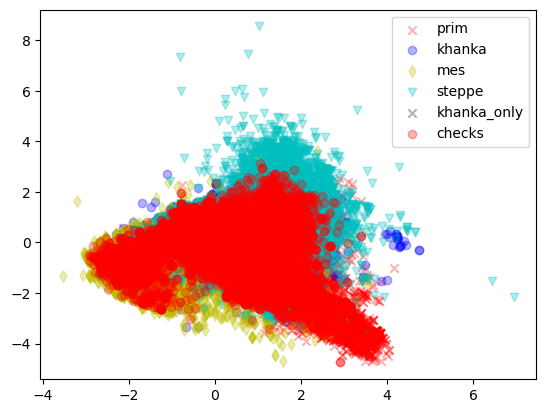

Explained coef ratio (LDA) for prim_khanka_mes_steppe_khanka_only_checks: [0.46900322 0.28266124]

Feature importances of all considered features:

wc2.1_30s_bio_18 = 0.04423623255013449
ai_v3_yr = 0.039972412491915056
wc2.1_30s_bio_16 = 0.03991962981981208
wc2.1_30s_bio_12 = 0.03958033255638684
wc2.1_30s_bio_4 = 0.03377891200224665
current_30arcsec_continentality = 0.03309152463538209
wc2.1_30s_bio_13 = 0.03269377533292614
current_30arcsec_embergerQ = 0.030546324457014166
current_30arcsec_minTempWarmest = 0.0295917095690486
wc2.1_30s_bio_15 = 0.029146637850450626
current_30arcsec_aridityIndexThornthwaite = 0.02506747823349934
wc2.1_30s_bio_7 = 0.024474110191850872
wc2.1_30s_elev = 0.02442894159547088
wc2.1_30s_bio_2 = 0.02378138300269128
wc2.1_30s_bio_8 = 0.022008841846920525
wc2.1_30s_bio_3 = 0.021784243677120427
current_30arcsec_climaticMoistureIndex = 0.020944967589138296
wc2.1_30s_bio_10 = 0.020737105720562723
wc2.1_30s_bio_9 = 0.020438816968253573
wc2.1_30s_bio_11 = 0.020409176593157063
wc2.1_30s_bio_19 = 0.019911593246878422
current_30arcsec_topoWet = 0.01951748660902878
wc2.1_30s_bio_17 = 0.019034246869381842
et0_v3_yr = 0

Recursive feature elimination procedure, selection the most informative features from

['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingD

Balanced accuracy estimation for the best feature subset:

[0.38202586 0.47506634 0.46937116 0.44775896 0.34209181]


Balanced accuracy estimation for all features in the experiment:

[0.37762902 0.47544157 0.4626668  0.45060991 0.33375683]


Descriptive measures for: prim

,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,sq3,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,...,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000
mean,1.567077,7.243522,38.911515,40.548059,7.692570,0.867463,8.560033,2.430627,2.314912,3.445484,...,2.713426,86.608376,-81.737492,9722.821287,14239.750079,120.279105,26.345519,0.089008,31.701062,616.672479
std,6.511707,16.896344,25.912663,31.148621,13.926796,4.568112,14.971443,1.983601,2.014461,1.894847,...,1.909574,36.961602,102.278737,8487.374556,11050.198463,98.436222,12.077058,0.479230,23.250429,160.437656
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-70.000000,-461.000000,0.000000,0.000000,1.470000,8.950000,-0.980000,0.000000,87.470000
25%,0.044400,0.000000,17.538580,9.240020,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,1.000000,59.000000,-157.000000,3858.000000,6703.500000,31.230000,15.750000,-0.350000,9.250000,506.660000
50%,0.214300,0.000000,34.120770,38.995510,0.244990,0.000000,0.840750,1.000000,1.000000,4.000000,...,3.000000,84.000000,-47.000000,8977.500000,11052.000000,83.995000,19.650000,0.080000,33.500000,621.030030
75%,0.603500,5.000000,59.362420,68.054400,8.813680,0.042610,10.096510,3.000000,3.000000,5.000000,...,4.000000,113.000000,-4.000000,11286.000000,17399.250000,204.530000,37.250000,0.570000,50.440000,704.770020
max,100.000000,100.000000,100.000000,99.949000,83.728430,89.116550,95.891250,7.000000,7.000000,7.000000,...,12.000000,257.000000,204.000000,97884.000000,97884.000000,497.149990,61.850000,0.930000,98.430000,1606.500000


Descriptive measures for: khanka

,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,sq3,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,...,28497.000000,28497.00000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000
mean,4.079943,4.836963,30.358655,38.933948,12.921179,2.802816,15.723995,2.240422,2.119757,2.237490,...,4.041197,127.90213,-127.684598,14367.191441,17883.414465,41.162809,36.929938,-0.318499,45.865979,737.155262
std,11.778941,12.094958,22.411631,33.395956,17.426220,9.377041,19.867013,1.918512,1.939528,2.002159,...,1.532055,38.64542,85.453659,10644.120183,12074.414143,28.767024,7.417619,0.234523,13.836899,152.082122
min,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-36.00000,-461.000000,0.000000,144.000000,1.090000,0.850000,-0.990000,0.000000,160.270000
25%,0.065325,0.000000,11.304080,5.817570,0.000000,0.000000,0.037840,1.000000,1.000000,1.000000,...,3.000000,107.00000,-184.000000,9487.500000,11187.000000,25.420000,32.600000,-0.490000,37.090000,660.510010
50%,0.350000,0.000000,25.976980,33.204280,4.603560,0.000000,6.284240,1.000000,1.000000,1.000000,...,3.000000,122.00000,-145.000000,10560.000000,15067.500000,34.380000,37.750000,-0.360000,46.680000,702.890010
75%,1.270600,4.000000,43.989210,70.398325,20.081110,0.593440,25.028500,3.000000,2.000000,3.000000,...,5.000000,150.00000,-86.000000,16353.000000,19551.000000,46.870000,42.000000,-0.210000,54.900000,766.479980
max,100.000000,100.000000,99.985900,100.000000,96.891160,99.466380,99.466380,7.000000,7.000000,7.000000,...,12.000000,262.00000,291.000000,117000.000000,117000.000000,1074.280030,61.850000,0.830000,98.750000,1676.699950


Descriptive measures for: mes

,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,sq3,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,...,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000
mean,7.036051,1.495504,20.287236,44.847976,10.247348,5.098721,15.346069,1.777936,1.583100,1.953071,...,5.414407,164.123141,-51.908603,24904.444780,30872.003956,92.128794,31.480094,-0.013119,30.541438,834.901960
std,15.906968,7.346110,18.107499,34.217711,14.140200,11.368037,18.300783,1.446461,1.429845,1.673910,...,1.914021,45.825804,102.707696,17197.471991,19241.919866,70.941631,8.114526,0.339614,18.699014,181.043890
min,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-70.000000,-461.000000,0.000000,0.000000,1.090000,0.850000,-0.990000,0.000000,114.870000
25%,0.130300,0.000000,6.437500,9.398915,0.032940,0.000000,0.560870,1.000000,1.000000,1.000000,...,4.000000,128.000000,-134.000000,10935.000000,16044.000000,37.220000,25.450000,-0.310000,17.630000,691.705015
50%,0.751400,0.000000,15.904510,43.695030,3.921100,0.000000,7.205840,1.000000,1.000000,1.000000,...,5.000000,168.000000,-30.000000,21000.000000,24180.000000,67.510000,30.000000,0.010000,29.490000,820.565005
75%,5.320100,0.000000,28.907310,77.955310,15.277520,3.136265,25.038750,2.000000,2.000000,3.000000,...,7.000000,202.000000,26.000000,32460.000000,40995.000000,130.710010,37.000000,0.280000,44.610000,986.652508
max,100.000000,100.000000,100.000000,99.993600,94.018750,100.000000,100.000000,7.000000,7.000000,7.000000,...,12.000000,290.000000,297.000000,111870.000000,111870.000000,1297.910030,61.850000,0.930000,98.750000,1768.859990


Descriptive measures for: steppe

,NVG_2000,CULTRF_2000,sq1,sq2,sq3,sq4,sq5,sq6,sq7,et0_v3_yr,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34542.000000,...,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000
mean,8.250131,16.554474,2.791045,2.054683,2.101310,1.833837,1.786379,1.734888,2.066379,976.326675,...,4.654952,111.269777,-83.104377,14470.484288,19549.328014,1487.456997,244.137528,1.753728,50.857873,732.592413
std,17.445077,21.934457,6.184876,3.034219,1.836993,1.795527,1.795399,1.783926,1.830431,369.335608,...,5.247746,45.523186,107.672137,11468.350876,13136.352776,6781.602667,2876.590529,10.363864,18.121296,244.573596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,-95.000000,-469.000000,-374.000000,-15.000000,1.090000,0.850000,-0.990000,-0.980000,-0.340000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,811.000000,...,3.000000,94.000000,-172.000000,9075.000000,10752.000000,24.420000,25.400000,-0.550000,43.930000,659.010010
50%,0.761650,5.581600,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,936.000000,...,4.000000,116.000000,-106.000000,10635.000000,15624.000000,33.150000,35.800000,-0.450000,53.270000,723.390010
75%,8.007510,26.700920,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1165.000000,...,5.000000,134.000000,6.000000,20128.500000,24937.500000,47.770000,41.050000,-0.270000,61.960000,854.140010
max,100.000000,97.152360,88.932850,84.764870,7.000000,7.000000,7.000000,7.000000,7.000000,2610.000000,...,150.700000,263.000000,235.000000,103032.000000,103032.000000,92394.000000,64638.000000,199.000000,98.750000,1574.810060


Descriptive measures for: khanka_only

,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,sq3,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,650.000000,650.0,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,...,650.0,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,3.152946,0.0,29.056993,53.881483,13.308308,0.153207,13.461515,1.575385,1.447692,1.229231,...,5.0,163.166154,-92.281538,20913.339231,20974.622308,47.993369,35.422385,-0.258000,35.458523,809.812706
std,11.247021,0.0,15.923143,28.444444,13.105389,0.840328,13.238955,0.696465,0.497639,0.420662,...,0.0,5.429767,7.501975,954.553928,494.935241,2.777164,0.813150,0.041686,3.331143,19.536155
min,0.000000,0.0,4.985480,3.950360,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,5.0,138.000000,-118.000000,11580.000000,18112.500000,42.120000,34.600000,-0.330000,28.240000,758.880000
25%,0.438600,0.0,15.113800,26.590653,2.671000,0.000000,2.671000,1.000000,1.000000,1.000000,...,5.0,160.000000,-97.000000,20842.500000,20842.500000,46.292500,34.850000,-0.290000,32.930000,797.570010
50%,0.797600,0.0,27.330500,55.107760,5.553210,0.000000,5.553210,1.000000,1.000000,1.000000,...,5.0,164.000000,-89.000000,21189.000000,21189.000000,48.350000,35.050000,-0.260000,34.480000,812.869995
75%,1.058600,0.0,39.176770,81.895030,21.929370,0.000000,21.929370,2.000000,2.000000,1.000000,...,5.0,167.000000,-86.000000,21262.500000,21262.500000,50.190000,35.687500,-0.230000,38.340000,824.609990
max,61.584700,0.0,78.041830,95.000000,55.396100,6.109190,55.396100,3.000000,2.000000,2.000000,...,5.0,173.000000,-85.000000,21556.500000,21556.500000,53.930000,37.550000,-0.150000,41.670000,860.049990


Descriptive measures for: checks

,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,sq3,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,...,20251.000000,20251.000000,20251.000000,20251.000000,20251.000000,20251.000000,20251.000000,20251.000000,20251.000000,20251.000000
mean,10.312357,1.678588,25.324094,31.392124,20.351402,3.512237,23.863639,1.881819,1.713237,2.057304,...,4.959903,133.653992,-28.078910,21010.620587,28497.533603,85.500641,25.376772,-0.074562,38.812990,750.185646
std,20.128152,7.851337,19.322884,28.452258,21.673218,8.610633,23.060290,1.459617,1.443017,1.603341,...,1.632198,38.483333,87.928643,12817.057844,15127.974239,53.285032,9.274271,0.308018,16.840023,166.435889
min,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-17.000000,-461.000000,0.000000,805.500000,1.090000,1.350000,-0.990000,0.000000,213.210010
25%,0.344750,0.000000,11.072093,5.788310,1.017230,0.000000,2.569098,1.000000,1.000000,1.000000,...,4.000000,116.000000,-73.000000,11529.000000,17094.000000,46.740000,17.850000,-0.290000,29.470000,636.909970
50%,1.405300,0.000000,22.047760,22.655160,12.751280,0.204350,17.064910,1.000000,1.000000,1.000000,...,5.000000,130.000000,2.000000,19183.500000,26004.000000,75.460000,22.650000,-0.100000,40.420000,731.799990
75%,9.127000,0.000000,33.311883,52.926248,35.086100,2.398060,41.155090,2.000000,2.000000,3.000000,...,6.000000,147.000000,28.000000,26292.000000,38397.750000,113.590000,31.550000,0.150000,49.470000,853.449980
max,100.000000,100.000000,100.000000,99.894200,96.542850,92.251910,97.214840,7.000000,7.000000,7.000000,...,12.000000,264.000000,250.000000,106812.000000,106812.000000,923.570010,61.850000,0.860000,98.750000,1760.050050


Pair analysis. Feature set name: all_features

Datasets to compare: prim, khanka

Feature importances of all considered features:

current_30arcsec_continentality = 0.0830084775763223
wc2.1_30s_bio_8 = 0.0696042148708121
wc2.1_30s_bio_19 = 0.06137139206573283
wc2.1_30s_bio_4 = 0.05640035144549058
wc2.1_30s_bio_7 = 0.05068531218126792
wc2.1_30s_bio_17 = 0.04388844036858146
wc2.1_30s_bio_14 = 0.0410293887100222
wc2.1_30s_bio_15 = 0.03832164357114941
current_30arcsec_embergerQ = 0.03420330272266992
current_30arcsec_PETseasonality = 0.0259242759819154
current_30arcsec_PETWettestQuarter = 0.025731425621663185
current_30arcsec_climaticMoistureIndex = 0.024588906864512147
current_30arcsec_PETWarmestQuarter = 0.024059922973548475
current_30arcsec_annualPET = 0.019916601828839472
current_30arcsec_growingDegDays5 = 0.019107585661389412
current_30arcsec_thermicityIndex = 0.01742286701029773
current_30arcsec_minTempWarmest = 0.017397607963374116
wc2.1_30s_bio_10 = 0.01642184892914433
current_30arcsec_growingDegDays0 = 0.01618027647295221
current_30arcsec_topoWet = 0.015199719098351902
wc2.1_30s_bio_3 = 0.014976057006443876
ai

Recursive feature elimination procedure, selection the most informative features from

['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingD

Balanced accuracy estimation for the best feature subset:

[0.57759084 0.85783213 0.87860705 0.76095036 0.63438627]


Balanced accuracy estimation for all features in the experiment:

[0.57980411 0.85707193 0.87842893 0.76544021 0.63782804]


Descriptive measures for: prim

,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,sq3,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,...,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000
mean,1.567077,7.243522,38.911515,40.548059,7.692570,0.867463,8.560033,2.430627,2.314912,3.445484,...,2.713426,86.608376,-81.737492,9722.821287,14239.750079,120.279105,26.345519,0.089008,31.701062,616.672479
std,6.511707,16.896344,25.912663,31.148621,13.926796,4.568112,14.971443,1.983601,2.014461,1.894847,...,1.909574,36.961602,102.278737,8487.374556,11050.198463,98.436222,12.077058,0.479230,23.250429,160.437656
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-70.000000,-461.000000,0.000000,0.000000,1.470000,8.950000,-0.980000,0.000000,87.470000
25%,0.044400,0.000000,17.538580,9.240020,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,1.000000,59.000000,-157.000000,3858.000000,6703.500000,31.230000,15.750000,-0.350000,9.250000,506.660000
50%,0.214300,0.000000,34.120770,38.995510,0.244990,0.000000,0.840750,1.000000,1.000000,4.000000,...,3.000000,84.000000,-47.000000,8977.500000,11052.000000,83.995000,19.650000,0.080000,33.500000,621.030030
75%,0.603500,5.000000,59.362420,68.054400,8.813680,0.042610,10.096510,3.000000,3.000000,5.000000,...,4.000000,113.000000,-4.000000,11286.000000,17399.250000,204.530000,37.250000,0.570000,50.440000,704.770020
max,100.000000,100.000000,100.000000,99.949000,83.728430,89.116550,95.891250,7.000000,7.000000,7.000000,...,12.000000,257.000000,204.000000,97884.000000,97884.000000,497.149990,61.850000,0.930000,98.430000,1606.500000


Descriptive measures for: khanka

,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,sq3,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,...,28497.000000,28497.00000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000
mean,4.079943,4.836963,30.358655,38.933948,12.921179,2.802816,15.723995,2.240422,2.119757,2.237490,...,4.041197,127.90213,-127.684598,14367.191441,17883.414465,41.162809,36.929938,-0.318499,45.865979,737.155262
std,11.778941,12.094958,22.411631,33.395956,17.426220,9.377041,19.867013,1.918512,1.939528,2.002159,...,1.532055,38.64542,85.453659,10644.120183,12074.414143,28.767024,7.417619,0.234523,13.836899,152.082122
min,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-36.00000,-461.000000,0.000000,144.000000,1.090000,0.850000,-0.990000,0.000000,160.270000
25%,0.065325,0.000000,11.304080,5.817570,0.000000,0.000000,0.037840,1.000000,1.000000,1.000000,...,3.000000,107.00000,-184.000000,9487.500000,11187.000000,25.420000,32.600000,-0.490000,37.090000,660.510010
50%,0.350000,0.000000,25.976980,33.204280,4.603560,0.000000,6.284240,1.000000,1.000000,1.000000,...,3.000000,122.00000,-145.000000,10560.000000,15067.500000,34.380000,37.750000,-0.360000,46.680000,702.890010
75%,1.270600,4.000000,43.989210,70.398325,20.081110,0.593440,25.028500,3.000000,2.000000,3.000000,...,5.000000,150.00000,-86.000000,16353.000000,19551.000000,46.870000,42.000000,-0.210000,54.900000,766.479980
max,100.000000,100.000000,99.985900,100.000000,96.891160,99.466380,99.466380,7.000000,7.000000,7.000000,...,12.000000,262.00000,291.000000,117000.000000,117000.000000,1074.280030,61.850000,0.830000,98.750000,1676.699950


Datasets to compare: prim, mes

Feature importances of all considered features:

wc2.1_30s_bio_8 = 0.10075326940727362
wc2.1_30s_bio_10 = 0.06949057470945642
wc2.1_30s_bio_4 = 0.05788047349757775
current_30arcsec_continentality = 0.05721552106118527
current_30arcsec_minTempWarmest = 0.04200781932608702
wc2.1_30s_bio_5 = 0.03490619416699613
wc2.1_30s_bio_7 = 0.03207193853142413
current_30arcsec_PETWettestQuarter = 0.030812693905580436
wc2.1_30s_bio_19 = 0.02787825090991211
wc2.1_30s_bio_15 = 0.027095085349320456
wc2.1_30s_elev = 0.024633279379907582
current_30arcsec_growingDegDays5 = 0.02410652751786888
wc2.1_30s_bio_18 = 0.02362003628028103
current_30arcsec_monthCountByTemp10 = 0.023109153212547466
wc2.1_30s_bio_13 = 0.020769504035386147
wc2.1_30s_bio_3 = 0.02035156324340718
current_30arcsec_annualPET = 0.02019843279558058
current_30arcsec_PETDriestQuarter = 0.018403642071428725
current_30arcsec_tri = 0.017802545009777848
current_30arcsec_growingDegDays0 = 0.01715344557121909
wc2.1_30s_bio_16 = 0.015328572904062842
current_30arcsec_embergerQ = 0.01495642173082788
c

Recursive feature elimination procedure, selection the most informative features from

['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingD

Balanced accuracy estimation for the best feature subset:

[0.60752025 0.87927292 0.96632436 0.7628308  0.67137033]


Balanced accuracy estimation for all features in the experiment:

[0.61059617 0.88034473 0.96475987 0.75855211 0.67111965]


Descriptive measures for: prim

,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,sq3,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,...,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000
mean,1.567077,7.243522,38.911515,40.548059,7.692570,0.867463,8.560033,2.430627,2.314912,3.445484,...,2.713426,86.608376,-81.737492,9722.821287,14239.750079,120.279105,26.345519,0.089008,31.701062,616.672479
std,6.511707,16.896344,25.912663,31.148621,13.926796,4.568112,14.971443,1.983601,2.014461,1.894847,...,1.909574,36.961602,102.278737,8487.374556,11050.198463,98.436222,12.077058,0.479230,23.250429,160.437656
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-70.000000,-461.000000,0.000000,0.000000,1.470000,8.950000,-0.980000,0.000000,87.470000
25%,0.044400,0.000000,17.538580,9.240020,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,1.000000,59.000000,-157.000000,3858.000000,6703.500000,31.230000,15.750000,-0.350000,9.250000,506.660000
50%,0.214300,0.000000,34.120770,38.995510,0.244990,0.000000,0.840750,1.000000,1.000000,4.000000,...,3.000000,84.000000,-47.000000,8977.500000,11052.000000,83.995000,19.650000,0.080000,33.500000,621.030030
75%,0.603500,5.000000,59.362420,68.054400,8.813680,0.042610,10.096510,3.000000,3.000000,5.000000,...,4.000000,113.000000,-4.000000,11286.000000,17399.250000,204.530000,37.250000,0.570000,50.440000,704.770020
max,100.000000,100.000000,100.000000,99.949000,83.728430,89.116550,95.891250,7.000000,7.000000,7.000000,...,12.000000,257.000000,204.000000,97884.000000,97884.000000,497.149990,61.850000,0.930000,98.430000,1606.500000


Descriptive measures for: mes

,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,sq3,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,...,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000
mean,7.036051,1.495504,20.287236,44.847976,10.247348,5.098721,15.346069,1.777936,1.583100,1.953071,...,5.414407,164.123141,-51.908603,24904.444780,30872.003956,92.128794,31.480094,-0.013119,30.541438,834.901960
std,15.906968,7.346110,18.107499,34.217711,14.140200,11.368037,18.300783,1.446461,1.429845,1.673910,...,1.914021,45.825804,102.707696,17197.471991,19241.919866,70.941631,8.114526,0.339614,18.699014,181.043890
min,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-70.000000,-461.000000,0.000000,0.000000,1.090000,0.850000,-0.990000,0.000000,114.870000
25%,0.130300,0.000000,6.437500,9.398915,0.032940,0.000000,0.560870,1.000000,1.000000,1.000000,...,4.000000,128.000000,-134.000000,10935.000000,16044.000000,37.220000,25.450000,-0.310000,17.630000,691.705015
50%,0.751400,0.000000,15.904510,43.695030,3.921100,0.000000,7.205840,1.000000,1.000000,1.000000,...,5.000000,168.000000,-30.000000,21000.000000,24180.000000,67.510000,30.000000,0.010000,29.490000,820.565005
75%,5.320100,0.000000,28.907310,77.955310,15.277520,3.136265,25.038750,2.000000,2.000000,3.000000,...,7.000000,202.000000,26.000000,32460.000000,40995.000000,130.710010,37.000000,0.280000,44.610000,986.652508
max,100.000000,100.000000,100.000000,99.993600,94.018750,100.000000,100.000000,7.000000,7.000000,7.000000,...,12.000000,290.000000,297.000000,111870.000000,111870.000000,1297.910030,61.850000,0.930000,98.750000,1768.859990


Datasets to compare: prim, steppe

Feature importances of all considered features:

wc2.1_30s_bio_12 = 0.06209281809535493
current_30arcsec_PETWarmestQuarter = 0.0551107556959651
current_30arcsec_continentality = 0.05113991992055363
ai_v3_yr = 0.05068271960581905
wc2.1_30s_bio_15 = 0.03435773038088024
wc2.1_30s_bio_17 = 0.031845910529947286
wc2.1_30s_bio_14 = 0.029837260633004917
current_30arcsec_topoWet = 0.02895400662044921
current_30arcsec_PETseasonality = 0.028195877662043227
current_30arcsec_aridityIndexThornthwaite = 0.027798143593754324
current_30arcsec_climaticMoistureIndex = 0.024725595345738007
wc2.1_30s_bio_1 = 0.02467213995190264
wc2.1_30s_bio_19 = 0.023978173631920754
current_30arcsec_embergerQ = 0.023848230274674354
wc2.1_30s_bio_2 = 0.023018168353624822
wc2.1_30s_bio_4 = 0.022318636493821424
wc2.1_30s_elev = 0.021927426074175565
wc2.1_30s_bio_3 = 0.0214944483119306
current_30arcsec_annualPET = 0.02006788635339031
wc2.1_30s_bio_16 = 0.01962156625433233
current_30arcsec_PETDriestQuarter = 0.019363287154976778
wc2.1_30s_bio_11 = 0.018582575408447252
wc2.1_

Recursive feature elimination procedure, selection the most informative features from

['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingD

Balanced accuracy estimation for the best feature subset:

[0.54828907 0.85684806 0.91708317 0.70324079 0.60765482]


Balanced accuracy estimation for all features in the experiment:

[0.54739206 0.85826155 0.91764172 0.70196646 0.6070882 ]


Descriptive measures for: prim

,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,sq3,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,...,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000
mean,1.567077,7.243522,38.911515,40.548059,7.692570,0.867463,8.560033,2.430627,2.314912,3.445484,...,2.713426,86.608376,-81.737492,9722.821287,14239.750079,120.279105,26.345519,0.089008,31.701062,616.672479
std,6.511707,16.896344,25.912663,31.148621,13.926796,4.568112,14.971443,1.983601,2.014461,1.894847,...,1.909574,36.961602,102.278737,8487.374556,11050.198463,98.436222,12.077058,0.479230,23.250429,160.437656
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-70.000000,-461.000000,0.000000,0.000000,1.470000,8.950000,-0.980000,0.000000,87.470000
25%,0.044400,0.000000,17.538580,9.240020,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,1.000000,59.000000,-157.000000,3858.000000,6703.500000,31.230000,15.750000,-0.350000,9.250000,506.660000
50%,0.214300,0.000000,34.120770,38.995510,0.244990,0.000000,0.840750,1.000000,1.000000,4.000000,...,3.000000,84.000000,-47.000000,8977.500000,11052.000000,83.995000,19.650000,0.080000,33.500000,621.030030
75%,0.603500,5.000000,59.362420,68.054400,8.813680,0.042610,10.096510,3.000000,3.000000,5.000000,...,4.000000,113.000000,-4.000000,11286.000000,17399.250000,204.530000,37.250000,0.570000,50.440000,704.770020
max,100.000000,100.000000,100.000000,99.949000,83.728430,89.116550,95.891250,7.000000,7.000000,7.000000,...,12.000000,257.000000,204.000000,97884.000000,97884.000000,497.149990,61.850000,0.930000,98.430000,1606.500000


Descriptive measures for: steppe

,NVG_2000,CULTRF_2000,sq1,sq2,sq3,sq4,sq5,sq6,sq7,et0_v3_yr,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34542.000000,...,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000
mean,8.250131,16.554474,2.791045,2.054683,2.101310,1.833837,1.786379,1.734888,2.066379,976.326675,...,4.654952,111.269777,-83.104377,14470.484288,19549.328014,1487.456997,244.137528,1.753728,50.857873,732.592413
std,17.445077,21.934457,6.184876,3.034219,1.836993,1.795527,1.795399,1.783926,1.830431,369.335608,...,5.247746,45.523186,107.672137,11468.350876,13136.352776,6781.602667,2876.590529,10.363864,18.121296,244.573596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,-95.000000,-469.000000,-374.000000,-15.000000,1.090000,0.850000,-0.990000,-0.980000,-0.340000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,811.000000,...,3.000000,94.000000,-172.000000,9075.000000,10752.000000,24.420000,25.400000,-0.550000,43.930000,659.010010
50%,0.761650,5.581600,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,936.000000,...,4.000000,116.000000,-106.000000,10635.000000,15624.000000,33.150000,35.800000,-0.450000,53.270000,723.390010
75%,8.007510,26.700920,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1165.000000,...,5.000000,134.000000,6.000000,20128.500000,24937.500000,47.770000,41.050000,-0.270000,61.960000,854.140010
max,100.000000,97.152360,88.932850,84.764870,7.000000,7.000000,7.000000,7.000000,7.000000,2610.000000,...,150.700000,263.000000,235.000000,103032.000000,103032.000000,92394.000000,64638.000000,199.000000,98.750000,1574.810060


Datasets to compare: prim, khanka_only

Feature importances of all considered features:

wc2.1_30s_bio_8 = 0.08747073412755062
wc2.1_30s_bio_11 = 0.057402706010931434
wc2.1_30s_bio_10 = 0.05456378758784689
wc2.1_30s_elev = 0.04972973658684774
current_30arcsec_minTempWarmest = 0.04821364576109578
wc2.1_30s_bio_6 = 0.047975718590043355
current_30arcsec_growingDegDays5 = 0.04655380389477682
wc2.1_30s_bio_5 = 0.044621637215661945
wc2.1_30s_bio_4 = 0.035580983386093744
current_30arcsec_growingDegDays0 = 0.034387713038825075
wc2.1_30s_bio_1 = 0.03363293244984683
wc2.1_30s_bio_12 = 0.02977703970619106
wc2.1_30s_bio_9 = 0.02971307323785628
wc2.1_30s_bio_15 = 0.027568144152978074
wc2.1_30s_bio_7 = 0.02636706187289742
current_30arcsec_PETColdestQuarter = 0.025353007708932594
current_30arcsec_PETDriestQuarter = 0.024521366597918193
current_30arcsec_aridityIndexThornthwaite = 0.02428969813766443
current_30arcsec_maxTempColdest = 0.023279771530721378
current_30arcsec_annualPET = 0.022716501420455077
et0_v3_yr = 0.022030952861310522
wc2.1_30s_bio_18 = 0.019884204241266384
current_30arcs

Recursive feature elimination procedure, selection the most informative features from

['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingD

Balanced accuracy estimation for the best feature subset:

[1.         1.         1.         1.         0.99171127]


Balanced accuracy estimation for all features in the experiment:

[1.         1.         1.         1.         0.99151246]


Descriptive measures for: prim

,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,sq3,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,...,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000
mean,1.567077,7.243522,38.911515,40.548059,7.692570,0.867463,8.560033,2.430627,2.314912,3.445484,...,2.713426,86.608376,-81.737492,9722.821287,14239.750079,120.279105,26.345519,0.089008,31.701062,616.672479
std,6.511707,16.896344,25.912663,31.148621,13.926796,4.568112,14.971443,1.983601,2.014461,1.894847,...,1.909574,36.961602,102.278737,8487.374556,11050.198463,98.436222,12.077058,0.479230,23.250429,160.437656
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-70.000000,-461.000000,0.000000,0.000000,1.470000,8.950000,-0.980000,0.000000,87.470000
25%,0.044400,0.000000,17.538580,9.240020,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,1.000000,59.000000,-157.000000,3858.000000,6703.500000,31.230000,15.750000,-0.350000,9.250000,506.660000
50%,0.214300,0.000000,34.120770,38.995510,0.244990,0.000000,0.840750,1.000000,1.000000,4.000000,...,3.000000,84.000000,-47.000000,8977.500000,11052.000000,83.995000,19.650000,0.080000,33.500000,621.030030
75%,0.603500,5.000000,59.362420,68.054400,8.813680,0.042610,10.096510,3.000000,3.000000,5.000000,...,4.000000,113.000000,-4.000000,11286.000000,17399.250000,204.530000,37.250000,0.570000,50.440000,704.770020
max,100.000000,100.000000,100.000000,99.949000,83.728430,89.116550,95.891250,7.000000,7.000000,7.000000,...,12.000000,257.000000,204.000000,97884.000000,97884.000000,497.149990,61.850000,0.930000,98.430000,1606.500000


Descriptive measures for: khanka_only

,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,sq3,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,650.000000,650.0,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,...,650.0,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,3.152946,0.0,29.056993,53.881483,13.308308,0.153207,13.461515,1.575385,1.447692,1.229231,...,5.0,163.166154,-92.281538,20913.339231,20974.622308,47.993369,35.422385,-0.258000,35.458523,809.812706
std,11.247021,0.0,15.923143,28.444444,13.105389,0.840328,13.238955,0.696465,0.497639,0.420662,...,0.0,5.429767,7.501975,954.553928,494.935241,2.777164,0.813150,0.041686,3.331143,19.536155
min,0.000000,0.0,4.985480,3.950360,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,5.0,138.000000,-118.000000,11580.000000,18112.500000,42.120000,34.600000,-0.330000,28.240000,758.880000
25%,0.438600,0.0,15.113800,26.590653,2.671000,0.000000,2.671000,1.000000,1.000000,1.000000,...,5.0,160.000000,-97.000000,20842.500000,20842.500000,46.292500,34.850000,-0.290000,32.930000,797.570010
50%,0.797600,0.0,27.330500,55.107760,5.553210,0.000000,5.553210,1.000000,1.000000,1.000000,...,5.0,164.000000,-89.000000,21189.000000,21189.000000,48.350000,35.050000,-0.260000,34.480000,812.869995
75%,1.058600,0.0,39.176770,81.895030,21.929370,0.000000,21.929370,2.000000,2.000000,1.000000,...,5.0,167.000000,-86.000000,21262.500000,21262.500000,50.190000,35.687500,-0.230000,38.340000,824.609990
max,61.584700,0.0,78.041830,95.000000,55.396100,6.109190,55.396100,3.000000,2.000000,2.000000,...,5.0,173.000000,-85.000000,21556.500000,21556.500000,53.930000,37.550000,-0.150000,41.670000,860.049990


Datasets to compare: prim, checks

Feature importances of all considered features:

current_30arcsec_minTempWarmest = 0.04881528562420409
wc2.1_30s_elev = 0.047338903314429685
wc2.1_30s_bio_10 = 0.04730183340107511
current_30arcsec_monthCountByTemp10 = 0.044326783875661274
current_30arcsec_growingDegDays5 = 0.040206226011551285
current_30arcsec_growingDegDays0 = 0.036762998865900835
URB_2000 = 0.03525947474854989
wc2.1_30s_bio_1 = 0.0333458996753668
wc2.1_30s_bio_17 = 0.03289890764174808
wc2.1_30s_bio_5 = 0.03222656443451413
wc2.1_30s_bio_4 = 0.022488693050543934
wc2.1_30s_bio_19 = 0.022438303126255343
current_30arcsec_topoWet = 0.021853664091320665
current_30arcsec_embergerQ = 0.021818883682689673
current_30arcsec_thermicityIndex = 0.021730586683840914
wc2.1_30s_bio_8 = 0.02152873011467987
wc2.1_30s_bio_14 = 0.021020579075056976
current_30arcsec_tri = 0.019725785899711704
current_30arcsec_PETDriestQuarter = 0.01954383234195576
current_30arcsec_continentality = 0.01884522175540008
wc2.1_30s_bio_11 = 0.018583595161485496
wc2.1_30s_bio_9 = 0.01816216929178059
current_30

Recursive feature elimination procedure, selection the most informative features from

['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingD

Balanced accuracy estimation for the best feature subset:

[0.63126476 0.82407649 0.87842316 0.77493783 0.67378869]


Balanced accuracy estimation for all features in the experiment:

[0.63110184 0.82212503 0.88350046 0.76969833 0.67274043]


Descriptive measures for: prim

,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,sq3,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,...,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000
mean,1.567077,7.243522,38.911515,40.548059,7.692570,0.867463,8.560033,2.430627,2.314912,3.445484,...,2.713426,86.608376,-81.737492,9722.821287,14239.750079,120.279105,26.345519,0.089008,31.701062,616.672479
std,6.511707,16.896344,25.912663,31.148621,13.926796,4.568112,14.971443,1.983601,2.014461,1.894847,...,1.909574,36.961602,102.278737,8487.374556,11050.198463,98.436222,12.077058,0.479230,23.250429,160.437656
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-70.000000,-461.000000,0.000000,0.000000,1.470000,8.950000,-0.980000,0.000000,87.470000
25%,0.044400,0.000000,17.538580,9.240020,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,1.000000,59.000000,-157.000000,3858.000000,6703.500000,31.230000,15.750000,-0.350000,9.250000,506.660000
50%,0.214300,0.000000,34.120770,38.995510,0.244990,0.000000,0.840750,1.000000,1.000000,4.000000,...,3.000000,84.000000,-47.000000,8977.500000,11052.000000,83.995000,19.650000,0.080000,33.500000,621.030030
75%,0.603500,5.000000,59.362420,68.054400,8.813680,0.042610,10.096510,3.000000,3.000000,5.000000,...,4.000000,113.000000,-4.000000,11286.000000,17399.250000,204.530000,37.250000,0.570000,50.440000,704.770020
max,100.000000,100.000000,100.000000,99.949000,83.728430,89.116550,95.891250,7.000000,7.000000,7.000000,...,12.000000,257.000000,204.000000,97884.000000,97884.000000,497.149990,61.850000,0.930000,98.430000,1606.500000


Descriptive measures for: checks

,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,sq3,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,...,20251.000000,20251.000000,20251.000000,20251.000000,20251.000000,20251.000000,20251.000000,20251.000000,20251.000000,20251.000000
mean,10.312357,1.678588,25.324094,31.392124,20.351402,3.512237,23.863639,1.881819,1.713237,2.057304,...,4.959903,133.653992,-28.078910,21010.620587,28497.533603,85.500641,25.376772,-0.074562,38.812990,750.185646
std,20.128152,7.851337,19.322884,28.452258,21.673218,8.610633,23.060290,1.459617,1.443017,1.603341,...,1.632198,38.483333,87.928643,12817.057844,15127.974239,53.285032,9.274271,0.308018,16.840023,166.435889
min,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-17.000000,-461.000000,0.000000,805.500000,1.090000,1.350000,-0.990000,0.000000,213.210010
25%,0.344750,0.000000,11.072093,5.788310,1.017230,0.000000,2.569098,1.000000,1.000000,1.000000,...,4.000000,116.000000,-73.000000,11529.000000,17094.000000,46.740000,17.850000,-0.290000,29.470000,636.909970
50%,1.405300,0.000000,22.047760,22.655160,12.751280,0.204350,17.064910,1.000000,1.000000,1.000000,...,5.000000,130.000000,2.000000,19183.500000,26004.000000,75.460000,22.650000,-0.100000,40.420000,731.799990
75%,9.127000,0.000000,33.311883,52.926248,35.086100,2.398060,41.155090,2.000000,2.000000,3.000000,...,6.000000,147.000000,28.000000,26292.000000,38397.750000,113.590000,31.550000,0.150000,49.470000,853.449980
max,100.000000,100.000000,100.000000,99.894200,96.542850,92.251910,97.214840,7.000000,7.000000,7.000000,...,12.000000,264.000000,250.000000,106812.000000,106812.000000,923.570010,61.850000,0.860000,98.750000,1760.050050


Datasets to compare: khanka, mes

Feature importances of all considered features:

wc2.1_30s_bio_12 = 0.05859823694873974
current_30arcsec_embergerQ = 0.05787746554215752
ai_v3_yr = 0.0480300428793207
wc2.1_30s_bio_18 = 0.04566912085860242
wc2.1_30s_bio_16 = 0.04241456440658682
current_30arcsec_aridityIndexThornthwaite = 0.03808781050168386
current_30arcsec_climaticMoistureIndex = 0.03427866116754602
wc2.1_30s_bio_1 = 0.027302305458559866
wc2.1_30s_bio_17 = 0.02701761720552559
wc2.1_30s_bio_11 = 0.025968287906632512
wc2.1_30s_elev = 0.024888566376907
current_30arcsec_tri = 0.02127888581803206
wc2.1_30s_bio_13 = 0.02123510746414026
wc2.1_30s_bio_7 = 0.0209184162354863
current_30arcsec_topoWet = 0.020904947045712472
current_30arcsec_growingDegDays0 = 0.02038069706481556
wc2.1_30s_bio_3 = 0.020340890243471958
wc2.1_30s_bio_4 = 0.020296520688836
wc2.1_30s_bio_15 = 0.020244340654245713
wc2.1_30s_bio_2 = 0.019752378443796733
current_30arcsec_PETseasonality = 0.018428344778742143
wc2.1_30s_bio_6 = 0.017296722393402717
wc2.1_30s_bio_10 = 0.017266321332680395
wc2.1_30s_bio_9 

Recursive feature elimination procedure, selection the most informative features from

['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingD

Balanced accuracy estimation for the best feature subset:

[0.66235126 0.71192293 0.61071831 0.71714418 0.65765711]


Balanced accuracy estimation for all features in the experiment:

[0.65889466 0.70836719 0.61156183 0.71615456 0.65885316]


Descriptive measures for: khanka

,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,sq3,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,...,28497.000000,28497.00000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000
mean,4.079943,4.836963,30.358655,38.933948,12.921179,2.802816,15.723995,2.240422,2.119757,2.237490,...,4.041197,127.90213,-127.684598,14367.191441,17883.414465,41.162809,36.929938,-0.318499,45.865979,737.155262
std,11.778941,12.094958,22.411631,33.395956,17.426220,9.377041,19.867013,1.918512,1.939528,2.002159,...,1.532055,38.64542,85.453659,10644.120183,12074.414143,28.767024,7.417619,0.234523,13.836899,152.082122
min,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-36.00000,-461.000000,0.000000,144.000000,1.090000,0.850000,-0.990000,0.000000,160.270000
25%,0.065325,0.000000,11.304080,5.817570,0.000000,0.000000,0.037840,1.000000,1.000000,1.000000,...,3.000000,107.00000,-184.000000,9487.500000,11187.000000,25.420000,32.600000,-0.490000,37.090000,660.510010
50%,0.350000,0.000000,25.976980,33.204280,4.603560,0.000000,6.284240,1.000000,1.000000,1.000000,...,3.000000,122.00000,-145.000000,10560.000000,15067.500000,34.380000,37.750000,-0.360000,46.680000,702.890010
75%,1.270600,4.000000,43.989210,70.398325,20.081110,0.593440,25.028500,3.000000,2.000000,3.000000,...,5.000000,150.00000,-86.000000,16353.000000,19551.000000,46.870000,42.000000,-0.210000,54.900000,766.479980
max,100.000000,100.000000,99.985900,100.000000,96.891160,99.466380,99.466380,7.000000,7.000000,7.000000,...,12.000000,262.00000,291.000000,117000.000000,117000.000000,1074.280030,61.850000,0.830000,98.750000,1676.699950


Descriptive measures for: mes

,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,sq3,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,...,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000
mean,7.036051,1.495504,20.287236,44.847976,10.247348,5.098721,15.346069,1.777936,1.583100,1.953071,...,5.414407,164.123141,-51.908603,24904.444780,30872.003956,92.128794,31.480094,-0.013119,30.541438,834.901960
std,15.906968,7.346110,18.107499,34.217711,14.140200,11.368037,18.300783,1.446461,1.429845,1.673910,...,1.914021,45.825804,102.707696,17197.471991,19241.919866,70.941631,8.114526,0.339614,18.699014,181.043890
min,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-70.000000,-461.000000,0.000000,0.000000,1.090000,0.850000,-0.990000,0.000000,114.870000
25%,0.130300,0.000000,6.437500,9.398915,0.032940,0.000000,0.560870,1.000000,1.000000,1.000000,...,4.000000,128.000000,-134.000000,10935.000000,16044.000000,37.220000,25.450000,-0.310000,17.630000,691.705015
50%,0.751400,0.000000,15.904510,43.695030,3.921100,0.000000,7.205840,1.000000,1.000000,1.000000,...,5.000000,168.000000,-30.000000,21000.000000,24180.000000,67.510000,30.000000,0.010000,29.490000,820.565005
75%,5.320100,0.000000,28.907310,77.955310,15.277520,3.136265,25.038750,2.000000,2.000000,3.000000,...,7.000000,202.000000,26.000000,32460.000000,40995.000000,130.710010,37.000000,0.280000,44.610000,986.652508
max,100.000000,100.000000,100.000000,99.993600,94.018750,100.000000,100.000000,7.000000,7.000000,7.000000,...,12.000000,290.000000,297.000000,111870.000000,111870.000000,1297.910030,61.850000,0.930000,98.750000,1768.859990


Datasets to compare: khanka, steppe

Feature importances of all considered features:

wc2.1_30s_bio_3 = 0.05111431319334408
wc2.1_30s_bio_18 = 0.04226296861663944
ai_v3_yr = 0.03719012055601237
current_30arcsec_aridityIndexThornthwaite = 0.033001335987390176
wc2.1_30s_bio_16 = 0.03286666278472833
wc2.1_30s_bio_4 = 0.03213984080776221
wc2.1_30s_bio_15 = 0.030102436907322144
wc2.1_30s_bio_13 = 0.028358112198493532
wc2.1_30s_bio_9 = 0.02737103296203299
current_30arcsec_PETDriestQuarter = 0.026404385772134685
wc2.1_30s_bio_11 = 0.024524096416453943
wc2.1_30s_bio_12 = 0.02419836184322219
wc2.1_30s_bio_19 = 0.023207610366378594
wc2.1_30s_elev = 0.022862561406756975
wc2.1_30s_bio_1 = 0.022340997701722442
current_30arcsec_continentality = 0.021973731699299823
et0_v3_yr = 0.021631289134319102
current_30arcsec_embergerQ = 0.021148863944436096
wc2.1_30s_bio_8 = 0.020471784439117964
current_30arcsec_tri = 0.02024308850001457
current_30arcsec_topoWet = 0.020094636047471328
current_30arcsec_annualPET = 0.019980601227946142
FOR_2000 = 0.019755679267343194
current_30arcsec_PETWettestQu

Recursive feature elimination procedure, selection the most informative features from

['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingD

Balanced accuracy estimation for the best feature subset:

[0.64791623 0.66823128 0.6274452  0.63685708 0.57718969]


Balanced accuracy estimation for all features in the experiment:

[0.64738586 0.67809671 0.6303851  0.62062669 0.57780947]


Descriptive measures for: khanka

,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,sq3,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,...,28497.000000,28497.00000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000
mean,4.079943,4.836963,30.358655,38.933948,12.921179,2.802816,15.723995,2.240422,2.119757,2.237490,...,4.041197,127.90213,-127.684598,14367.191441,17883.414465,41.162809,36.929938,-0.318499,45.865979,737.155262
std,11.778941,12.094958,22.411631,33.395956,17.426220,9.377041,19.867013,1.918512,1.939528,2.002159,...,1.532055,38.64542,85.453659,10644.120183,12074.414143,28.767024,7.417619,0.234523,13.836899,152.082122
min,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-36.00000,-461.000000,0.000000,144.000000,1.090000,0.850000,-0.990000,0.000000,160.270000
25%,0.065325,0.000000,11.304080,5.817570,0.000000,0.000000,0.037840,1.000000,1.000000,1.000000,...,3.000000,107.00000,-184.000000,9487.500000,11187.000000,25.420000,32.600000,-0.490000,37.090000,660.510010
50%,0.350000,0.000000,25.976980,33.204280,4.603560,0.000000,6.284240,1.000000,1.000000,1.000000,...,3.000000,122.00000,-145.000000,10560.000000,15067.500000,34.380000,37.750000,-0.360000,46.680000,702.890010
75%,1.270600,4.000000,43.989210,70.398325,20.081110,0.593440,25.028500,3.000000,2.000000,3.000000,...,5.000000,150.00000,-86.000000,16353.000000,19551.000000,46.870000,42.000000,-0.210000,54.900000,766.479980
max,100.000000,100.000000,99.985900,100.000000,96.891160,99.466380,99.466380,7.000000,7.000000,7.000000,...,12.000000,262.00000,291.000000,117000.000000,117000.000000,1074.280030,61.850000,0.830000,98.750000,1676.699950


Descriptive measures for: steppe

,NVG_2000,CULTRF_2000,sq1,sq2,sq3,sq4,sq5,sq6,sq7,et0_v3_yr,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34542.000000,...,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000
mean,8.250131,16.554474,2.791045,2.054683,2.101310,1.833837,1.786379,1.734888,2.066379,976.326675,...,4.654952,111.269777,-83.104377,14470.484288,19549.328014,1487.456997,244.137528,1.753728,50.857873,732.592413
std,17.445077,21.934457,6.184876,3.034219,1.836993,1.795527,1.795399,1.783926,1.830431,369.335608,...,5.247746,45.523186,107.672137,11468.350876,13136.352776,6781.602667,2876.590529,10.363864,18.121296,244.573596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,-95.000000,-469.000000,-374.000000,-15.000000,1.090000,0.850000,-0.990000,-0.980000,-0.340000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,811.000000,...,3.000000,94.000000,-172.000000,9075.000000,10752.000000,24.420000,25.400000,-0.550000,43.930000,659.010010
50%,0.761650,5.581600,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,936.000000,...,4.000000,116.000000,-106.000000,10635.000000,15624.000000,33.150000,35.800000,-0.450000,53.270000,723.390010
75%,8.007510,26.700920,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1165.000000,...,5.000000,134.000000,6.000000,20128.500000,24937.500000,47.770000,41.050000,-0.270000,61.960000,854.140010
max,100.000000,97.152360,88.932850,84.764870,7.000000,7.000000,7.000000,7.000000,7.000000,2610.000000,...,150.700000,263.000000,235.000000,103032.000000,103032.000000,92394.000000,64638.000000,199.000000,98.750000,1574.810060


Datasets to compare: khanka, khanka_only

Feature importances of all considered features:

wc2.1_30s_bio_4 = 0.06208715356301494
wc2.1_30s_bio_11 = 0.05121050931492311
wc2.1_30s_bio_9 = 0.048825536809353316
et0_v3_yr = 0.04623551434483549
current_30arcsec_PETDriestQuarter = 0.03851600814499689
wc2.1_30s_bio_6 = 0.036907449496146126
wc2.1_30s_bio_15 = 0.03605826740786372
current_30arcsec_continentality = 0.033460699397552265
current_30arcsec_PETColdestQuarter = 0.03344434049375235
current_30arcsec_growingDegDays0 = 0.030255600353259315
wc2.1_30s_bio_3 = 0.026960454969899426
wc2.1_30s_bio_13 = 0.026486826545102708
wc2.1_30s_bio_1 = 0.026139982756967686
wc2.1_30s_bio_12 = 0.025967265667905463
current_30arcsec_annualPET = 0.02443911575979035
current_30arcsec_maxTempColdest = 0.024198426524696937
wc2.1_30s_bio_10 = 0.023997764598462527
ai_v3_yr = 0.02348874974368153
current_30arcsec_embergerQ = 0.023255953807153874
current_30arcsec_thermicityIndex = 0.022581535609462005
current_30arcsec_growingDegDays5 = 0.022284348319084768
wc2.1_30s_bio_16 = 0.021061124281746297
wc2.1_30s_bio_1

Recursive feature elimination procedure, selection the most informative features from

['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingD

Balanced accuracy estimation for the best feature subset:

[0.76550656 0.53381382 0.60468061 0.74021951 0.74923132]


Balanced accuracy estimation for all features in the experiment:

[0.75056726 0.541328   0.62722315 0.76651914 0.76425968]


Descriptive measures for: khanka

,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,sq3,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,...,28497.000000,28497.00000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000
mean,4.079943,4.836963,30.358655,38.933948,12.921179,2.802816,15.723995,2.240422,2.119757,2.237490,...,4.041197,127.90213,-127.684598,14367.191441,17883.414465,41.162809,36.929938,-0.318499,45.865979,737.155262
std,11.778941,12.094958,22.411631,33.395956,17.426220,9.377041,19.867013,1.918512,1.939528,2.002159,...,1.532055,38.64542,85.453659,10644.120183,12074.414143,28.767024,7.417619,0.234523,13.836899,152.082122
min,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-36.00000,-461.000000,0.000000,144.000000,1.090000,0.850000,-0.990000,0.000000,160.270000
25%,0.065325,0.000000,11.304080,5.817570,0.000000,0.000000,0.037840,1.000000,1.000000,1.000000,...,3.000000,107.00000,-184.000000,9487.500000,11187.000000,25.420000,32.600000,-0.490000,37.090000,660.510010
50%,0.350000,0.000000,25.976980,33.204280,4.603560,0.000000,6.284240,1.000000,1.000000,1.000000,...,3.000000,122.00000,-145.000000,10560.000000,15067.500000,34.380000,37.750000,-0.360000,46.680000,702.890010
75%,1.270600,4.000000,43.989210,70.398325,20.081110,0.593440,25.028500,3.000000,2.000000,3.000000,...,5.000000,150.00000,-86.000000,16353.000000,19551.000000,46.870000,42.000000,-0.210000,54.900000,766.479980
max,100.000000,100.000000,99.985900,100.000000,96.891160,99.466380,99.466380,7.000000,7.000000,7.000000,...,12.000000,262.00000,291.000000,117000.000000,117000.000000,1074.280030,61.850000,0.830000,98.750000,1676.699950


Descriptive measures for: khanka_only

,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,sq3,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,650.000000,650.0,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,...,650.0,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,3.152946,0.0,29.056993,53.881483,13.308308,0.153207,13.461515,1.575385,1.447692,1.229231,...,5.0,163.166154,-92.281538,20913.339231,20974.622308,47.993369,35.422385,-0.258000,35.458523,809.812706
std,11.247021,0.0,15.923143,28.444444,13.105389,0.840328,13.238955,0.696465,0.497639,0.420662,...,0.0,5.429767,7.501975,954.553928,494.935241,2.777164,0.813150,0.041686,3.331143,19.536155
min,0.000000,0.0,4.985480,3.950360,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,5.0,138.000000,-118.000000,11580.000000,18112.500000,42.120000,34.600000,-0.330000,28.240000,758.880000
25%,0.438600,0.0,15.113800,26.590653,2.671000,0.000000,2.671000,1.000000,1.000000,1.000000,...,5.0,160.000000,-97.000000,20842.500000,20842.500000,46.292500,34.850000,-0.290000,32.930000,797.570010
50%,0.797600,0.0,27.330500,55.107760,5.553210,0.000000,5.553210,1.000000,1.000000,1.000000,...,5.0,164.000000,-89.000000,21189.000000,21189.000000,48.350000,35.050000,-0.260000,34.480000,812.869995
75%,1.058600,0.0,39.176770,81.895030,21.929370,0.000000,21.929370,2.000000,2.000000,1.000000,...,5.0,167.000000,-86.000000,21262.500000,21262.500000,50.190000,35.687500,-0.230000,38.340000,824.609990
max,61.584700,0.0,78.041830,95.000000,55.396100,6.109190,55.396100,3.000000,2.000000,2.000000,...,5.0,173.000000,-85.000000,21556.500000,21556.500000,53.930000,37.550000,-0.150000,41.670000,860.049990


Datasets to compare: khanka, checks

Feature importances of all considered features:

wc2.1_30s_bio_17 = 0.0788032581097343
wc2.1_30s_bio_19 = 0.07203141711698324
wc2.1_30s_bio_15 = 0.06415004744615713
wc2.1_30s_bio_14 = 0.060306256026696384
wc2.1_30s_bio_7 = 0.05610407596036419
current_30arcsec_embergerQ = 0.040672216432671444
wc2.1_30s_bio_9 = 0.0406556114721254
current_30arcsec_continentality = 0.03841216320408202
wc2.1_30s_bio_11 = 0.029515088080526476
wc2.1_30s_bio_6 = 0.02811528209894762
wc2.1_30s_bio_2 = 0.025937621246038146
wc2.1_30s_bio_4 = 0.02486344030061808
wc2.1_30s_bio_1 = 0.023530974178930308
current_30arcsec_PETDriestQuarter = 0.022542538825537743
current_30arcsec_maxTempColdest = 0.021553708410952322
current_30arcsec_topoWet = 0.01679110627926536
current_30arcsec_PETColdestQuarter = 0.016566577025914207
wc2.1_30s_bio_3 = 0.015843168685816165
ai_v3_yr = 0.01484241431841601
wc2.1_30s_bio_18 = 0.01464030608251716
current_30arcsec_tri = 0.014564227677299863
current_30arcsec_annualPET = 0.014204851924102566
current_30arcsec_PETWettestQuarter = 0.013824635813

Recursive feature elimination procedure, selection the most informative features from

['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingD

Balanced accuracy estimation for the best feature subset:

[0.89562398 0.81154618 0.81656901 0.7607412  0.47496972]


Balanced accuracy estimation for all features in the experiment:

[0.89511803 0.8104078  0.8210761  0.7617858  0.47092114]


Descriptive measures for: khanka

,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,sq3,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,...,28497.000000,28497.00000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000
mean,4.079943,4.836963,30.358655,38.933948,12.921179,2.802816,15.723995,2.240422,2.119757,2.237490,...,4.041197,127.90213,-127.684598,14367.191441,17883.414465,41.162809,36.929938,-0.318499,45.865979,737.155262
std,11.778941,12.094958,22.411631,33.395956,17.426220,9.377041,19.867013,1.918512,1.939528,2.002159,...,1.532055,38.64542,85.453659,10644.120183,12074.414143,28.767024,7.417619,0.234523,13.836899,152.082122
min,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-36.00000,-461.000000,0.000000,144.000000,1.090000,0.850000,-0.990000,0.000000,160.270000
25%,0.065325,0.000000,11.304080,5.817570,0.000000,0.000000,0.037840,1.000000,1.000000,1.000000,...,3.000000,107.00000,-184.000000,9487.500000,11187.000000,25.420000,32.600000,-0.490000,37.090000,660.510010
50%,0.350000,0.000000,25.976980,33.204280,4.603560,0.000000,6.284240,1.000000,1.000000,1.000000,...,3.000000,122.00000,-145.000000,10560.000000,15067.500000,34.380000,37.750000,-0.360000,46.680000,702.890010
75%,1.270600,4.000000,43.989210,70.398325,20.081110,0.593440,25.028500,3.000000,2.000000,3.000000,...,5.000000,150.00000,-86.000000,16353.000000,19551.000000,46.870000,42.000000,-0.210000,54.900000,766.479980
max,100.000000,100.000000,99.985900,100.000000,96.891160,99.466380,99.466380,7.000000,7.000000,7.000000,...,12.000000,262.00000,291.000000,117000.000000,117000.000000,1074.280030,61.850000,0.830000,98.750000,1676.699950


Descriptive measures for: checks

,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,sq3,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,...,20251.000000,20251.000000,20251.000000,20251.000000,20251.000000,20251.000000,20251.000000,20251.000000,20251.000000,20251.000000
mean,10.312357,1.678588,25.324094,31.392124,20.351402,3.512237,23.863639,1.881819,1.713237,2.057304,...,4.959903,133.653992,-28.078910,21010.620587,28497.533603,85.500641,25.376772,-0.074562,38.812990,750.185646
std,20.128152,7.851337,19.322884,28.452258,21.673218,8.610633,23.060290,1.459617,1.443017,1.603341,...,1.632198,38.483333,87.928643,12817.057844,15127.974239,53.285032,9.274271,0.308018,16.840023,166.435889
min,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-17.000000,-461.000000,0.000000,805.500000,1.090000,1.350000,-0.990000,0.000000,213.210010
25%,0.344750,0.000000,11.072093,5.788310,1.017230,0.000000,2.569098,1.000000,1.000000,1.000000,...,4.000000,116.000000,-73.000000,11529.000000,17094.000000,46.740000,17.850000,-0.290000,29.470000,636.909970
50%,1.405300,0.000000,22.047760,22.655160,12.751280,0.204350,17.064910,1.000000,1.000000,1.000000,...,5.000000,130.000000,2.000000,19183.500000,26004.000000,75.460000,22.650000,-0.100000,40.420000,731.799990
75%,9.127000,0.000000,33.311883,52.926248,35.086100,2.398060,41.155090,2.000000,2.000000,3.000000,...,6.000000,147.000000,28.000000,26292.000000,38397.750000,113.590000,31.550000,0.150000,49.470000,853.449980
max,100.000000,100.000000,100.000000,99.894200,96.542850,92.251910,97.214840,7.000000,7.000000,7.000000,...,12.000000,264.000000,250.000000,106812.000000,106812.000000,923.570010,61.850000,0.860000,98.750000,1760.050050


Datasets to compare: mes, steppe

Feature importances of all considered features:

wc2.1_30s_bio_16 = 0.08634489748679333
wc2.1_30s_bio_18 = 0.082865016017022
ai_v3_yr = 0.06521820852568413
current_30arcsec_aridityIndexThornthwaite = 0.052680756009824824
wc2.1_30s_bio_12 = 0.04963444864666976
wc2.1_30s_bio_13 = 0.047937572073238184
wc2.1_30s_bio_3 = 0.03282414293212401
current_30arcsec_climaticMoistureIndex = 0.030265764678165493
current_30arcsec_minTempWarmest = 0.02631430987810546
NVG_2000 = 0.026123536920902673
wc2.1_30s_bio_8 = 0.026100380544573226
wc2.1_30s_bio_4 = 0.020306213695211794
wc2.1_30s_elev = 0.0197650988279488
wc2.1_30s_bio_2 = 0.019096864286312274
current_30arcsec_embergerQ = 0.019071569314693337
current_30arcsec_PETDriestQuarter = 0.018969298907382637
wc2.1_30s_bio_10 = 0.018566531402335884
et0_v3_yr = 0.016853924281641407
current_30arcsec_PETseasonality = 0.01633668241225075
wc2.1_30s_bio_9 = 0.015604864819821346
wc2.1_30s_bio_15 = 0.015519012059571936
current_30arcsec_continentality = 0.015272328321591276
wc2.1_30s_bio_11 = 0.014500859161703392
wc

Recursive feature elimination procedure, selection the most informative features from

['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingD

Balanced accuracy estimation for the best feature subset:

[0.77054309 0.86029911 0.81129604 0.72426421 0.77124941]


Balanced accuracy estimation for all features in the experiment:

[0.77091936 0.85844683 0.81246556 0.72197182 0.77207554]


Descriptive measures for: mes

,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,sq3,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,...,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000
mean,7.036051,1.495504,20.287236,44.847976,10.247348,5.098721,15.346069,1.777936,1.583100,1.953071,...,5.414407,164.123141,-51.908603,24904.444780,30872.003956,92.128794,31.480094,-0.013119,30.541438,834.901960
std,15.906968,7.346110,18.107499,34.217711,14.140200,11.368037,18.300783,1.446461,1.429845,1.673910,...,1.914021,45.825804,102.707696,17197.471991,19241.919866,70.941631,8.114526,0.339614,18.699014,181.043890
min,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-70.000000,-461.000000,0.000000,0.000000,1.090000,0.850000,-0.990000,0.000000,114.870000
25%,0.130300,0.000000,6.437500,9.398915,0.032940,0.000000,0.560870,1.000000,1.000000,1.000000,...,4.000000,128.000000,-134.000000,10935.000000,16044.000000,37.220000,25.450000,-0.310000,17.630000,691.705015
50%,0.751400,0.000000,15.904510,43.695030,3.921100,0.000000,7.205840,1.000000,1.000000,1.000000,...,5.000000,168.000000,-30.000000,21000.000000,24180.000000,67.510000,30.000000,0.010000,29.490000,820.565005
75%,5.320100,0.000000,28.907310,77.955310,15.277520,3.136265,25.038750,2.000000,2.000000,3.000000,...,7.000000,202.000000,26.000000,32460.000000,40995.000000,130.710010,37.000000,0.280000,44.610000,986.652508
max,100.000000,100.000000,100.000000,99.993600,94.018750,100.000000,100.000000,7.000000,7.000000,7.000000,...,12.000000,290.000000,297.000000,111870.000000,111870.000000,1297.910030,61.850000,0.930000,98.750000,1768.859990


Descriptive measures for: steppe

,NVG_2000,CULTRF_2000,sq1,sq2,sq3,sq4,sq5,sq6,sq7,et0_v3_yr,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34542.000000,...,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000
mean,8.250131,16.554474,2.791045,2.054683,2.101310,1.833837,1.786379,1.734888,2.066379,976.326675,...,4.654952,111.269777,-83.104377,14470.484288,19549.328014,1487.456997,244.137528,1.753728,50.857873,732.592413
std,17.445077,21.934457,6.184876,3.034219,1.836993,1.795527,1.795399,1.783926,1.830431,369.335608,...,5.247746,45.523186,107.672137,11468.350876,13136.352776,6781.602667,2876.590529,10.363864,18.121296,244.573596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,-95.000000,-469.000000,-374.000000,-15.000000,1.090000,0.850000,-0.990000,-0.980000,-0.340000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,811.000000,...,3.000000,94.000000,-172.000000,9075.000000,10752.000000,24.420000,25.400000,-0.550000,43.930000,659.010010
50%,0.761650,5.581600,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,936.000000,...,4.000000,116.000000,-106.000000,10635.000000,15624.000000,33.150000,35.800000,-0.450000,53.270000,723.390010
75%,8.007510,26.700920,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1165.000000,...,5.000000,134.000000,6.000000,20128.500000,24937.500000,47.770000,41.050000,-0.270000,61.960000,854.140010
max,100.000000,97.152360,88.932850,84.764870,7.000000,7.000000,7.000000,7.000000,7.000000,2610.000000,...,150.700000,263.000000,235.000000,103032.000000,103032.000000,92394.000000,64638.000000,199.000000,98.750000,1574.810060


Datasets to compare: mes, khanka_only

Feature importances of all considered features:

wc2.1_30s_bio_15 = 0.05028116785090307
et0_v3_yr = 0.04681466449689682
ai_v3_yr = 0.04290934006260558
current_30arcsec_PETColdestQuarter = 0.041370052882713566
current_30arcsec_annualPET = 0.03909134527814654
current_30arcsec_growingDegDays0 = 0.03742543191796529
wc2.1_30s_bio_1 = 0.03580367458300012
current_30arcsec_growingDegDays5 = 0.035505884816338394
wc2.1_30s_bio_4 = 0.03356552087864545
wc2.1_30s_bio_11 = 0.03326309406011975
wc2.1_30s_bio_13 = 0.03213398716038573
current_30arcsec_embergerQ = 0.030000851741312035
wc2.1_30s_bio_7 = 0.026868396914573673
wc2.1_30s_bio_9 = 0.02650371214794775
current_30arcsec_PETDriestQuarter = 0.025552670900434674
wc2.1_30s_bio_16 = 0.024501499869593175
current_30arcsec_maxTempColdest = 0.024066666688279705
current_30arcsec_aridityIndexThornthwaite = 0.02169701236290344
current_30arcsec_continentality = 0.020263268084876666
wc2.1_30s_bio_12 = 0.02012459652971807
wc2.1_30s_bio_2 = 0.01997842197112374
wc2.1_30s_bio_10 = 0.019587238515735624
wc2.1_30s_b

Recursive feature elimination procedure, selection the most informative features from

['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingD

Balanced accuracy estimation for the best feature subset:

[0.83649079 0.80089003 0.82739786 0.84090728 0.82807214]


Balanced accuracy estimation for all features in the experiment:

[0.85556597 0.80125306 0.82760533 0.81783035 0.82407038]


Descriptive measures for: mes

,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,sq3,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,...,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000
mean,7.036051,1.495504,20.287236,44.847976,10.247348,5.098721,15.346069,1.777936,1.583100,1.953071,...,5.414407,164.123141,-51.908603,24904.444780,30872.003956,92.128794,31.480094,-0.013119,30.541438,834.901960
std,15.906968,7.346110,18.107499,34.217711,14.140200,11.368037,18.300783,1.446461,1.429845,1.673910,...,1.914021,45.825804,102.707696,17197.471991,19241.919866,70.941631,8.114526,0.339614,18.699014,181.043890
min,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-70.000000,-461.000000,0.000000,0.000000,1.090000,0.850000,-0.990000,0.000000,114.870000
25%,0.130300,0.000000,6.437500,9.398915,0.032940,0.000000,0.560870,1.000000,1.000000,1.000000,...,4.000000,128.000000,-134.000000,10935.000000,16044.000000,37.220000,25.450000,-0.310000,17.630000,691.705015
50%,0.751400,0.000000,15.904510,43.695030,3.921100,0.000000,7.205840,1.000000,1.000000,1.000000,...,5.000000,168.000000,-30.000000,21000.000000,24180.000000,67.510000,30.000000,0.010000,29.490000,820.565005
75%,5.320100,0.000000,28.907310,77.955310,15.277520,3.136265,25.038750,2.000000,2.000000,3.000000,...,7.000000,202.000000,26.000000,32460.000000,40995.000000,130.710010,37.000000,0.280000,44.610000,986.652508
max,100.000000,100.000000,100.000000,99.993600,94.018750,100.000000,100.000000,7.000000,7.000000,7.000000,...,12.000000,290.000000,297.000000,111870.000000,111870.000000,1297.910030,61.850000,0.930000,98.750000,1768.859990


Descriptive measures for: khanka_only

,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,sq3,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,650.000000,650.0,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,...,650.0,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,3.152946,0.0,29.056993,53.881483,13.308308,0.153207,13.461515,1.575385,1.447692,1.229231,...,5.0,163.166154,-92.281538,20913.339231,20974.622308,47.993369,35.422385,-0.258000,35.458523,809.812706
std,11.247021,0.0,15.923143,28.444444,13.105389,0.840328,13.238955,0.696465,0.497639,0.420662,...,0.0,5.429767,7.501975,954.553928,494.935241,2.777164,0.813150,0.041686,3.331143,19.536155
min,0.000000,0.0,4.985480,3.950360,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,5.0,138.000000,-118.000000,11580.000000,18112.500000,42.120000,34.600000,-0.330000,28.240000,758.880000
25%,0.438600,0.0,15.113800,26.590653,2.671000,0.000000,2.671000,1.000000,1.000000,1.000000,...,5.0,160.000000,-97.000000,20842.500000,20842.500000,46.292500,34.850000,-0.290000,32.930000,797.570010
50%,0.797600,0.0,27.330500,55.107760,5.553210,0.000000,5.553210,1.000000,1.000000,1.000000,...,5.0,164.000000,-89.000000,21189.000000,21189.000000,48.350000,35.050000,-0.260000,34.480000,812.869995
75%,1.058600,0.0,39.176770,81.895030,21.929370,0.000000,21.929370,2.000000,2.000000,1.000000,...,5.0,167.000000,-86.000000,21262.500000,21262.500000,50.190000,35.687500,-0.230000,38.340000,824.609990
max,61.584700,0.0,78.041830,95.000000,55.396100,6.109190,55.396100,3.000000,2.000000,2.000000,...,5.0,173.000000,-85.000000,21556.500000,21556.500000,53.930000,37.550000,-0.150000,41.670000,860.049990


Datasets to compare: mes, checks

Feature importances of all considered features:

wc2.1_30s_bio_4 = 0.07767813077519639
current_30arcsec_continentality = 0.07245204972839885
wc2.1_30s_bio_15 = 0.07083217336396744
wc2.1_30s_bio_18 = 0.05143032677812069
wc2.1_30s_bio_7 = 0.03672778436559123
wc2.1_30s_bio_16 = 0.035580465359122355
wc2.1_30s_bio_13 = 0.03023620193606727
wc2.1_30s_bio_3 = 0.030113362835022042
wc2.1_30s_bio_9 = 0.0246689138665259
current_30arcsec_maxTempColdest = 0.02456671166149083
current_30arcsec_PETColdestQuarter = 0.023915373952420632
wc2.1_30s_bio_6 = 0.022971357309438046
wc2.1_30s_bio_1 = 0.022228553804849276
wc2.1_30s_bio_19 = 0.02221312867016258
wc2.1_30s_bio_11 = 0.020395962006347808
wc2.1_30s_bio_8 = 0.020238637245319168
current_30arcsec_minTempWarmest = 0.020161015650063653
current_30arcsec_PETWettestQuarter = 0.01904273053697998
wc2.1_30s_bio_12 = 0.018737932890963174
wc2.1_30s_bio_14 = 0.017768219790251286
current_30arcsec_annualPET = 0.017002409164535565
current_30arcsec_embergerQ = 0.01683273251975664
current_30arcsec_PETDriestQuarter = 0.

Recursive feature elimination procedure, selection the most informative features from

['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingD

Balanced accuracy estimation for the best feature subset:

[0.86502745 0.80248399 0.82084728 0.72605683 0.49360603]


Balanced accuracy estimation for all features in the experiment:

[0.86500863 0.80047224 0.82283192 0.72635531 0.49397913]


Descriptive measures for: mes

,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,sq3,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,...,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000
mean,7.036051,1.495504,20.287236,44.847976,10.247348,5.098721,15.346069,1.777936,1.583100,1.953071,...,5.414407,164.123141,-51.908603,24904.444780,30872.003956,92.128794,31.480094,-0.013119,30.541438,834.901960
std,15.906968,7.346110,18.107499,34.217711,14.140200,11.368037,18.300783,1.446461,1.429845,1.673910,...,1.914021,45.825804,102.707696,17197.471991,19241.919866,70.941631,8.114526,0.339614,18.699014,181.043890
min,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-70.000000,-461.000000,0.000000,0.000000,1.090000,0.850000,-0.990000,0.000000,114.870000
25%,0.130300,0.000000,6.437500,9.398915,0.032940,0.000000,0.560870,1.000000,1.000000,1.000000,...,4.000000,128.000000,-134.000000,10935.000000,16044.000000,37.220000,25.450000,-0.310000,17.630000,691.705015
50%,0.751400,0.000000,15.904510,43.695030,3.921100,0.000000,7.205840,1.000000,1.000000,1.000000,...,5.000000,168.000000,-30.000000,21000.000000,24180.000000,67.510000,30.000000,0.010000,29.490000,820.565005
75%,5.320100,0.000000,28.907310,77.955310,15.277520,3.136265,25.038750,2.000000,2.000000,3.000000,...,7.000000,202.000000,26.000000,32460.000000,40995.000000,130.710010,37.000000,0.280000,44.610000,986.652508
max,100.000000,100.000000,100.000000,99.993600,94.018750,100.000000,100.000000,7.000000,7.000000,7.000000,...,12.000000,290.000000,297.000000,111870.000000,111870.000000,1297.910030,61.850000,0.930000,98.750000,1768.859990


Descriptive measures for: checks

,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,sq3,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,...,20251.000000,20251.000000,20251.000000,20251.000000,20251.000000,20251.000000,20251.000000,20251.000000,20251.000000,20251.000000
mean,10.312357,1.678588,25.324094,31.392124,20.351402,3.512237,23.863639,1.881819,1.713237,2.057304,...,4.959903,133.653992,-28.078910,21010.620587,28497.533603,85.500641,25.376772,-0.074562,38.812990,750.185646
std,20.128152,7.851337,19.322884,28.452258,21.673218,8.610633,23.060290,1.459617,1.443017,1.603341,...,1.632198,38.483333,87.928643,12817.057844,15127.974239,53.285032,9.274271,0.308018,16.840023,166.435889
min,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-17.000000,-461.000000,0.000000,805.500000,1.090000,1.350000,-0.990000,0.000000,213.210010
25%,0.344750,0.000000,11.072093,5.788310,1.017230,0.000000,2.569098,1.000000,1.000000,1.000000,...,4.000000,116.000000,-73.000000,11529.000000,17094.000000,46.740000,17.850000,-0.290000,29.470000,636.909970
50%,1.405300,0.000000,22.047760,22.655160,12.751280,0.204350,17.064910,1.000000,1.000000,1.000000,...,5.000000,130.000000,2.000000,19183.500000,26004.000000,75.460000,22.650000,-0.100000,40.420000,731.799990
75%,9.127000,0.000000,33.311883,52.926248,35.086100,2.398060,41.155090,2.000000,2.000000,3.000000,...,6.000000,147.000000,28.000000,26292.000000,38397.750000,113.590000,31.550000,0.150000,49.470000,853.449980
max,100.000000,100.000000,100.000000,99.894200,96.542850,92.251910,97.214840,7.000000,7.000000,7.000000,...,12.000000,264.000000,250.000000,106812.000000,106812.000000,923.570010,61.850000,0.860000,98.750000,1760.050050


Datasets to compare: steppe, khanka_only

Feature importances of all considered features:

wc2.1_30s_bio_13 = 0.06636111208505988
wc2.1_30s_bio_4 = 0.05903320764534458
et0_v3_yr = 0.0437445783178032
current_30arcsec_growingDegDays5 = 0.04236253696616911
wc2.1_30s_bio_6 = 0.04227479157901475
ai_v3_yr = 0.03964645092737185
current_30arcsec_PETColdestQuarter = 0.03913150697900723
current_30arcsec_continentality = 0.03831055218145932
wc2.1_30s_bio_11 = 0.03722065296655742
current_30arcsec_growingDegDays0 = 0.03715872568486663
wc2.1_30s_bio_16 = 0.037024759667912535
wc2.1_30s_bio_9 = 0.03676774650733388
wc2.1_30s_bio_18 = 0.03619623664074478
current_30arcsec_aridityIndexThornthwaite = 0.03243080602575121
wc2.1_30s_elev = 0.02780706315763635
current_30arcsec_maxTempColdest = 0.026325554446991334
wc2.1_30s_bio_7 = 0.025094785469344585
wc2.1_30s_bio_8 = 0.024149378700249236
wc2.1_30s_bio_19 = 0.02374028113385803
wc2.1_30s_bio_5 = 0.022571935208420046
current_30arcsec_embergerQ = 0.019962244214318303
current_30arcsec_minTempWarmest = 0.019908812412033818
wc2.1_30s_bio_12 = 0.01932412

Recursive feature elimination procedure, selection the most informative features from

['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingD

Balanced accuracy estimation for the best feature subset:

[1.         1.         0.99615385 0.99615385 1.        ]


Balanced accuracy estimation for all features in the experiment:

[1. 1. 1. 1. 1.]


Descriptive measures for: steppe

,NVG_2000,CULTRF_2000,sq1,sq2,sq3,sq4,sq5,sq6,sq7,et0_v3_yr,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34542.000000,...,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000
mean,8.250131,16.554474,2.791045,2.054683,2.101310,1.833837,1.786379,1.734888,2.066379,976.326675,...,4.654952,111.269777,-83.104377,14470.484288,19549.328014,1487.456997,244.137528,1.753728,50.857873,732.592413
std,17.445077,21.934457,6.184876,3.034219,1.836993,1.795527,1.795399,1.783926,1.830431,369.335608,...,5.247746,45.523186,107.672137,11468.350876,13136.352776,6781.602667,2876.590529,10.363864,18.121296,244.573596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,-95.000000,-469.000000,-374.000000,-15.000000,1.090000,0.850000,-0.990000,-0.980000,-0.340000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,811.000000,...,3.000000,94.000000,-172.000000,9075.000000,10752.000000,24.420000,25.400000,-0.550000,43.930000,659.010010
50%,0.761650,5.581600,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,936.000000,...,4.000000,116.000000,-106.000000,10635.000000,15624.000000,33.150000,35.800000,-0.450000,53.270000,723.390010
75%,8.007510,26.700920,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1165.000000,...,5.000000,134.000000,6.000000,20128.500000,24937.500000,47.770000,41.050000,-0.270000,61.960000,854.140010
max,100.000000,97.152360,88.932850,84.764870,7.000000,7.000000,7.000000,7.000000,7.000000,2610.000000,...,150.700000,263.000000,235.000000,103032.000000,103032.000000,92394.000000,64638.000000,199.000000,98.750000,1574.810060


Descriptive measures for: khanka_only

,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,sq3,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,650.000000,650.0,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,...,650.0,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,3.152946,0.0,29.056993,53.881483,13.308308,0.153207,13.461515,1.575385,1.447692,1.229231,...,5.0,163.166154,-92.281538,20913.339231,20974.622308,47.993369,35.422385,-0.258000,35.458523,809.812706
std,11.247021,0.0,15.923143,28.444444,13.105389,0.840328,13.238955,0.696465,0.497639,0.420662,...,0.0,5.429767,7.501975,954.553928,494.935241,2.777164,0.813150,0.041686,3.331143,19.536155
min,0.000000,0.0,4.985480,3.950360,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,5.0,138.000000,-118.000000,11580.000000,18112.500000,42.120000,34.600000,-0.330000,28.240000,758.880000
25%,0.438600,0.0,15.113800,26.590653,2.671000,0.000000,2.671000,1.000000,1.000000,1.000000,...,5.0,160.000000,-97.000000,20842.500000,20842.500000,46.292500,34.850000,-0.290000,32.930000,797.570010
50%,0.797600,0.0,27.330500,55.107760,5.553210,0.000000,5.553210,1.000000,1.000000,1.000000,...,5.0,164.000000,-89.000000,21189.000000,21189.000000,48.350000,35.050000,-0.260000,34.480000,812.869995
75%,1.058600,0.0,39.176770,81.895030,21.929370,0.000000,21.929370,2.000000,2.000000,1.000000,...,5.0,167.000000,-86.000000,21262.500000,21262.500000,50.190000,35.687500,-0.230000,38.340000,824.609990
max,61.584700,0.0,78.041830,95.000000,55.396100,6.109190,55.396100,3.000000,2.000000,2.000000,...,5.0,173.000000,-85.000000,21556.500000,21556.500000,53.930000,37.550000,-0.150000,41.670000,860.049990


Datasets to compare: steppe, checks

Feature importances of all considered features:

ai_v3_yr = 0.07518441121123103
current_30arcsec_embergerQ = 0.06888920423122319
wc2.1_30s_bio_2 = 0.061723878265000975
current_30arcsec_climaticMoistureIndex = 0.0420969191024576
wc2.1_30s_bio_12 = 0.04173992336861277
wc2.1_30s_bio_17 = 0.033223431974998226
current_30arcsec_aridityIndexThornthwaite = 0.026972684381951856
wc2.1_30s_bio_19 = 0.026734395503333248
wc2.1_30s_bio_14 = 0.026270259723984845
wc2.1_30s_elev = 0.02621519232711757
wc2.1_30s_bio_3 = 0.02471355289724182
current_30arcsec_PETseasonality = 0.02351955487691512
current_30arcsec_minTempWarmest = 0.022653575945316536
wc2.1_30s_bio_15 = 0.021580088084532732
current_30arcsec_PETDriestQuarter = 0.02046878345449068
wc2.1_30s_bio_6 = 0.020304968445093316
wc2.1_30s_bio_7 = 0.018951967645477182
current_30arcsec_continentality = 0.01862008299002266
wc2.1_30s_bio_1 = 0.018214523586103946
wc2.1_30s_bio_4 = 0.017941587324284657
current_30arcsec_growingDegDays5 = 0.01708196359201163
wc2.1_30s_bio_9 = 0.016952428611194344
wc2.1_30s_bio

Recursive feature elimination procedure, selection the most informative features from

['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingD

Balanced accuracy estimation for the best feature subset:

[0.75192681 0.81102161 0.61029788 0.67223367 0.66318106]


Balanced accuracy estimation for all features in the experiment:

[0.75142375 0.80677873 0.6045717  0.6730545  0.67502683]


Descriptive measures for: steppe

,NVG_2000,CULTRF_2000,sq1,sq2,sq3,sq4,sq5,sq6,sq7,et0_v3_yr,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34542.000000,...,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000
mean,8.250131,16.554474,2.791045,2.054683,2.101310,1.833837,1.786379,1.734888,2.066379,976.326675,...,4.654952,111.269777,-83.104377,14470.484288,19549.328014,1487.456997,244.137528,1.753728,50.857873,732.592413
std,17.445077,21.934457,6.184876,3.034219,1.836993,1.795527,1.795399,1.783926,1.830431,369.335608,...,5.247746,45.523186,107.672137,11468.350876,13136.352776,6781.602667,2876.590529,10.363864,18.121296,244.573596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,-95.000000,-469.000000,-374.000000,-15.000000,1.090000,0.850000,-0.990000,-0.980000,-0.340000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,811.000000,...,3.000000,94.000000,-172.000000,9075.000000,10752.000000,24.420000,25.400000,-0.550000,43.930000,659.010010
50%,0.761650,5.581600,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,936.000000,...,4.000000,116.000000,-106.000000,10635.000000,15624.000000,33.150000,35.800000,-0.450000,53.270000,723.390010
75%,8.007510,26.700920,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1165.000000,...,5.000000,134.000000,6.000000,20128.500000,24937.500000,47.770000,41.050000,-0.270000,61.960000,854.140010
max,100.000000,97.152360,88.932850,84.764870,7.000000,7.000000,7.000000,7.000000,7.000000,2610.000000,...,150.700000,263.000000,235.000000,103032.000000,103032.000000,92394.000000,64638.000000,199.000000,98.750000,1574.810060


Descriptive measures for: checks

,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,sq3,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,...,20251.000000,20251.000000,20251.000000,20251.000000,20251.000000,20251.000000,20251.000000,20251.000000,20251.000000,20251.000000
mean,10.312357,1.678588,25.324094,31.392124,20.351402,3.512237,23.863639,1.881819,1.713237,2.057304,...,4.959903,133.653992,-28.078910,21010.620587,28497.533603,85.500641,25.376772,-0.074562,38.812990,750.185646
std,20.128152,7.851337,19.322884,28.452258,21.673218,8.610633,23.060290,1.459617,1.443017,1.603341,...,1.632198,38.483333,87.928643,12817.057844,15127.974239,53.285032,9.274271,0.308018,16.840023,166.435889
min,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-17.000000,-461.000000,0.000000,805.500000,1.090000,1.350000,-0.990000,0.000000,213.210010
25%,0.344750,0.000000,11.072093,5.788310,1.017230,0.000000,2.569098,1.000000,1.000000,1.000000,...,4.000000,116.000000,-73.000000,11529.000000,17094.000000,46.740000,17.850000,-0.290000,29.470000,636.909970
50%,1.405300,0.000000,22.047760,22.655160,12.751280,0.204350,17.064910,1.000000,1.000000,1.000000,...,5.000000,130.000000,2.000000,19183.500000,26004.000000,75.460000,22.650000,-0.100000,40.420000,731.799990
75%,9.127000,0.000000,33.311883,52.926248,35.086100,2.398060,41.155090,2.000000,2.000000,3.000000,...,6.000000,147.000000,28.000000,26292.000000,38397.750000,113.590000,31.550000,0.150000,49.470000,853.449980
max,100.000000,100.000000,100.000000,99.894200,96.542850,92.251910,97.214840,7.000000,7.000000,7.000000,...,12.000000,264.000000,250.000000,106812.000000,106812.000000,923.570010,61.850000,0.860000,98.750000,1760.050050


Datasets to compare: khanka_only, checks

Feature importances of all considered features:

current_30arcsec_growingDegDays0 = 0.06285163085153588
current_30arcsec_growingDegDays5 = 0.05099352164332162
wc2.1_30s_bio_10 = 0.03977682484524164
wc2.1_30s_bio_7 = 0.03863045474090356
wc2.1_30s_bio_17 = 0.038573357457754504
wc2.1_30s_bio_11 = 0.03849110754683068
wc2.1_30s_bio_13 = 0.03818516226529685
wc2.1_30s_bio_1 = 0.037167453822144175
wc2.1_30s_bio_4 = 0.03547608286525658
current_30arcsec_PETColdestQuarter = 0.03536572354700953
current_30arcsec_embergerQ = 0.03436462095900581
ai_v3_yr = 0.034181831939314206
current_30arcsec_maxTempColdest = 0.03391242248739593
wc2.1_30s_bio_12 = 0.030605806892979474
wc2.1_30s_bio_18 = 0.02963248036989344
et0_v3_yr = 0.029628303165799567
wc2.1_30s_bio_14 = 0.028518870771286235
wc2.1_30s_bio_19 = 0.028182747747194127
wc2.1_30s_bio_15 = 0.026446230147652572
wc2.1_30s_bio_16 = 0.025473007766747196
wc2.1_30s_bio_6 = 0.02232125103391526
wc2.1_30s_bio_9 = 0.02124825337891553
current_30arcsec_PETDriestQuarter = 0.01950793758620198
current_30arcsec_conti

Recursive feature elimination procedure, selection the most informative features from

['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingD

Balanced accuracy estimation for the best feature subset:

[0.98436241 0.98461538 0.98461538 0.97912449 0.99493927]


Balanced accuracy estimation for all features in the experiment:

[0.98461538 0.98076923 0.98461538 0.97874494 0.98724696]


Descriptive measures for: khanka_only

,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,sq3,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,650.000000,650.0,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,...,650.0,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,3.152946,0.0,29.056993,53.881483,13.308308,0.153207,13.461515,1.575385,1.447692,1.229231,...,5.0,163.166154,-92.281538,20913.339231,20974.622308,47.993369,35.422385,-0.258000,35.458523,809.812706
std,11.247021,0.0,15.923143,28.444444,13.105389,0.840328,13.238955,0.696465,0.497639,0.420662,...,0.0,5.429767,7.501975,954.553928,494.935241,2.777164,0.813150,0.041686,3.331143,19.536155
min,0.000000,0.0,4.985480,3.950360,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,5.0,138.000000,-118.000000,11580.000000,18112.500000,42.120000,34.600000,-0.330000,28.240000,758.880000
25%,0.438600,0.0,15.113800,26.590653,2.671000,0.000000,2.671000,1.000000,1.000000,1.000000,...,5.0,160.000000,-97.000000,20842.500000,20842.500000,46.292500,34.850000,-0.290000,32.930000,797.570010
50%,0.797600,0.0,27.330500,55.107760,5.553210,0.000000,5.553210,1.000000,1.000000,1.000000,...,5.0,164.000000,-89.000000,21189.000000,21189.000000,48.350000,35.050000,-0.260000,34.480000,812.869995
75%,1.058600,0.0,39.176770,81.895030,21.929370,0.000000,21.929370,2.000000,2.000000,1.000000,...,5.0,167.000000,-86.000000,21262.500000,21262.500000,50.190000,35.687500,-0.230000,38.340000,824.609990
max,61.584700,0.0,78.041830,95.000000,55.396100,6.109190,55.396100,3.000000,2.000000,2.000000,...,5.0,173.000000,-85.000000,21556.500000,21556.500000,53.930000,37.550000,-0.150000,41.670000,860.049990


Descriptive measures for: checks

,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,sq3,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,20714.000000,...,20251.000000,20251.000000,20251.000000,20251.000000,20251.000000,20251.000000,20251.000000,20251.000000,20251.000000,20251.000000
mean,10.312357,1.678588,25.324094,31.392124,20.351402,3.512237,23.863639,1.881819,1.713237,2.057304,...,4.959903,133.653992,-28.078910,21010.620587,28497.533603,85.500641,25.376772,-0.074562,38.812990,750.185646
std,20.128152,7.851337,19.322884,28.452258,21.673218,8.610633,23.060290,1.459617,1.443017,1.603341,...,1.632198,38.483333,87.928643,12817.057844,15127.974239,53.285032,9.274271,0.308018,16.840023,166.435889
min,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-17.000000,-461.000000,0.000000,805.500000,1.090000,1.350000,-0.990000,0.000000,213.210010
25%,0.344750,0.000000,11.072093,5.788310,1.017230,0.000000,2.569098,1.000000,1.000000,1.000000,...,4.000000,116.000000,-73.000000,11529.000000,17094.000000,46.740000,17.850000,-0.290000,29.470000,636.909970
50%,1.405300,0.000000,22.047760,22.655160,12.751280,0.204350,17.064910,1.000000,1.000000,1.000000,...,5.000000,130.000000,2.000000,19183.500000,26004.000000,75.460000,22.650000,-0.100000,40.420000,731.799990
75%,9.127000,0.000000,33.311883,52.926248,35.086100,2.398060,41.155090,2.000000,2.000000,3.000000,...,6.000000,147.000000,28.000000,26292.000000,38397.750000,113.590000,31.550000,0.150000,49.470000,853.449980
max,100.000000,100.000000,100.000000,99.894200,96.542850,92.251910,97.214840,7.000000,7.000000,7.000000,...,12.000000,264.000000,250.000000,106812.000000,106812.000000,923.570010,61.850000,0.860000,98.750000,1760.050050


END OF COMPUTATIONS

In [140]:
analyze_all()